#**Final Project Data Science & AI Startup Campus Batch 6**

#**Introduction**

---

#**Latar Belakang**

Dengan dataset "Dataset 5," project ini bertujuan untuk melakukan analisis komprehensif terhadap penjualan produk di berbagai supermarket. Dataset ini menyediakan informasi yang kaya, memungkinkan eksplorasi berbagai masalah bisnis yang kritis. Dalam proyek ini, kami bertujuan untuk mengidentifikasi dan menganalisis empat permasalahan utama yang dapat memberikan wawasan berharga untuk peningkatan operasional dan strategi bisnis supermarket.

Kami akan menganalisis tren penjualan dari setiap kategori produk di setiap toko, melakukan segmentasi pasar menggunakan K-Means Clustering, mengevaluasi kinerja produk dengan analisis RFM (Recency, Frequency, Monetary). Melalui analisis ini, kami berharap dapat memberikan rekomendasi yang tepat untuk meningkatkan kinerja bisnis supermarket secara keseluruhan.

Penerapan K-Means Clustering dalam analisis ini akan menggunakan fitur kategori, harga per pound, dan harga per unit untuk mengelompokkan kategori produk. Hasil klasterisasi ini kemudian akan digunakan sebagai acuan dalam analisis RFM untuk melihat segmentasi produk pada masing-masing toko. Dengan pemahaman yang lebih dalam tentang segmen produk ini, supermarket dapat menargetkan promosi dan penawaran khusus dengan lebih efektif. Sementara itu, analisis RFM akan membantu mengukur nilai produk dan efektivitas kampanye marketing terhadap segmen-segmen yang berbeda, memungkinkan supermarket untuk mengoptimalkan strategi pemasaran mereka dan mencapai hasil yang lebih baik.


## **Overview**

**Outline Notebook**
1. Introduction
2. Import Libraries
3. Business Understanding
4. Data Understanding
5. Data Preparation
6. Modelling
7. Evaluation
8. Data Preparation Masing Masing Dataset
9. Modelling Masing Masing Dataset
10. Evaluation Masing Masing Dataset


**Project Overview** <br>
Dataset yang dipakai yaitu **Dataset 5**.Dataset ini merupakan data yang berisi penjualan produk di berbagai supermarket yang menawarkan sumber informasi yang kaya untuk mengeksplorasi berbagai masalah bisnis terkait dengan penetapan harga, perilaku konsumen,forecasting harga jual. Setiap baris data mewakili satu transaksi yang terekam hingga 29 Februari 2024. Kolom harga_pound mewakili harga yang dijual ke konsumen sedangkan harga per unit adalah harga per satuan unit (kg, litre, ounces). Dataset ini dibagi menjadi beberapa kategori produk dari berbagai toko.
<br>
<br>
**Attribute Information:**
1. nama_toko
2. nama
3. kategori
4. harga_pound
5. harga_per_unit
6. brand_sendiri
7. unit
8. tanggal


#**Import Libraries**


---



In [ ]:
!pip install kneed
!pip install scikit-fuzzy
!pip install yellowbrick
import skfuzzy as fuzz
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from yellowbrick.cluster import KElbowVisualizer
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, confusion_matrix
from sklearn.neighbors import NearestNeighbors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=a9704770e65c26863eaf8d91915af4f1c76446e9454abcdaea40c93f448ced3c
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


#**Business Understanding**


---

#**Business Problem**
Penurunan penjualan dalam satu tahun terakhir berhubungan erat dengan segmentasi pasar yang kurang efektif, kinerja produk yang buruk, dan kampanye pemasaran yang tidak berhasil. Segmentasi yang tidak tepat menyebabkan kampanye pemasaran tidak menjangkau audiens yang tepat, mengakibatkan penjualan yang menurun. Produk yang berkinerja buruk juga berkontribusi pada penurunan penjualan, karena produk tersebut gagal memenuhi harapan pelanggan. Selain itu, kampanye pemasaran yang tidak efektif memperburuk situasi dengan tidak mampu menarik dan mempertahankan pelanggan, memperparah penurunan penjualan dan memperlihatkan kelemahan dalam kinerja produk serta segmentasi pasar.

#**Solution**
Berdasarkan masalah bisnis yang ada, kami menawarkan empat solusi utama: melakukan analisis untuk meningkatkan penjualan produk pada tahun 2024, melakukan segmentasi berdasarkan kategori untuk mengidentifikasi kinerja kategori yang perlu ditingkatkan, melakukan analisis menggunakan RFM untuk melihat segmentasi berdasarkan kinerja produk, dan melakukan analisis untuk meningkatkan strategi pemasaran pada produk atau kategori tertentu. Solusi-solusi ini akan membantu perusahaan dalam jangka panjang dengan menyediakan wawasan yang lebih mendalam tentang perilaku pelanggan dan kinerja produk, memungkinkan strategi pemasaran yang lebih tepat sasaran, meningkatkan efisiensi operasional, dan membantu dalam pengambilan keputusan yang lebih berbasis data untuk mencapai pertumbuhan yang berkelanjutan.

#**Relevance**
Berdasarkan masalah bisnis dan solusi yang ada, kami melakukan analisis untuk meningkatkan penjualan yang memberikan pemahaman tentang penyebab penurunan penjualan dan cara-cara potensial untuk membalikkannya. Kami juga melakukan segmentasi berdasarkan kategori yang memungkinkan perusahaan untuk fokus pada area yang memerlukan peningkatan dan memaksimalkan potensi pasar. Selain itu, RFM analysis memberikan wawasan yang mendalam tentang perilaku pelanggan dan kinerja produk, memungkinkan strategi pemasaran yang lebih tepat sasaran. Terakhir, analisis untuk strategi pemasaran memastikan bahwa kampanye pemasaran lebih efektif dan efisien, meningkatkan daya tarik dan penjualan produk.


#**Data Understanding**

---






##**Describe Data**
**Attribute Information:**

1. nama_toko : Tempat produk dijual
2. nama : Nama barang yang dijual di toko
3. kategori : Kategori barang
4. harga_pound :Harga yang dijual ke konsumen
5. harga_per_unit : Harga produk per satuan
6. brand_sendiri : Produk yang merupakan brand milik toko tersebut
7. unit : Satuan yang dipakai untuk menghitung produk
8. tanggal : Tanggal transaksi

##**Load Data**

In [ ]:
# Dictionary berisi nama dataset dan URL-nya
dataset_urls = {
    "CVanyMart": "https://drive.google.com/uc?id=1XZ_Mgh48gUADtew-ecWh5upb1E9Smavz",
    "CVFamz": "https://drive.google.com/uc?id=1Xox83bwbgXw9rHOoyuhOKYR_TTPWRMKj",
    "BritishMart": "https://drive.google.com/uc?id=1iE9rY_BGPoKKE83eWJs7wdJ9Xh7MbRa6",
    "UKMart": "https://drive.google.com/uc?id=1RiXtsgzzfCAt9dl00NQzJ9LAVGM4exZR",
    "ScottishMart": "https://drive.google.com/uc?id=13e2uN8ayvT5lsy86L9I8f40DKs282sSB"
}

# Fungsi untuk mengimpor dataset
def import_dataset(url, filename):
    gdown.download(url, filename, quiet=False)
    return pd.read_csv(filename)

# Mengimpor setiap dataset
datasets = {}
for name, url in dataset_urls.items():
    filename = name + ".csv"
    datasets[name] = import_dataset(url, filename)

# Menampilkan data dari setiap dataset (opsional)
for name, df in datasets.items():
    print(f"\n{name}:")
    df.head()


Downloading...
From: https://drive.google.com/uc?id=1XZ_Mgh48gUADtew-ecWh5upb1E9Smavz
To: /content/CVanyMart.csv
100%|██████████| 25.9M/25.9M [00:00<00:00, 62.1MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1Xox83bwbgXw9rHOoyuhOKYR_TTPWRMKj
From (redirected): https://drive.google.com/uc?id=1Xox83bwbgXw9rHOoyuhOKYR_TTPWRMKj&confirm=t&uuid=ac473cea-d726-4d2f-b9ac-d61578c41c38
To: /content/CVFamz.csv
100%|██████████| 117M/117M [00:01<00:00, 61.4MB/s]
<ipython-input-3-efe938f8e8cf>:13: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(filename)
Downloading...
From: https://drive.google.com/uc?id=1iE9rY_BGPoKKE83eWJs7wdJ9Xh7MbRa6
To: /content/BritishMart.csv
100%|██████████| 84.3M/84.3M [00:02<00:00, 37.2MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1RiXtsgzzfCAt9dl00NQzJ9LAVGM4exZR
From (redirected): https://drive.google.com/uc?id=1RiXtsgzzfCAt9dl00NQzJ9LAVGM4exZR&confirm=t&u


CVanyMart:

CVFamz:

BritishMart:

UKMart:

ScottishMart:


In [ ]:
df1 = "CVanyMart"
CVanyMart = datasets[df1]

df2 = "BritishMart"
BritishMart= datasets[df2]

df3 = "CVFamz"
CVFamz= datasets[df3]

df4 = "ScottishMart"
ScottishMart= datasets[df4]

df5 = "UKMart"
UKMart= datasets[df5]

In [ ]:
# Mengubah nama fitur 'harga' menjadi 'harga_pound'
ScottishMart.rename(columns={'harga': 'harga_pound'}, inplace=True)

In [ ]:
CVanyMart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240665 entries, 0 to 240664
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   nama_toko       240665 non-null  object 
 1   harga_per_unit  240661 non-null  float64
 2   unit            240661 non-null  object 
 3   nama            240665 non-null  object 
 4   tanggal         240665 non-null  object 
 5   kategori        240665 non-null  object 
 6   brand_sendiri   240665 non-null  bool   
 7   harga_pound     240665 non-null  float64
dtypes: bool(1), float64(2), object(5)
memory usage: 13.1+ MB


In [ ]:
CVFamz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299188 entries, 0 to 1299187
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   nama_toko       1299188 non-null  object 
 1   harga_pound     1299184 non-null  float64
 2   harga_per_unit  1299078 non-null  float64
 3   unit            1299078 non-null  object 
 4   nama            1299167 non-null  object 
 5   kategori        1299188 non-null  object 
 6   brand_sendiri   1299167 non-null  object 
 7   tanggal         1299188 non-null  object 
dtypes: float64(2), object(6)
memory usage: 79.3+ MB


In [ ]:
BritishMart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979866 entries, 0 to 979865
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   nama_toko       979866 non-null  object 
 1   harga_pound     979866 non-null  float64
 2   harga_per_unit  979866 non-null  float64
 3   unit            979866 non-null  object 
 4   nama            979866 non-null  object 
 5   kategori        979866 non-null  object 
 6   brand_sendiri   979866 non-null  bool   
 7   tanggal         979866 non-null  object 
dtypes: bool(1), float64(2), object(5)
memory usage: 53.3+ MB


In [ ]:
UKMart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387644 entries, 0 to 1387643
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   nama_toko       1387644 non-null  object 
 1   harga_pound     1387644 non-null  float64
 2   harga_per_unit  1387515 non-null  float64
 3   unit            1387515 non-null  object 
 4   nama            1387644 non-null  object 
 5   kategori        1387644 non-null  object 
 6   brand_sendiri   1387644 non-null  bool   
 7   tanggal         1387644 non-null  object 
dtypes: bool(1), float64(2), object(5)
memory usage: 75.4+ MB


In [ ]:
ScottishMart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158616 entries, 0 to 1158615
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   nama_toko       1158616 non-null  object 
 1   harga_pound     1158616 non-null  float64
 2   harga_per_unit  1158615 non-null  float64
 3   unit            1158615 non-null  object 
 4   nama            1158616 non-null  object 
 5   kategori        1158616 non-null  object 
 6   brand_sendiri   1158616 non-null  bool   
 7   tanggal         1158616 non-null  object 
dtypes: bool(1), float64(2), object(5)
memory usage: 63.0+ MB


##**Pattern Behaviour**

###**CVanyMart**

In [ ]:
CVanyMart.describe().round(3)

harga_per_unit  harga_pound
count      240661.000   240665.000
mean            8.075        2.182
std            47.411        1.429
min             0.000        0.360
25%             2.270        1.302
50%             5.200        1.782
75%             8.800        2.454
max          2343.800       15.670

<ipython-input-12-8e231741815d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_counts_df, x='Category', y='Unit', palette='viridis')


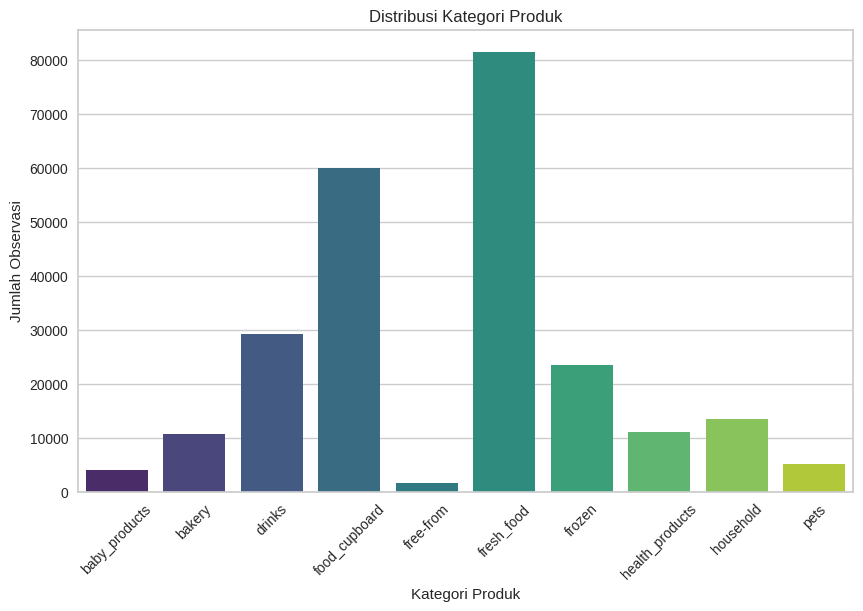

In [ ]:
# Lakukan one-hot encoding untuk kolom kategori
encoded_categories = pd.get_dummies(CVanyMart['kategori'])

# Hitung jumlah observasi untuk setiap kategori
category_counts = encoded_categories.sum()

# Konversi hasil perhitungan ke DataFrame
category_counts_df = pd.DataFrame({'Category': category_counts.index, 'Unit': category_counts.values})

# Set ukuran plot
plt.figure(figsize=(10, 6))

# Buat plot bar menggunakan seaborn
sns.barplot(data=category_counts_df, x='Category', y='Unit', palette='viridis')

# Rotasi label sumbu x untuk keterbacaan yang lebih baik
plt.xticks(rotation=45)

# Tambahkan label dan judul
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Observasi')
plt.title('Distribusi Kategori Produk')

# Tampilkan plot
plt.show()

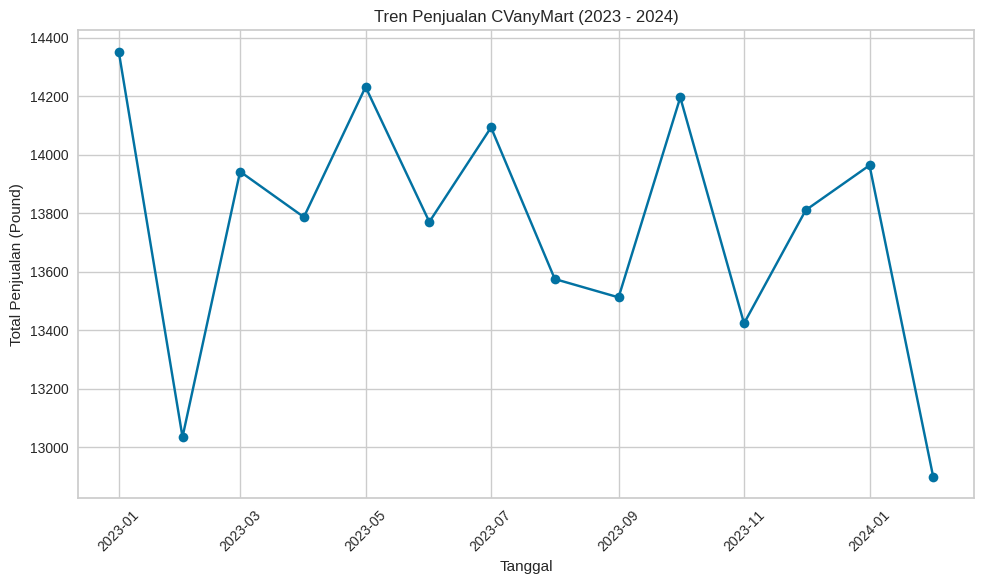

In [ ]:
CVanyMart['tanggal'] = pd.to_datetime(CVanyMart['tanggal'])
# Filter data untuk tahun 2023 dan 2024
cvanymart_2023_2024 = CVanyMart[(CVanyMart['tanggal'].dt.year >= 2023) & (CVanyMart['tanggal'].dt.year <= 2024)]

# Grouping data berdasarkan bulan dan menghitung total penjualan per bulan
monthly_sales = cvanymart_2023_2024.groupby(cvanymart_2023_2024['tanggal'].dt.to_period('M')).agg({'harga_pound': 'sum'}).reset_index()

# Visualisasi tren penjualan
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['tanggal'].dt.to_timestamp(), monthly_sales['harga_pound'], marker='o', linestyle='-')
plt.title('Tren Penjualan CVanyMart (2023 - 2024)')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan (Pound)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

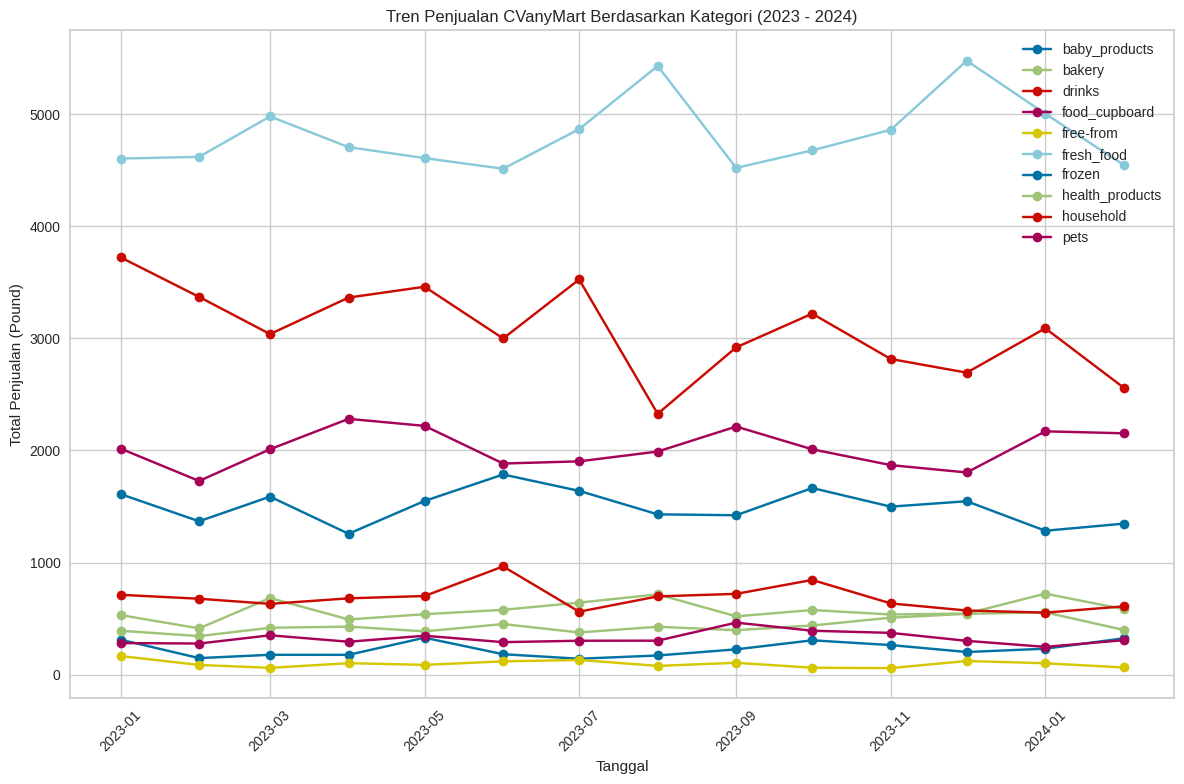

In [ ]:
# Filter data untuk tahun 2023 dan 2024
cvanymart_2023_2024 = CVanyMart[(CVanyMart['tanggal'].dt.year >= 2023) & (CVanyMart['tanggal'].dt.year <= 2024)]

# Grouping data berdasarkan kategori dan bulan, lalu menghitung total penjualan per bulan untuk setiap kategori
monthly_sales_per_category = cvanymart_2023_2024.groupby(['kategori', cvanymart_2023_2024['tanggal'].dt.to_period('M')]).agg({'harga_pound': 'sum'}).reset_index()

# Visualisasi tren penjualan untuk setiap kategori
plt.figure(figsize=(12, 8))

# Looping untuk setiap kategori
for category in monthly_sales_per_category['kategori'].unique():
    category_data = monthly_sales_per_category[monthly_sales_per_category['kategori'] == category]
    plt.plot(category_data['tanggal'].dt.to_timestamp(), category_data['harga_pound'], marker='o', linestyle='-', label=category)

plt.title('Tren Penjualan CVanyMart Berdasarkan Kategori (2023 - 2024)')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan (Pound)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

###**CVFamz**

In [ ]:
CVFamz.describe().round(3)

harga_pound  harga_per_unit
count  1299184.000     1299078.000
mean         5.750          74.308
std          9.363        1110.266
min          0.050           0.000
25%          1.700           3.400
50%          3.000           7.500
75%          6.500          15.800
max        479.990       99778.000

<ipython-input-16-313b4c84d908>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_counts_df, x='Category', y='Unit', palette='viridis')


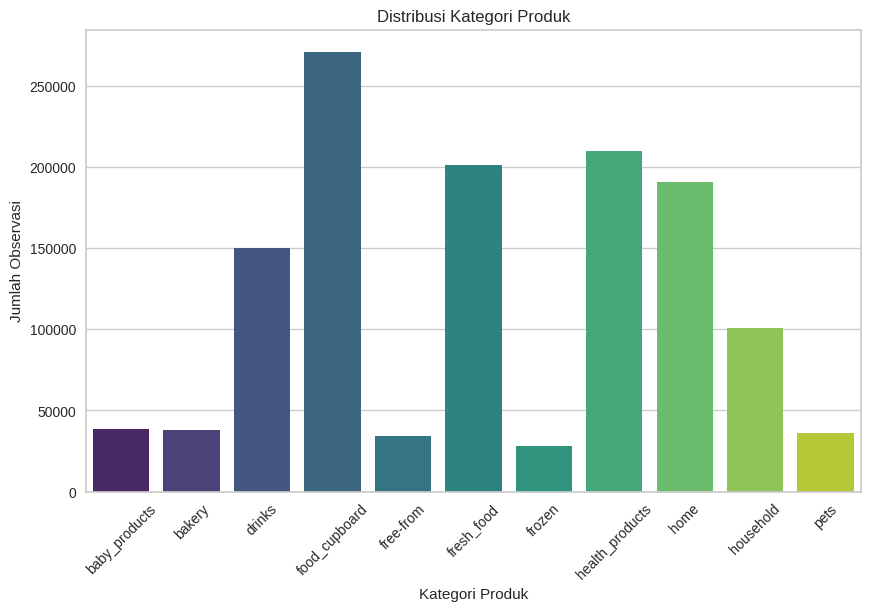

In [ ]:
# Lakukan one-hot encoding untuk kolom kategori
encoded_categories = pd.get_dummies(CVFamz['kategori'])

# Hitung jumlah observasi untuk setiap kategori
category_counts = encoded_categories.sum()

# Konversi hasil perhitungan ke DataFrame
category_counts_df = pd.DataFrame({'Category': category_counts.index, 'Unit': category_counts.values})

# Set ukuran plot
plt.figure(figsize=(10, 6))

# Buat plot bar menggunakan seaborn
sns.barplot(data=category_counts_df, x='Category', y='Unit', palette='viridis')

# Rotasi label sumbu x untuk keterbacaan yang lebih baik
plt.xticks(rotation=45)

# Tambahkan label dan judul
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Observasi')
plt.title('Distribusi Kategori Produk')

# Tampilkan plot
plt.show()

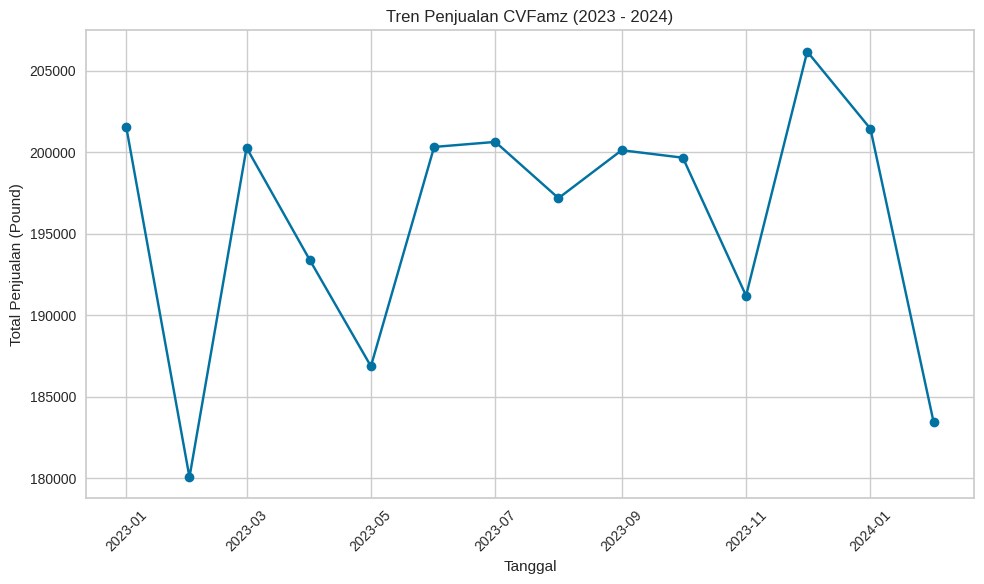

In [ ]:
CVFamz['tanggal'] = pd.to_datetime(CVFamz['tanggal'])
# Filter data untuk tahun 2023 dan 2024
cvfamz_2023_2024 = CVFamz[(CVFamz['tanggal'].dt.year >= 2023) & (CVFamz['tanggal'].dt.year <= 2024)]

# Grouping data berdasarkan bulan dan menghitung total penjualan per bulan
monthly_sales = cvfamz_2023_2024.groupby(cvfamz_2023_2024['tanggal'].dt.to_period('M')).agg({'harga_pound': 'sum'}).reset_index()

# Visualisasi tren penjualan
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['tanggal'].dt.to_timestamp(), monthly_sales['harga_pound'], marker='o', linestyle='-')
plt.title('Tren Penjualan CVFamz (2023 - 2024)')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan (Pound)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

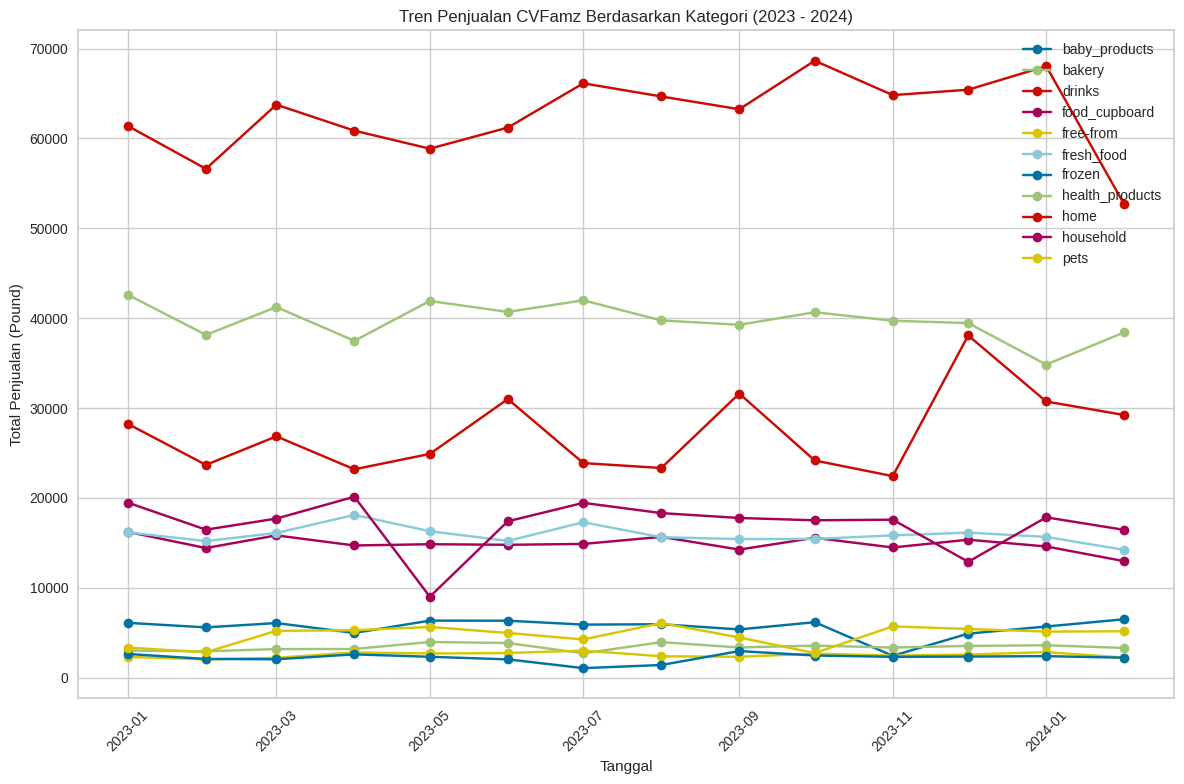

In [ ]:
# Filter data untuk tahun 2023 dan 2024
cvfamz_2023_2024 = CVFamz[(CVFamz['tanggal'].dt.year >= 2023) & (CVFamz['tanggal'].dt.year <= 2024)]

# Grouping data berdasarkan kategori dan bulan, lalu menghitung total penjualan per bulan untuk setiap kategori
monthly_sales_per_category_cvfamz = cvfamz_2023_2024.groupby(['kategori', cvfamz_2023_2024['tanggal'].dt.to_period('M')]).agg({'harga_pound': 'sum'}).reset_index()

# Visualisasi tren penjualan untuk setiap kategori di CVFamz
plt.figure(figsize=(12, 8))
for category in monthly_sales_per_category_cvfamz['kategori'].unique():
    category_data = monthly_sales_per_category_cvfamz[monthly_sales_per_category_cvfamz['kategori'] == category]
    plt.plot(category_data['tanggal'].dt.to_timestamp(), category_data['harga_pound'], marker='o', linestyle='-', label=category)

plt.title('Tren Penjualan CVFamz Berdasarkan Kategori (2023 - 2024)')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan (Pound)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

###**BritishMart**

In [ ]:
BritishMart.describe().round(3)

harga_pound  harga_per_unit
count   979866.000      979866.000
mean         5.045          25.310
std          6.843         159.595
min          0.250           0.000
25%          1.750           3.290
50%          2.990           7.300
75%          5.500          14.700
max        300.000       11225.000

<ipython-input-20-d2323616d070>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_counts_df, x='Category', y='Unit', palette='viridis')


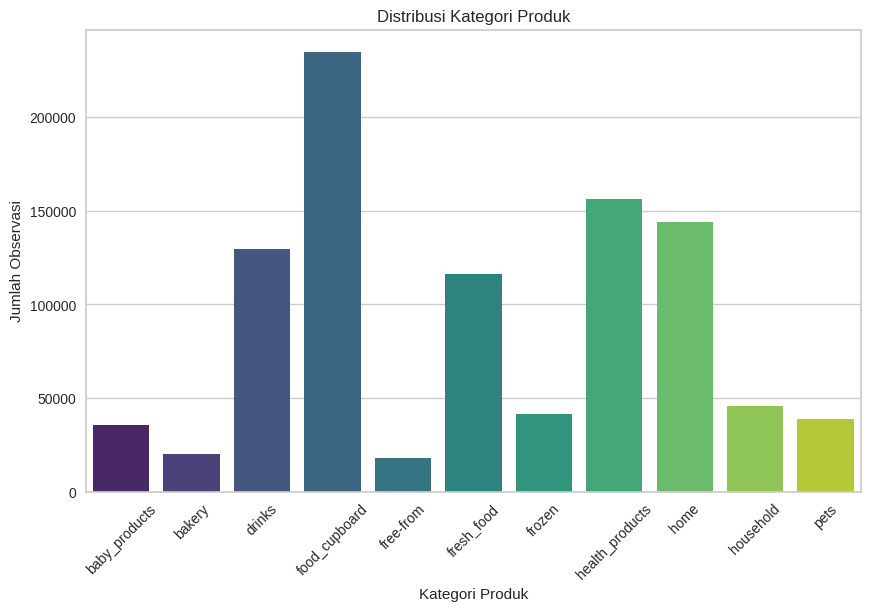

In [ ]:
# Lakukan one-hot encoding untuk kolom kategori
encoded_categories = pd.get_dummies(BritishMart['kategori'])

# Hitung jumlah observasi untuk setiap kategori
category_counts = encoded_categories.sum()

# Konversi hasil perhitungan ke DataFrame
category_counts_df = pd.DataFrame({'Category': category_counts.index, 'Unit': category_counts.values})

# Set ukuran plot
plt.figure(figsize=(10, 6))

# Buat plot bar menggunakan seaborn
sns.barplot(data=category_counts_df, x='Category', y='Unit', palette='viridis')

# Rotasi label sumbu x untuk keterbacaan yang lebih baik
plt.xticks(rotation=45)

# Tambahkan label dan judul
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Observasi')
plt.title('Distribusi Kategori Produk')

# Tampilkan plot
plt.show()

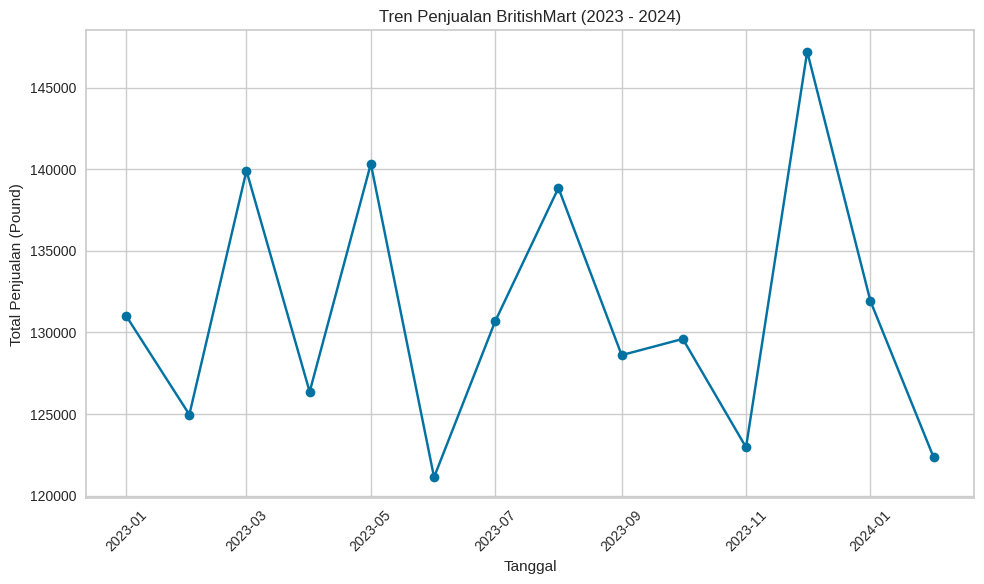

In [ ]:
BritishMart['tanggal'] = pd.to_datetime(BritishMart['tanggal'])
# Filter data untuk tahun 2023 dan 2024
britishmart_2023_2024 = BritishMart[(BritishMart['tanggal'].dt.year >= 2023) & (BritishMart['tanggal'].dt.year <= 2024)]

# Grouping data berdasarkan bulan dan menghitung total penjualan per bulan
monthly_sales_britishmart = britishmart_2023_2024.groupby(britishmart_2023_2024['tanggal'].dt.to_period('M')).agg({'harga_pound': 'sum'}).reset_index()

# Visualisasi tren penjualan BritishMart
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_britishmart['tanggal'].dt.to_timestamp(), monthly_sales_britishmart['harga_pound'], marker='o', linestyle='-')
plt.title('Tren Penjualan BritishMart (2023 - 2024)')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan (Pound)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

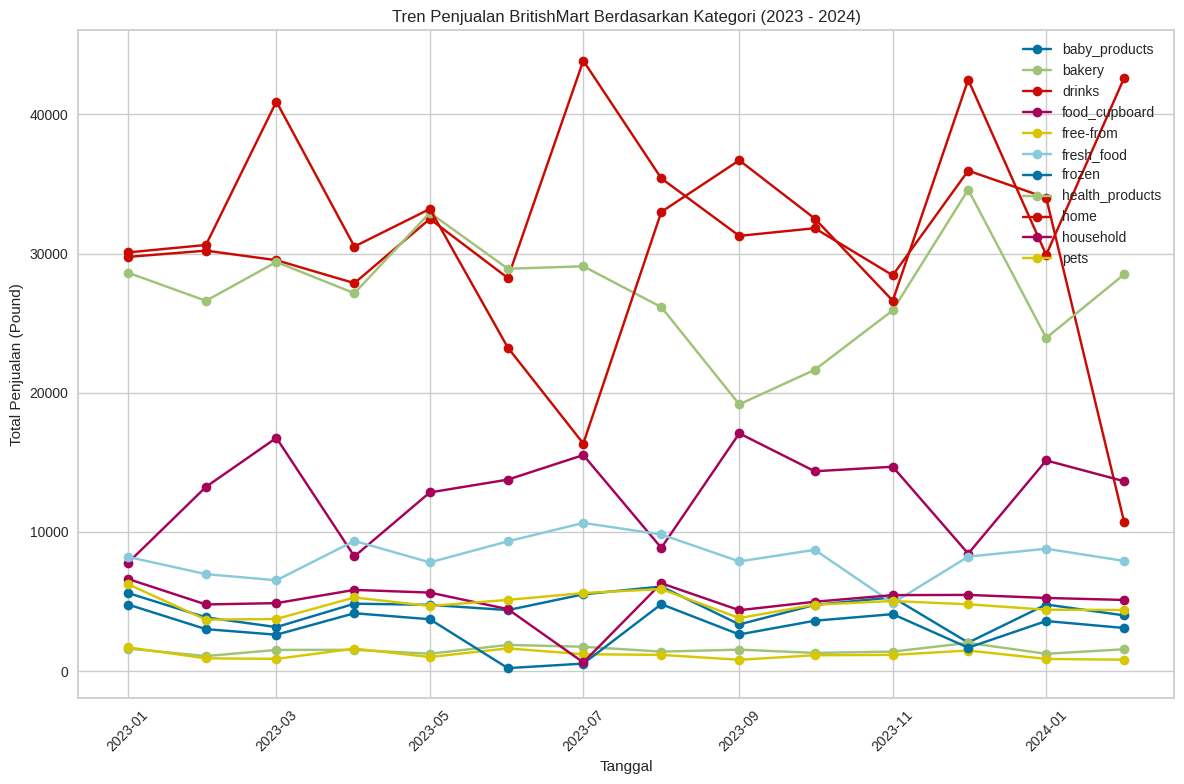

In [ ]:
# Filter data untuk tahun 2023 dan 2024
britishmart_2023_2024 = BritishMart[(BritishMart['tanggal'].dt.year >= 2023) & (BritishMart['tanggal'].dt.year <= 2024)]

# Grouping data berdasarkan kategori dan bulan, lalu menghitung total penjualan per bulan untuk setiap kategori
monthly_sales_per_category_britishmart = britishmart_2023_2024.groupby(['kategori', britishmart_2023_2024['tanggal'].dt.to_period('M')]).agg({'harga_pound': 'sum'}).reset_index()

# Visualisasi tren penjualan untuk setiap kategori di BritishMart
plt.figure(figsize=(12, 8))
for category in monthly_sales_per_category_britishmart['kategori'].unique():
    category_data = monthly_sales_per_category_britishmart[monthly_sales_per_category_britishmart['kategori'] == category]
    plt.plot(category_data['tanggal'].dt.to_timestamp(), category_data['harga_pound'], marker='o', linestyle='-', label=category)

plt.title('Tren Penjualan BritishMart Berdasarkan Kategori (2023 - 2024)')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan (Pound)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

###**UKMart**

In [ ]:
UKMart.describe().round(3)

harga_pound  harga_per_unit
count  1387644.000     1387515.000
mean         5.428          48.754
std          7.156         616.690
min          0.010           0.000
25%          1.900           3.900
50%          3.000           8.000
75%          6.250          15.400
max        190.000       40000.000

<ipython-input-24-ab43743fe41e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_counts_df, x='Category', y='Unit', palette='viridis')


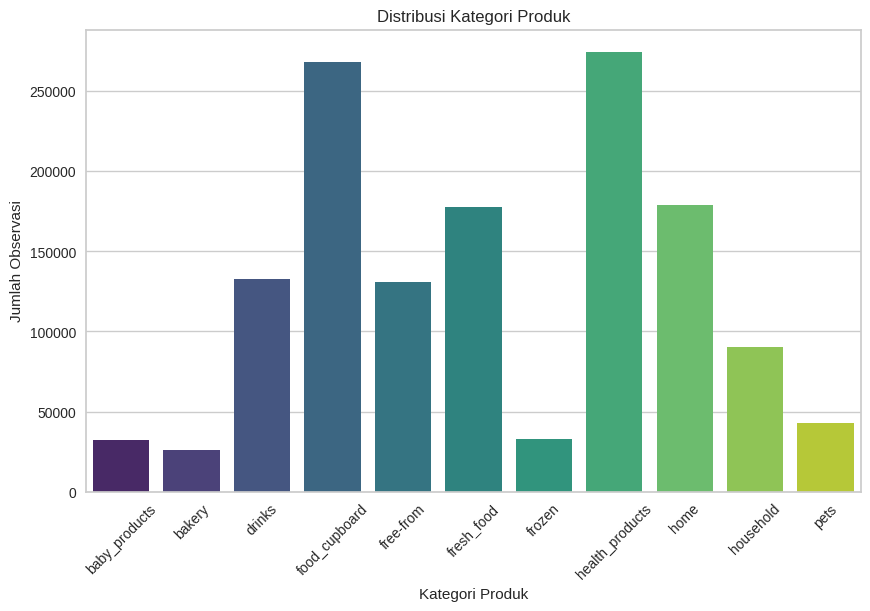

In [ ]:
# Lakukan one-hot encoding untuk kolom kategori
encoded_categories = pd.get_dummies(UKMart['kategori'])

# Hitung jumlah observasi untuk setiap kategori
category_counts = encoded_categories.sum()

# Konversi hasil perhitungan ke DataFrame
category_counts_df = pd.DataFrame({'Category': category_counts.index, 'Unit': category_counts.values})

# Set ukuran plot
plt.figure(figsize=(10, 6))

# Buat plot bar menggunakan seaborn
sns.barplot(data=category_counts_df, x='Category', y='Unit', palette='viridis')

# Rotasi label sumbu x untuk keterbacaan yang lebih baik
plt.xticks(rotation=45)

# Tambahkan label dan judul
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Observasi')
plt.title('Distribusi Kategori Produk')

# Tampilkan plot
plt.show()

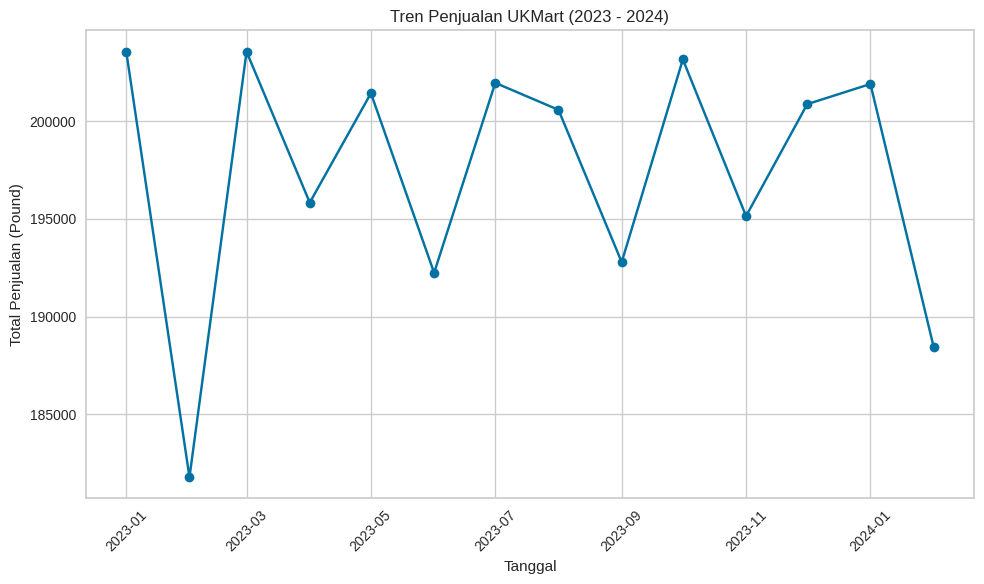

In [ ]:
UKMart['tanggal'] = pd.to_datetime(UKMart['tanggal'])
# Filter data untuk tahun 2023 dan 2024
ukmart_2023_2024 = UKMart[(UKMart['tanggal'].dt.year >= 2023) & (UKMart['tanggal'].dt.year <= 2024)]

# Grouping data berdasarkan bulan dan menghitung total penjualan per bulan
monthly_sales_ukmart = ukmart_2023_2024.groupby(ukmart_2023_2024['tanggal'].dt.to_period('M')).agg({'harga_pound': 'sum'}).reset_index()

# Visualisasi tren penjualan UKMart
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_ukmart['tanggal'].dt.to_timestamp(), monthly_sales_ukmart['harga_pound'], marker='o', linestyle='-')
plt.title('Tren Penjualan UKMart (2023 - 2024)')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan (Pound)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

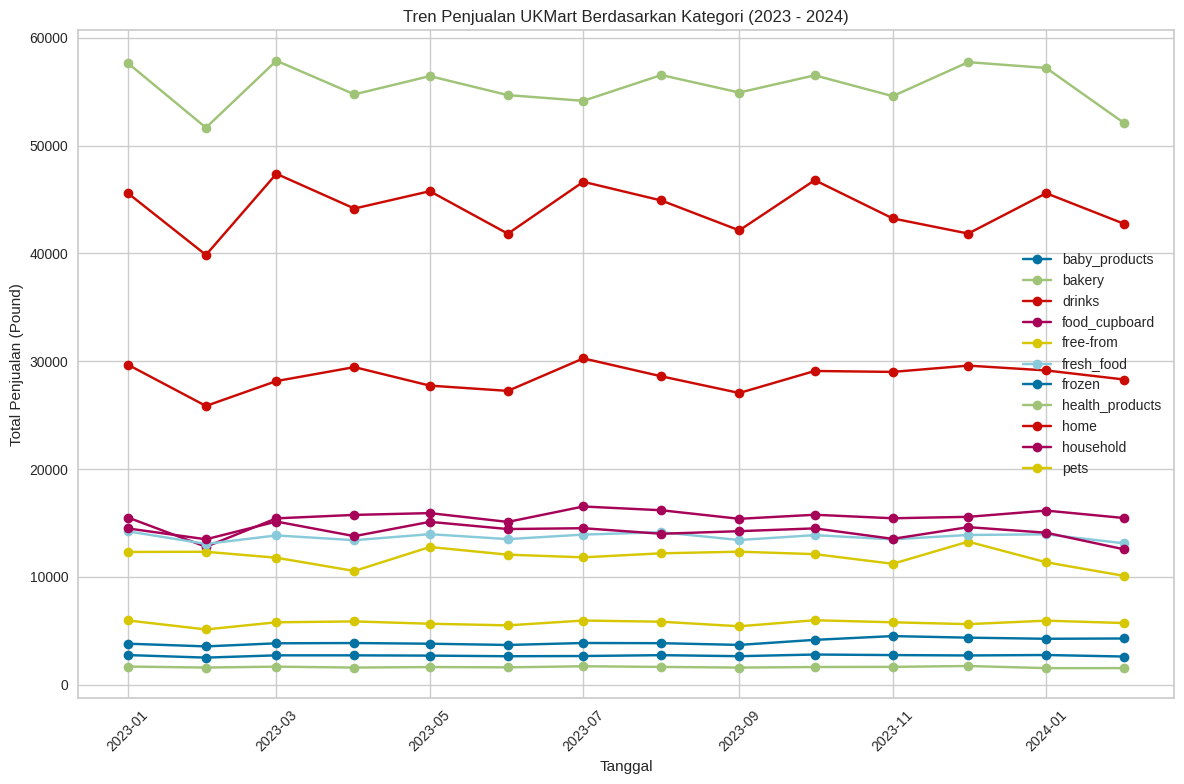

In [ ]:
# Filter data untuk tahun 2023 dan 2024
ukmart_2023_2024 = UKMart[(UKMart['tanggal'].dt.year >= 2023) & (UKMart['tanggal'].dt.year <= 2024)]

# Grouping data berdasarkan kategori dan bulan, lalu menghitung total penjualan per bulan untuk setiap kategori
monthly_sales_per_category_ukmart = ukmart_2023_2024.groupby(['kategori', ukmart_2023_2024['tanggal'].dt.to_period('M')]).agg({'harga_pound': 'sum'}).reset_index()

# Visualisasi tren penjualan untuk setiap kategori di UKMart
plt.figure(figsize=(12, 8))
for category in monthly_sales_per_category_ukmart['kategori'].unique():
    category_data = monthly_sales_per_category_ukmart[monthly_sales_per_category_ukmart['kategori'] == category]
    plt.plot(category_data['tanggal'].dt.to_timestamp(), category_data['harga_pound'], marker='o', linestyle='-', label=category)

plt.title('Tren Penjualan UKMart Berdasarkan Kategori (2023 - 2024)')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan (Pound)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

###**ScottishMart**

In [ ]:
ScottishMart.describe().round(3)

harga_pound  harga_per_unit
count  1158616.000     1158615.000
mean         5.219          36.262
std          6.719         244.802
min          0.000           0.000
25%          1.750           3.330
50%          3.000           8.000
75%          6.000          16.000
max        160.000      150000.000

<ipython-input-28-9982beffa6dc>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_counts_df, x='Category', y='Unit', palette='viridis')


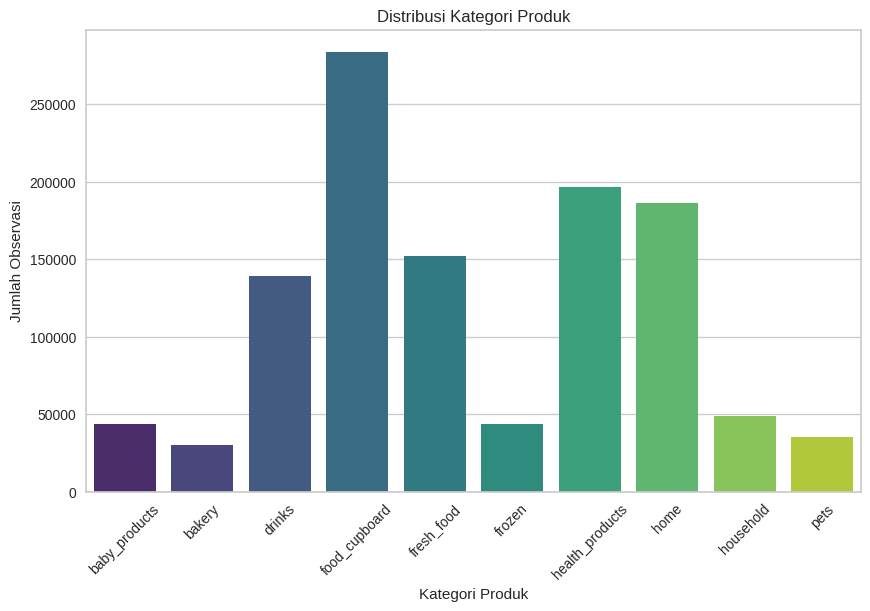

In [ ]:
# Lakukan one-hot encoding untuk kolom kategori
encoded_categories = pd.get_dummies(ScottishMart['kategori'])

# Hitung jumlah observasi untuk setiap kategori
category_counts = encoded_categories.sum()

# Konversi hasil perhitungan ke DataFrame
category_counts_df = pd.DataFrame({'Category': category_counts.index, 'Unit': category_counts.values})

# Set ukuran plot
plt.figure(figsize=(10, 6))

# Buat plot bar menggunakan seaborn
sns.barplot(data=category_counts_df, x='Category', y='Unit', palette='viridis')

# Rotasi label sumbu x untuk keterbacaan yang lebih baik
plt.xticks(rotation=45)

# Tambahkan label dan judul
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Observasi')
plt.title('Distribusi Kategori Produk')

# Tampilkan plot
plt.show()

plt.show()

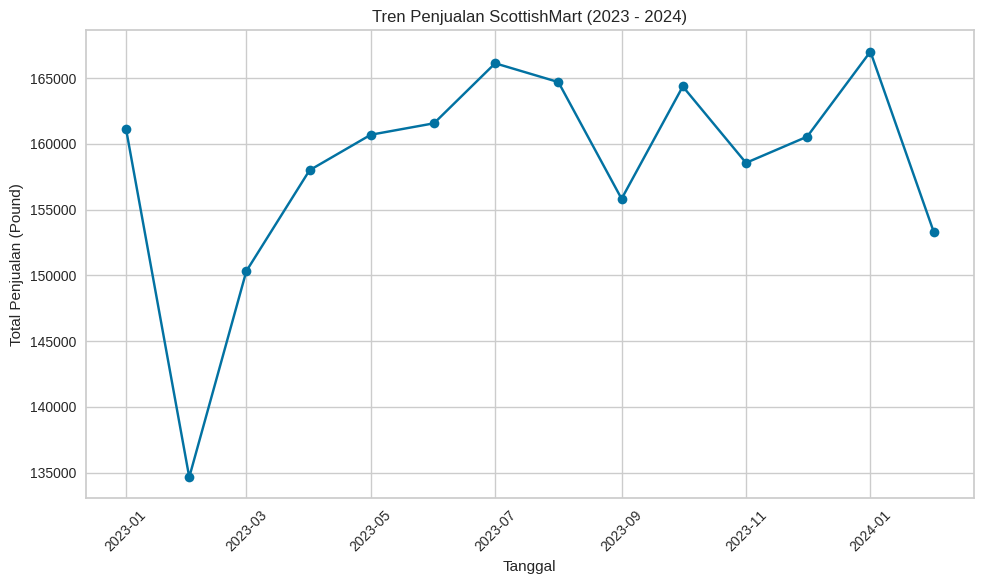

In [ ]:
ScottishMart['tanggal'] = pd.to_datetime(ScottishMart['tanggal'])
# Filter data untuk tahun 2023 dan 2024
ScottishMart_2023_2024 = ScottishMart[(ScottishMart['tanggal'].dt.year >= 2023) & (ScottishMart['tanggal'].dt.year <= 2024)]

# Grouping data berdasarkan bulan dan menghitung total penjualan per bulan
monthly_sales_ScottishMart = ScottishMart_2023_2024.groupby(ScottishMart_2023_2024['tanggal'].dt.to_period('M')).agg({'harga_pound': 'sum'}).reset_index()

# Visualisasi tren penjualan ScottishMart
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_ScottishMart['tanggal'].dt.to_timestamp(), monthly_sales_ScottishMart['harga_pound'], marker='o', linestyle='-')
plt.title('Tren Penjualan ScottishMart (2023 - 2024)')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan (Pound)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

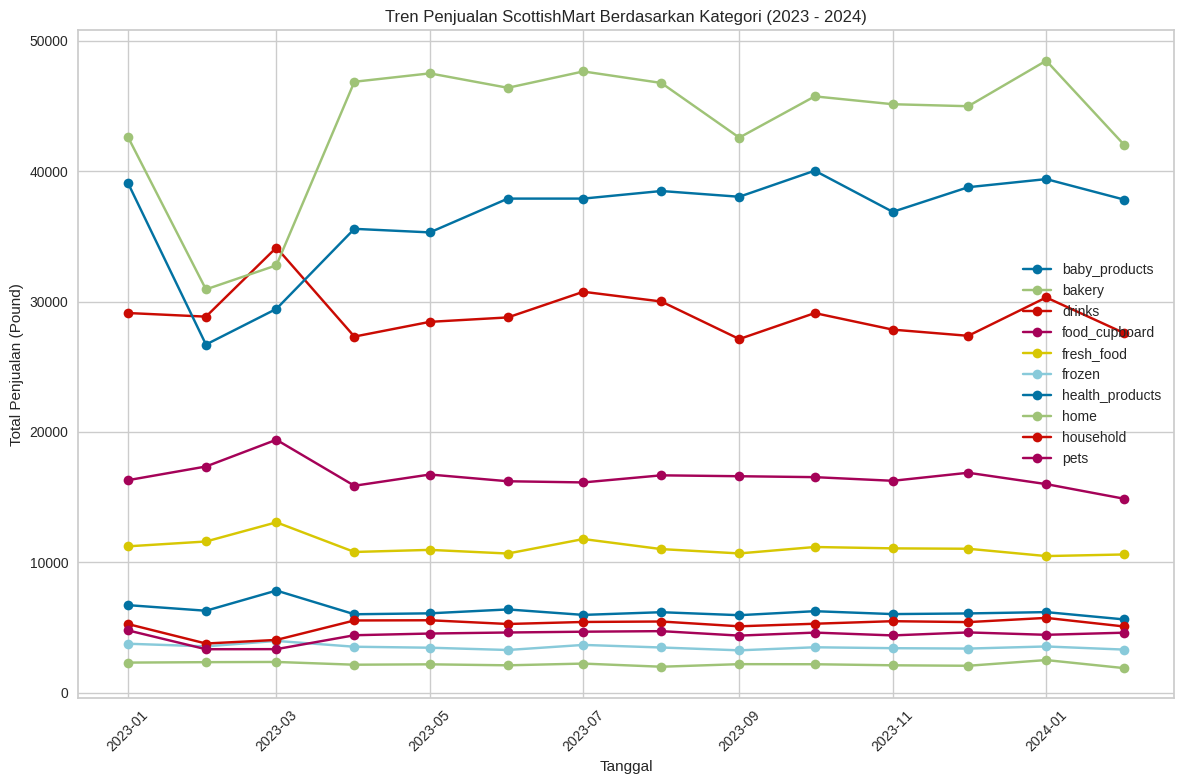

In [ ]:
# Filter data untuk tahun 2023 dan 2024
scottishmart_2023_2024 = ScottishMart[(ScottishMart['tanggal'].dt.year >= 2023) & (ScottishMart['tanggal'].dt.year <= 2024)]

# Grouping data berdasarkan kategori dan bulan, lalu menghitung total penjualan per bulan untuk setiap kategori
monthly_sales_per_category_scottishmart = scottishmart_2023_2024.groupby(['kategori', scottishmart_2023_2024['tanggal'].dt.to_period('M')]).agg({'harga_pound': 'sum'}).reset_index()

# Visualisasi tren penjualan untuk setiap kategori di ScottishMart
plt.figure(figsize=(12, 8))
for category in monthly_sales_per_category_scottishmart['kategori'].unique():
    category_data = monthly_sales_per_category_scottishmart[monthly_sales_per_category_scottishmart['kategori'] == category]
    plt.plot(category_data['tanggal'].dt.to_timestamp(), category_data['harga_pound'], marker='o', linestyle='-', label=category)

plt.title('Tren Penjualan ScottishMart Berdasarkan Kategori (2023 - 2024)')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan (Pound)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#**Data Preparation**

---



##**Combined Data**

In [ ]:
datasets = (BritishMart, CVFamz, CVanyMart, ScottishMart, UKMart)
# Concatenate the DataFrames stored in the tuple
combined_data = pd.concat(datasets, ignore_index=True)

##**Data Preprocessing**

###**Penanganan Missing Value dan Duplicate Value**

In [ ]:
missing_value=combined_data.isnull().sum()
missing_value

nama_toko           0
harga_pound         4
harga_per_unit    244
unit              244
nama               21
kategori            0
brand_sendiri      21
tanggal             0
dtype: int64

In [ ]:
# Mengganti nilai yang hilang dengan median untuk kolom numerik
numeric_cols = ['harga_pound', 'harga_per_unit']
median_values = combined_data[numeric_cols].median()
combined_data[numeric_cols] = combined_data[numeric_cols].fillna(median_values)

# Mengganti nilai yang hilang dengan mode untuk kolom kategorikal
categorical_cols = ['nama', 'brand_sendiri']
mode_values = combined_data[categorical_cols].mode().iloc[0]
combined_data[categorical_cols] = combined_data[categorical_cols].fillna(mode_values)

# Mengganti nilai yang hilang dengan mode untuk kolom "unit"
mode_unit = combined_data['unit'].mode()[0]
combined_data['unit'].fillna(mode_unit, inplace=True)

# Periksa kembali jumlah missing value
missing_values_after = combined_data.isnull().sum()
print("Jumlah missing value setelah pemrosesan:")
print(missing_values_after)

Jumlah missing value setelah pemrosesan:
nama_toko         0
harga_pound       0
harga_per_unit    0
unit              0
nama              0
kategori          0
brand_sendiri     0
tanggal           0
dtype: int64


In [ ]:
duplicates=combined_data.duplicated().sum()
print(duplicates)

849


In [ ]:
data_bersih=combined_data.drop_duplicates()

###**Perubahan Tanggal ke tipe Datetime dan Penambahan Fitur Bulan serta Tahun**

In [ ]:
data_akhir = data_bersih.copy()
# Transformasi Data
def transform_data(data_akhir):
    # Konversi kolom tanggal ke tipe datetime jika diperlukan
    data_akhir['tanggal'] = pd.to_datetime(data_akhir['tanggal'])

# Ekstraksi Fitur Tambahan
def extract_features(clean_data_akhir):
    # Ekstraksi fitur tambahan dari kolom tanggal jika diperlukan
    data_akhir['bulan'] = data_akhir['tanggal'].dt.month
    data_akhir['tahun'] = data_akhir['tanggal'].dt.year
    return clean_data_akhir

# Langkah-langkah preprocessing
transform_data(data_akhir)
clean_data_akhir = extract_features(data_akhir)

# Tampilkan beberapa baris data setelah preprocessing
print("Data setelah preprocessing:")
clean_data_akhir.head()

Data setelah preprocessing:


nama_toko  harga_pound  harga_per_unit unit  \
0  BritishMart         1.35            1.35    l   
1  BritishMart         2.10            2.10    l   
2  BritishMart         1.00            0.70    l   
3  BritishMart         2.10            2.10    l   
4  BritishMart         1.00            0.70    l   

                                 nama kategori  brand_sendiri    tanggal  \
0           Alpro Oat Long Life Drink   drinks          False 2021-01-01   
1          Alpro Almond Chilled Drink   drinks          False 2021-01-01   
2    Volvic Touch of Fruit Strawberr…   drinks          False 2021-01-01   
3            Alpro Soya Chilled Drink   drinks          False 2021-01-01   
4  Volvic Touch of Fruit Lemon & Lim…   drinks          False 2021-01-01   

   bulan  tahun  
0      1   2021  
1      1   2021  
2      1   2021  
3      1   2021  
4      1   2021

###**Label Encoding Fitur Kategori**

In [ ]:
# Encoding kolom kategori
label_encoder = LabelEncoder()
data_akhir['kategori_encoded'] = label_encoder.fit_transform(data_akhir['kategori'])
data_akhir

nama_toko  harga_pound  harga_per_unit unit  \
0        BritishMart         1.35            1.35    l   
1        BritishMart         2.10            2.10    l   
2        BritishMart         1.00            0.70    l   
3        BritishMart         2.10            2.10    l   
4        BritishMart         1.00            0.70    l   
...              ...          ...             ...  ...   
5065974       UKMart         2.70           14.21   kg   
5065975       UKMart         3.00            5.00   kg   
5065976       UKMart         1.25            5.50   kg   
5065977       UKMart         3.00           30.00   kg   
5065978       UKMart         5.50           19.64   kg   

                                                      nama    kategori  \
0                                Alpro Oat Long Life Drink      drinks   
1                               Alpro Almond Chilled Drink      drinks   
2                         Volvic Touch of Fruit Strawberr…      drinks   
3                                 Alpro Soya Chilled Drink      drinks   
4                       Volvic Touch of Fruit Lemon & Lim…      drinks   
...                                                    ...         ...   
5065974                            Jarlsberg Original 190g  fresh_food   
5065975  Sainsbury's Moroccan Spiced Chicken & Chickpea...  fresh_food   
5065976                       Ginsters Cornish Pasty, 227g  fresh_food   
5065977  Sainsbury's British Corned Beef Slices, Taste ...  fresh_food   
5065978  New England Seafood Wild Smoked Haddock Fillet...  fresh_food   

         brand_sendiri    tanggal  bulan  tahun  kategori_encoded  
0                False 2021-01-01      1   2021                 2  
1                False 2021-01-01      1   2021                 2  
2                False 2021-01-01      1   2021                 2  
3                False 2021-01-01      1   2021                 2  
4                False 2021-01-01      1   2021                 2  
...                ...        ...    ...    ...               ...  
5065974          False 2022-04-30      4   2022                 5  
5065975           True 2022-05-01      5   2022                 5  
5065976          False 2022-05-02      5   2022                 5  
5065977           True 2022-05-03      5   2022                 5  
5065978          False 2022-05-04      5   2022                 5  

[5065130 rows x 11 columns]

##**Feature Engineering**

In [ ]:
sampled_data = data_akhir[(data_akhir['tahun'] >= 2023)]

###**Jumlah Beli setiap Transaksi**

In [ ]:
# Menambahkan fitur baru 'Jumlah_Beli' yang merupakan hasil bagi dari 'harga_per_unit' dan 'harga_pound' dengan hanya 2 desimal
sampled_data['Jumlah Beli'] = (sampled_data['harga_pound'] / sampled_data['harga_per_unit']).round(2)

#Menampilkan DataFrame dengan fitur baru
sampled_data

<ipython-input-39-a894f8fbfbb1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_data['Jumlah Beli'] = (sampled_data['harga_pound'] / sampled_data['harga_per_unit']).round(2)


nama_toko  harga_pound  harga_per_unit  unit  \
619040   BritishMart         5.49            5.49  unit   
619041   BritishMart         5.49            5.49  unit   
619042   BritishMart         5.49            5.49  unit   
619043   BritishMart         5.49            5.49  unit   
619044   BritishMart         5.49            5.49  unit   
...              ...          ...             ...   ...   
5065485       UKMart         3.50           13.50    kg   
5065486       UKMart         2.00           11.40    kg   
5065487       UKMart         1.15           59.00    kg   
5065488       UKMart         5.50           40.70    kg   
5065489       UKMart         2.00            2.67     l   

                                                      nama       kategori  \
619040                                 Nzo Novo Grape 20mg         drinks   
619041                                 Nzo Novo Mango 20mg         drinks   
619042                             Nzo Novo Peach Ice 20mg         drinks   
619043                         Nzo Novo Pink Lemonade 20mg         drinks   
619044                        Nzo Novo Strawberry Ice 20mg         drinks   
...                                                    ...            ...   
5065485  Sainsbury's Soft Set Scotch Eggs, Taste the Di...     fresh_food   
5065486                               Whitworths Figs 175g  food_cupboard   
5065487        Dr. Oetker Vege-Gel Gelatine Sachets 3x6.5g  food_cupboard   
5065488  Lindt Choco Wafer Milk Chocolate & Hazelnut Sh...  food_cupboard   
5065489  Dettol Antibacterial Multi Surface Cleaning Sp...      household   

         brand_sendiri    tanggal  bulan  tahun  kategori_encoded  Jumlah Beli  
619040           False 2023-01-01      1   2023                 2         1.00  
619041           False 2023-01-01      1   2023                 2         1.00  
619042           False 2023-01-01      1   2023                 2         1.00  
619043           False 2023-01-01      1   2023                 2         1.00  
619044           False 2023-01-01      1   2023                 2         1.00  
...                ...        ...    ...    ...               ...          ...  
5065485           True 2024-02-29      2   2024                 5         0.26  
5065486          False 2024-02-29      2   2024                 3         0.18  
5065487          False 2024-02-29      2   2024                 3         0.02  
5065488          False 2024-02-29      2   2024                 3         0.14  
5065489          False 2024-02-29      2   2024                 9         0.75  

[1863120 rows x 12 columns]

###**Frequency Transaksi, Total Penjualan dan Total Pemasukan Per Product**

In [ ]:
# Menghitung jumlah frequency transaksi barang berdasarkan jumlah nama yang sama
frequency_transactions = sampled_data.groupby('nama').size().reset_index(name='Frequency')

# Menghitung total jumlah belinya berdasarkan jumlah beli
total_purchase = sampled_data.groupby('nama')['Jumlah Beli'].sum().reset_index(name='Total Produk Terjual')

# Menghitung total pemasukan berdasarkan harga_pound
total_revenue = sampled_data.groupby('nama')['harga_pound'].sum().reset_index(name='Total Pemasukan')

# Menggabungkan hasil perhitungan menjadi satu DataFrame
feature_engineered_data = frequency_transactions.merge(total_purchase, on='nama').merge(total_revenue, on='nama')

# Menambahkan kolom unit dari dataframe sampled_data
feature_engineered_data['Unit'] = sampled_data.groupby('nama')['unit'].first().values

# Menambahkan kolom kategori dari dataframe sampled_data
feature_engineered_data['Kategori'] = sampled_data.groupby('nama')['kategori'].first().values

# Menambahkan kolom harga per unit dari dataframe sampled_data
feature_engineered_data['Harga Per Unit'] = sampled_data.groupby('nama')['harga_per_unit'].first().values

# Menambahkan kolom toko dari dataframe sampled_data
feature_engineered_data['Toko'] = sampled_data.groupby('nama')['nama_toko'].first().values

# Menampilkan DataFrame dengan fitur baru, diurutkan berdasarkan Frequency secara menurun
feature_engineered_data_sorted = feature_engineered_data.sort_values(by='Frequency', ascending=False)[['Toko','nama', 'Kategori','Harga Per Unit' ,'Unit', 'Frequency','Total Produk Terjual',  'Total Pemasukan']]

# Menampilkan DataFrame yang sudah diurutkan
feature_engineered_data_sorted

Toko                                               nama  \
18210   BritishMart                 Cherry Blossom Shoe Care Brush Set   
74141   BritishMart                                Pukka All Steak Pie   
91441   BritishMart         St Pierre 4 Brioche Soft Bagels Pre-Sliced   
74160   BritishMart                       Pukka Chicken & Mushroom Pie   
64486     CVanyMart                   Newcastle Brown Ale Bottle 550ml   
...             ...                                                ...   
30563     CVanyMart  Galaxy Smooth Caramel & Milk Chocolate Block B...   
106278  BritishMart  Volvic Touch of Fruit Summer Fruits Natural Fl...   
39841        UKMart      Hartley's Best of Raspberry Seedless Jam 300g   
30521     CVanyMart            Galaxy Light Instant Hot Chocolate 210g   
89341     CVanyMart        Skinny Chocolate Crunch Fruit & Nut 5 X 24g   

             Kategori  Harga Per Unit  Unit  Frequency  Total Produk Terjual  \
18210       household            4.50  unit         83                 74.41   
74141      fresh_food            6.00    kg         57                 26.93   
91441          bakery            0.65  unit         56                223.60   
74160      fresh_food            5.90    kg         56                 25.98   
64486          drinks            3.18     l         56                 37.87   
...               ...             ...   ...        ...                   ...   
30563   food_cupboard            9.30    kg          1                  0.23   
106278         drinks            0.60     l          1                  1.42   
39841   food_cupboard            5.00    kg          1                  0.30   
30521          drinks           11.90    kg          1                  0.59   
89341   food_cupboard            8.30    kg          1                  0.14   

        Total Pemasukan  
18210          326.1900  
74141           80.6500  
91441          145.4000  
74160           79.2500  
64486          129.5136  
...                 ...  
30563            2.1460  
106278           0.8500  
39841            1.5000  
30521            7.0420  
89341            1.1340  

[110362 rows x 8 columns]

#**Modelling**

---



In [ ]:
#Ambil sampel data sebanyak 1%
sampling_data = sampled_data.sample(frac=0.01, random_state=1)
# Fitur yang akan digunakan dalam clustering
features = ['harga_pound', 'harga_per_unit', 'kategori_encoded']
# Normalisasi fitur numerik jika diperlukan
scaler = MinMaxScaler()
sampling_data[['harga_pound', 'harga_per_unit']] = scaler.fit_transform(sampling_data[['harga_pound', 'harga_per_unit']])

###**K-Means Clustering**

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)  # ganti n_clusters sesuai kebutuhan
sampling_data['kmeans_cluster'] = kmeans.fit_predict(sampling_data[features])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


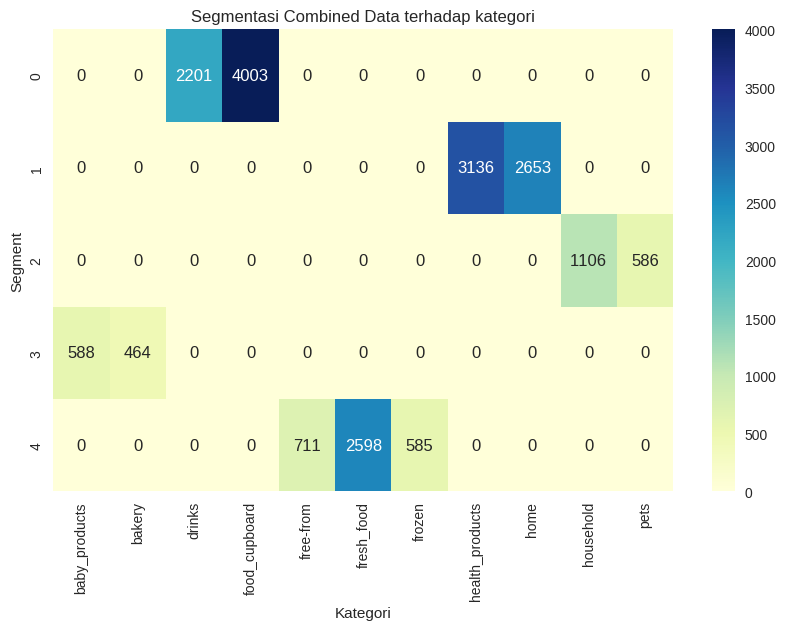

In [ ]:
# contingency table untuk menunjukkan jumlah kategori untuk setiap cluster
contingency_table = pd.crosstab(sampling_data['kmeans_cluster'], sampling_data['kategori'])

contingency_table.columns = [str(col) for col in contingency_table.columns]

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Segmentasi Combined Data terhadap kategori')
plt.xlabel('Kategori')
plt.ylabel('Segment')
plt.show()

In [ ]:
kmeans_silhouette = silhouette_score(sampling_data[features], sampling_data['kmeans_cluster'])
kmeans_db_index = davies_bouldin_score(sampling_data[features], sampling_data['kmeans_cluster'])
kmeans_ch_score = calinski_harabasz_score(sampling_data[features], sampling_data['kmeans_cluster'])

print("K-Means Clustering Evaluation:")
print(f"Silhouette Score: {kmeans_silhouette}")
print(f"Davies-Bouldin Index: {kmeans_db_index}")
print(f"Calinski-Harabasz Score: {kmeans_ch_score}")

K-Means Clustering Evaluation:
Silhouette Score: 0.7016631269889962
Davies-Bouldin Index: 0.4460054425477013
Calinski-Harabasz Score: 118226.81840341291


###**Fuzzy K-Means**

In [ ]:
# Fuzzy C-Means Clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    sampling_data[features].T, 5, 2, error=0.005, maxiter=1000, init=None)  # ganti 5 dengan jumlah cluster yang diinginkan

# Ambil label cluster dengan probabilitas tertinggi
sampling_data['fcm_cluster'] = np.argmax(u, axis=0)

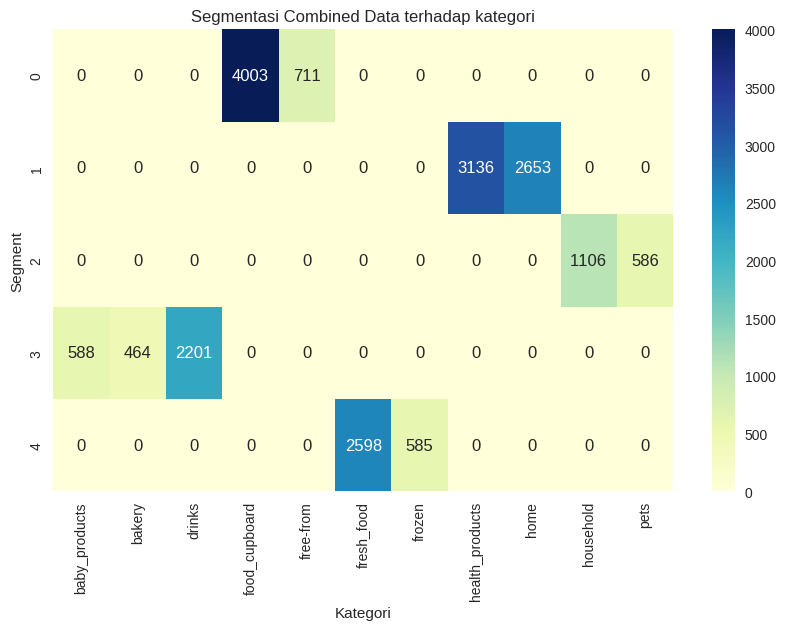

In [ ]:
# contingency table untuk menunjukkan jumlah kategori untuk setiap cluster
contingency_table = pd.crosstab(sampling_data['fcm_cluster'], sampling_data['kategori'])

contingency_table.columns = [str(col) for col in contingency_table.columns]

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Segmentasi Combined Data terhadap kategori')
plt.xlabel('Kategori')
plt.ylabel('Segment')
plt.show()

In [ ]:
# Evaluasi Fuzzy C-Means
fcm_silhouette = silhouette_score(sampling_data[features], sampling_data['fcm_cluster'])
fcm_db_index = davies_bouldin_score(sampling_data[features], sampling_data['fcm_cluster'])
fcm_ch_score = calinski_harabasz_score(sampling_data[features], sampling_data['fcm_cluster'])

print("\nFuzzy C-Means Evaluation:")
print(f"Silhouette Score: {fcm_silhouette}")
print(f"Davies-Bouldin Index: {fcm_db_index}")
print(f"Calinski-Harabasz Score: {fcm_ch_score}")


Fuzzy C-Means Evaluation:
Silhouette Score: 0.7073864060075884
Davies-Bouldin Index: 0.5008849330181991
Calinski-Harabasz Score: 115814.77569218192


###**GMM**

In [ ]:
# Gaussian Mixture Model Clustering
gmm = GaussianMixture(n_components=5, random_state=0)  # ganti n_components sesuai kebutuhan
sampling_data['gmm_cluster'] = gmm.fit_predict(sampling_data[features])

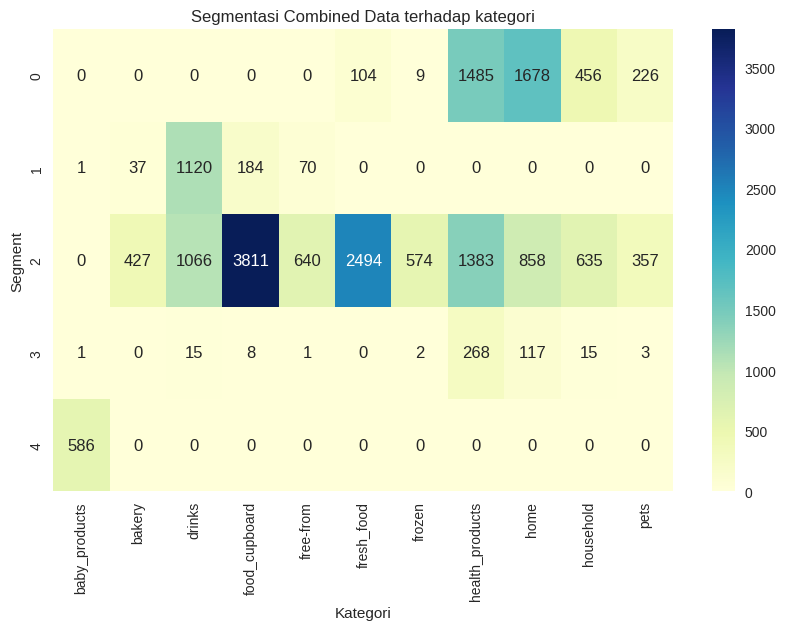

In [ ]:
# contingency table untuk menunjukkan jumlah kategori untuk setiap cluster
contingency_table = pd.crosstab(sampling_data['gmm_cluster'], sampling_data['kategori'])

contingency_table.columns = [str(col) for col in contingency_table.columns]

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Segmentasi Combined Data terhadap kategori')
plt.xlabel('Kategori')
plt.ylabel('Segment')
plt.show()

In [ ]:
# Evaluasi Gaussian Mixture Model
gmm_silhouette = silhouette_score(sampling_data[features], sampling_data['gmm_cluster'])
gmm_db_index = davies_bouldin_score(sampling_data[features], sampling_data['gmm_cluster'])
gmm_ch_score = calinski_harabasz_score(sampling_data[features], sampling_data['gmm_cluster'])

print("\nGaussian Mixture Model Evaluation:")
print(f"Silhouette Score: {gmm_silhouette}")
print(f"Davies-Bouldin Index: {gmm_db_index}")
print(f"Calinski-Harabasz Score: {gmm_ch_score}")


Gaussian Mixture Model Evaluation:
Silhouette Score: -0.18254794339534816
Davies-Bouldin Index: 1.3350662179191841
Calinski-Harabasz Score: 3924.185861290604


#**Evaluation**

---



##**Evaluation**

In [ ]:
results = {
    "Model": ["K-Means", "Fuzzy C-Means", "Gaussian Mixture Model"],
    "Silhouette Score": [kmeans_silhouette, fcm_silhouette, gmm_silhouette],
    "Davies-Bouldin Index": [kmeans_db_index, fcm_db_index, gmm_db_index],
    "Calinski-Harabasz Score": [kmeans_ch_score, fcm_ch_score, gmm_ch_score]
}

# Buat DataFrame
results_df = pd.DataFrame(results)

# Urutkan DataFrame berdasarkan skor tertinggi
results_df_sorted = results_df.sort_values(by=["Silhouette Score", "Davies-Bouldin Index", "Calinski-Harabasz Score"], ascending=False)

print(results_df_sorted)

                    Model  Silhouette Score  Davies-Bouldin Index  \
1           Fuzzy C-Means          0.707386              0.500885   
0                 K-Means          0.701663              0.446005   
2  Gaussian Mixture Model         -0.182548              1.335066   

   Calinski-Harabasz Score  
1            115814.775692  
0            118226.818403  
2              3924.185861  


###**Hyperparameter Tunning**

In [ ]:
# Inisialisasi list untuk menyimpan hasil evaluasi
silhouette_scores = []

# Uji nilai k dari 2 hingga 10
for k in range(2, 11):
    # Inisialisasi model K-Means dengan nilai k
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)

    # Fit model ke data dan prediksi cluster
    sampled_data['kmeans_cluster'] = kmeans.fit_predict(sampled_data[features])

    # Hitung Silhouette Score
    silhouette = silhouette_score(sampled_data[features], sampled_data['kmeans_cluster'])
    silhouette_scores.append(silhouette)

# Cetak hasil evaluasi
print("Silhouette Scores for different values of k:")
for k, score in zip(range(2, 11), silhouette_scores):
    print(f"Number of clusters (k): {k}, Silhouette Score: {score}")

<ipython-input-52-e208a26168a3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_data['kmeans_cluster'] = kmeans.fit_predict(sampled_data[features])


In [ ]:
# Inisialisasi list untuk menyimpan hasil inertia
inertia_scores = []

# Uji nilai k dari 1 hingga 10
K = range(1, 10)
for k in K:
    # Inisialisasi model K-Means dengan nilai k
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)

    # Fit model ke data
    kmeans.fit(sampled_data[features])

    # Simpan inertia
    inertia_scores.append(kmeans.inertia_)

# Plot hasil inertia untuk setiap nilai k
plt.plot(K, inertia_scores, "bx-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.show()


In [ ]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,20))
visu.fit(sampled_data[features])
visu.poof();

##**Interpretation**

In [ ]:
data_akhir = data_akhir[(data_akhir['tahun'] >= 2023)]

jumlah_data = len(data_akhir)
print(f"Jumlah data dari tahun 2023 hingga 2024: {jumlah_data}")

In [ ]:
# Fitur yang akan digunakan dalam clustering
features = ['harga_pound', 'harga_per_unit', 'kategori_encoded']
# Normalisasi fitur numerik jika diperlukan
scaler = MinMaxScaler()
data_akhir[['harga_pound', 'harga_per_unit']] = scaler.fit_transform(data_akhir[['harga_pound', 'harga_per_unit']])

In [ ]:
# Inisialisasi model K-Means dengan jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=5, random_state=42)

# Melakukan clustering pada data menggunakan fitur yang telah dipilih
data_akhir['kmeans_cluster'] = kmeans.fit_predict(data_akhir[features])

# Menampilkan hasil clustering
data_akhir[['harga_pound', 'harga_per_unit', 'kategori', 'kmeans_cluster']]

In [ ]:
print("Jumlah data dalam setiap cluster:")
print(data_akhir['kmeans_cluster'].value_counts())

In [ ]:
# contingency table untuk menunjukkan jumlah kategori untuk setiap cluster
contingency_tabledf2 = pd.crosstab(data_akhir['kmeans_cluster'], data_akhir['kategori'])

contingency_tabledf2.columns = [str(col) for col in contingency_tabledf2.columns]

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_tabledf2, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Segmentasi Kategori Semua Toko')
plt.xlabel('Kategori')
plt.ylabel('Segment')
plt.show()

In [ ]:
# Diagram batang untuk 'kategori_encoded' di setiap klaster
cross_tab = pd.crosstab(data_akhir['kategori'], data_akhir['kmeans_cluster'])
cross_tab.plot(kind='bar', stacked=True)
plt.title('Distribusi Kategori di Setiap Segment')
plt.xlabel('Kategori')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.show()

#**Data Preparation Masing Masing Dataset**

---



##**Data Preprocessing Masing Masing Dataset**

###**CVanyMart**

In [ ]:
CVanyMart.isnull().sum()

nama_toko         0
harga_per_unit    4
unit              4
nama              0
tanggal           0
kategori          0
brand_sendiri     0
harga_pound       0
dtype: int64

In [ ]:
CVanyMart.isnull().sum()

nama_toko         0
harga_per_unit    4
unit              4
nama              0
tanggal           0
kategori          0
brand_sendiri     0
harga_pound       0
dtype: int64

In [ ]:
# Pembersihan Data
def clean_data(CVanyMart):
    # Menghapus data yang hilang
    CVanyMart.dropna(inplace=True)
    # Menghapus duplikat data
    CVanyMart.drop_duplicates(inplace=True)

# Encoding kolom kategori
label_encoderCVanyMart = LabelEncoder()
CVanyMart['kategori_encoded'] = label_encoderCVanyMart.fit_transform(CVanyMart['kategori'])

# Ekstraksi Fitur Tambahan
def extract_features(clean_CVanyMart):
    # Ekstraksi fitur tambahan dari kolom tanggal jika diperlukan
    CVanyMart['bulan'] = CVanyMart['tanggal'].dt.month
    CVanyMart['tahun'] = CVanyMart['tanggal'].dt.year
    return clean_CVanyMart


# Langkah-langkah preprocessing
clean_data(CVanyMart)
clean_CVanyMart = extract_features(CVanyMart)

# Tampilkan beberapa baris data setelah preprocessing
print("Data setelah preprocessing:")
clean_CVanyMart.head()

Data setelah preprocessing:


nama_toko  harga_per_unit unit  \
0  CVanyMart             2.9    l   
1  CVanyMart             1.2    l   
2  CVanyMart             1.1    l   
3  CVanyMart             1.1    l   
4  CVanyMart             1.1    l   

                                                nama    tanggal   kategori  \
0           Scentcerity Calming Zen Room Spray 240ml 2021-01-01  household   
1  Almat So Soft Luxurious Fabric Conditioner- Li... 2021-01-02  household   
2  Almat So Soft Fabric Conditioner - Clear Skies... 2021-01-03  household   
3  Almat So Soft Fabric Conditioner - Pure & Gent... 2021-01-04  household   
4    Almat So Soft Sunshine Fabric Conditioner 1.26l 2021-01-05  household   

   brand_sendiri  harga_pound  kategori_encoded  bulan  tahun  
0          False     0.690000                 8      1   2021  
1          False     1.040000                 8      1   2021  
2          False     1.156667                 8      1   2021  
3          False     1.215000                 8      1   2021  
4          False     1.250000                 8      1   2021

###**CVFamz**

In [ ]:
CVFamz.isnull().sum()

nama_toko           0
harga_pound         4
harga_per_unit    110
unit              110
nama               21
kategori            0
brand_sendiri      21
tanggal             0
dtype: int64

In [ ]:
CVFamz.duplicated().sum()

134

In [ ]:
# Pembersihan Data
def clean_data(CVFamz):
    # Menghapus data yang hilang
    CVFamz.dropna(inplace=True)
    # Menghapus duplikat data
    CVFamz.drop_duplicates(inplace=True)

# Encoding kolom kategori
label_encoderCVFamz = LabelEncoder()
CVFamz['kategori_encoded'] = label_encoderCVFamz.fit_transform(CVFamz['kategori'])

# Ekstraksi Fitur Tambahan
def extract_features(clean_CVFamz):
    # Ekstraksi fitur tambahan dari kolom tanggal jika diperlukan
    CVFamz['bulan'] = CVFamz['tanggal'].dt.month
    CVFamz['tahun'] = CVFamz['tanggal'].dt.year
    return clean_CVFamz


# Langkah-langkah preprocessing
clean_data(CVFamz)
clean_CVFamz = extract_features(CVFamz)

# Tampilkan beberapa baris data setelah preprocessing
print("Data setelah preprocessing:")
clean_CVFamz.head()

Data setelah preprocessing:


nama_toko  harga_pound  harga_per_unit  unit  \
0    CVFamz        45.00           45.00  unit   
1    CVFamz        55.00           55.00  unit   
2    CVFamz        20.00            4.00     m   
3    CVFamz         3.65            0.73  unit   
4    CVFamz        17.00           17.00  unit   

                                                nama kategori brand_sendiri  \
0    TP-Link Tapo C310 Outdoor Security Wi-Fi Camera     home         False   
1                   Amazon Echo Dot 5Th Gen Charcoal     home         False   
2      Energizer UK 3 Pin Smart 5m Flexi Strip Light     home         False   
3  Status Electrical PVC Insulating Tape 10 Metre...     home         False   
4           Wahl Colour Trim Stubble & Beard Trimmer     home         False   

     tanggal  kategori_encoded  bulan  tahun  
0 2021-01-01                 8      1   2021  
1 2021-01-01                 8      1   2021  
2 2021-01-01                 8      1   2021  
3 2021-01-01                 8      1   2021  
4 2021-01-01                 8      1   2021

###**BritishMart**

In [ ]:
BritishMart.isnull().sum()

nama_toko         0
harga_pound       0
harga_per_unit    0
unit              0
nama              0
kategori          0
brand_sendiri     0
tanggal           0
dtype: int64

In [ ]:
BritishMart.duplicated().sum()

18

In [ ]:
# Pembersihan Data
def clean_data(BritishMart):
    # Menghapus data yang hilang
    BritishMart.dropna(inplace=True)
    # Menghapus duplikat data
    BritishMart.drop_duplicates(inplace=True)

# Encoding kolom kategori
label_encoderBritishMart = LabelEncoder()
BritishMart['kategori_encoded'] = label_encoderBritishMart.fit_transform(BritishMart['kategori'])

# Ekstraksi Fitur Tambahan
def extract_features(clean_BritishMart):
    # Ekstraksi fitur tambahan dari kolom tanggal jika diperlukan
    BritishMart['bulan'] = BritishMart['tanggal'].dt.month
    BritishMart['tahun'] = BritishMart['tanggal'].dt.year
    return clean_BritishMart


# Langkah-langkah preprocessing
clean_data(BritishMart)
clean_BritishMart = extract_features(BritishMart)

# Tampilkan beberapa baris data setelah preprocessing
print("Data setelah preprocessing:")
clean_BritishMart.head()

Data setelah preprocessing:


nama_toko  harga_pound  harga_per_unit unit  \
0  BritishMart         1.35            1.35    l   
1  BritishMart         2.10            2.10    l   
2  BritishMart         1.00            0.70    l   
3  BritishMart         2.10            2.10    l   
4  BritishMart         1.00            0.70    l   

                                 nama kategori  brand_sendiri    tanggal  \
0           Alpro Oat Long Life Drink   drinks          False 2021-01-01   
1          Alpro Almond Chilled Drink   drinks          False 2021-01-01   
2    Volvic Touch of Fruit Strawberr…   drinks          False 2021-01-01   
3            Alpro Soya Chilled Drink   drinks          False 2021-01-01   
4  Volvic Touch of Fruit Lemon & Lim…   drinks          False 2021-01-01   

   kategori_encoded  bulan  tahun  
0                 2      1   2021  
1                 2      1   2021  
2                 2      1   2021  
3                 2      1   2021  
4                 2      1   2021

###**UKMart**

In [ ]:
UKMart.isnull().sum()

nama_toko           0
harga_pound         0
harga_per_unit    129
unit              129
nama                0
kategori            0
brand_sendiri       0
tanggal             0
dtype: int64

In [ ]:
UKMart.duplicated().sum()

427

In [ ]:
# Pembersihan Data
def clean_data(UKMart):
    # Menghapus data yang hilang
    UKMart.dropna(inplace=True)
    # Menghapus duplikat data
    UKMart.drop_duplicates(inplace=True)

    # Encoding kolom kategori
    label_encoder = LabelEncoder()
    UKMart['kategori_encoded'] = label_encoder.fit_transform(UKMart['kategori'])

# Ekstraksi Fitur Tambahan
def extract_features(UKMart):
    # Ekstraksi fitur tambahan dari kolom tanggal jika diperlukan
    UKMart['bulan'] = UKMart['tanggal'].dt.month
    UKMart['tahun'] = UKMart['tanggal'].dt.year
    return UKMart

# Langkah-langkah preprocessing
clean_data(UKMart)
UKMart = extract_features(UKMart)

# Tampilkan beberapa baris data setelah preprocessing
print("Data setelah preprocessing:")
UKMart.head()

Data setelah preprocessing:


nama_toko  harga_pound  harga_per_unit unit  \
0    UKMart         1.50            3.00   kg   
1    UKMart         1.65            0.82    l   
2    UKMart         1.65            0.82    l   
3    UKMart         0.90            0.90   kg   
4    UKMart         1.45            0.64    l   

                                                nama    kategori  \
0  Alpro Plain Unsweetened No Sugars Plant-Based ...  fresh_food   
1  Cravendale Filtered Fresh Skimmed Milk Fresher...  fresh_food   
2  Cravendale Filtered Fresh Whole Milk 2L Freshe...  fresh_food   
3                Sainsbury's Fairtrade Bananas Loose  fresh_food   
4  Sainsbury's British Semi Skimmed Milk 2.27L (4...  fresh_food   

   brand_sendiri    tanggal  kategori_encoded  bulan  tahun  
0          False 2021-01-01                 5      1   2021  
1          False 2021-01-01                 5      1   2021  
2          False 2021-01-01                 5      1   2021  
3           True 2021-01-01                 5      1   2021  
4           True 2021-01-01                 5      1   2021

###**ScottishMart**

In [ ]:
ScottishMart.isnull().sum()

nama_toko         0
harga_pound       0
harga_per_unit    1
unit              1
nama              0
kategori          0
brand_sendiri     0
tanggal           0
dtype: int64

In [ ]:
ScottishMart.duplicated().sum()

270

In [ ]:
# Pembersihan Data
def clean_data(ScottishMart):
    # Menghapus data yang hilang
    ScottishMart.dropna(inplace=True)
    # Menghapus duplikat data
    ScottishMart.drop_duplicates(inplace=True)

    # Encoding kolom kategori
    label_encoder = LabelEncoder()
    ScottishMart['kategori_encoded'] = label_encoder.fit_transform(ScottishMart['kategori'])

# Ekstraksi Fitur Tambahan
def extract_features(ScottishMart):
    # Ekstraksi fitur tambahan dari kolom tanggal jika diperlukan
    ScottishMart['bulan'] = ScottishMart['tanggal'].dt.month
    ScottishMart['tahun'] = ScottishMart['tanggal'].dt.year
    return ScottishMart

# Langkah-langkah preprocessing
clean_data(ScottishMart)
ScottishMart = extract_features(ScottishMart)

# Tampilkan beberapa baris data setelah preprocessing
print("Data setelah preprocessing:")
ScottishMart.head()


Data setelah preprocessing:


nama_toko  harga_pound  harga_per_unit  unit  \
0  ScottishMart         0.40             0.0  unit   
1  ScottishMart         0.50             0.0  unit   
2  ScottishMart         0.60             0.0  unit   
3  ScottishMart         0.75             0.0  unit   
4  ScottishMart         0.98             0.0  unit   

                              nama         kategori  brand_sendiri    tanggal  \
0         Swan Vesta Matches 1 Box        household          False 2021-01-01   
1            Tesco 200 Cotton Buds  health_products           True 2021-01-01   
2             Tesco Nappy Bags 300    baby_products           True 2021-01-01   
3  Fred & Flo Cotton Buds 300 Pack    baby_products           True 2021-01-01   
4  Stockwell & Co. Sweeteners 850S           drinks           True 2021-01-01   

   kategori_encoded  bulan  tahun  
0                 8      1   2021  
1                 6      1   2021  
2                 0      1   2021  
3                 0      1   2021  
4                 2      1   2021

##**Feature Engineering Masing Masing Dataset**

---



###**CVanyMart**

####**Jumlah Beli Setiap Transaksi**

In [ ]:
# Menambahkan fitur baru 'Jumlah_Beli' yang merupakan hasil bagi dari 'harga_per_unit' dan 'harga_pound' dengan hanya 2 desimal
CVanyMart['Jumlah Beli'] = (CVanyMart['harga_pound'] / CVanyMart['harga_per_unit']).round(2)

#Menampilkan DataFrame dengan fitur baru
CVanyMart

nama_toko  harga_per_unit unit  \
0       CVanyMart             2.9    l   
1       CVanyMart             1.2    l   
2       CVanyMart             1.1    l   
3       CVanyMart             1.1    l   
4       CVanyMart             1.1    l   
...           ...             ...  ...   
240660  CVanyMart            10.0   kg   
240661  CVanyMart             3.9   kg   
240662  CVanyMart             3.3   kg   
240663  CVanyMart             3.9   kg   
240664  CVanyMart             3.9   kg   

                                                     nama    tanggal  \
0                Scentcerity Calming Zen Room Spray 240ml 2021-01-01   
1       Almat So Soft Luxurious Fabric Conditioner- Li... 2021-01-02   
2       Almat So Soft Fabric Conditioner - Clear Skies... 2021-01-03   
3       Almat So Soft Fabric Conditioner - Pure & Gent... 2021-01-04   
4         Almat So Soft Sunshine Fabric Conditioner 1.26l 2021-01-05   
...                                                   ...        ...   
240660            Vitacat Pawsome Pockets With Salmon 65g 2022-02-25   
240661        Vitacat Select Tender Pâté With Salmon 100g 2022-02-26   
240662   Earls Select Tender Pâté With Beef & Turkey 150g 2022-02-27   
240663          Vitacat Select Tender Pâté With Beef 100g 2022-02-28   
240664          Vitacat Select With Chicken In Jelly 100g 2022-03-01   

         kategori  brand_sendiri  harga_pound  kategori_encoded  bulan  tahun  \
0       household          False     0.690000                 8      1   2021   
1       household          False     1.040000                 8      1   2021   
2       household          False     1.156667                 8      1   2021   
3       household          False     1.215000                 8      1   2021   
4       household          False     1.250000                 8      1   2021   
...           ...            ...          ...               ...    ...    ...   
240660       pets          False     0.754000                 9      2   2022   
240661       pets          False     0.614000                 9      2   2022   
240662       pets          False     0.582000                 9      2   2022   
240663       pets          False     0.522000                 9      2   2022   
240664       pets          False     0.462000                 9      3   2022   

        Jumlah Beli  
0              0.24  
1              0.87  
2              1.05  
3              1.10  
4              1.14  
...             ...  
240660         0.08  
240661         0.16  
240662         0.18  
240663         0.13  
240664         0.12  

[240661 rows x 12 columns]

####**Frequency Transaksi, Total Penjualan dan Total pemasukan Per Product**

In [ ]:
# Menghitung jumlah frequency transaksi barang berdasarkan jumlah nama yang sama untuk CVanyMart
frequency_transactions_cvanymart = CVanyMart.groupby('nama').size().reset_index(name='Frequency')

# Menghitung total jumlah belinya berdasarkan jumlah beli untuk CVanyMart
total_purchase_cvanymart = CVanyMart.groupby('nama')['Jumlah Beli'].sum().reset_index(name='Total Produk Terjual')

# Menghitung total pemasukan berdasarkan harga_pound untuk CVanyMart
total_revenue_cvanymart = CVanyMart.groupby('nama')['harga_pound'].sum().reset_index(name='Total Pemasukan')

# Menggabungkan hasil perhitungan menjadi satu DataFrame untuk CVanyMart
feature_engineered_data_cvanymart = frequency_transactions_cvanymart.merge(total_purchase_cvanymart, on='nama').merge(total_revenue_cvanymart, on='nama')

# Menambahkan kolom unit dari dataframe CVanyMart
feature_engineered_data_cvanymart['Unit'] = CVanyMart.groupby('nama')['unit'].first().values

# Menambahkan kolom kategori dari dataframe CVanyMart
feature_engineered_data_cvanymart['Kategori'] = CVanyMart.groupby('nama')['kategori'].first().values

# Menambahkan kolom harga per unit dari dataframe CVanyMart
feature_engineered_data_cvanymart['Harga Per Unit'] = CVanyMart.groupby('nama')['harga_per_unit'].first().values

# Menambahkan kolom toko dari dataframe CVanyMart
feature_engineered_data_cvanymart['Toko'] = CVanyMart.groupby('nama')['nama_toko'].first().values

# Menampilkan DataFrame dengan fitur baru, diurutkan berdasarkan Frequency secara menurun untuk CVanyMart
feature_engineered_data_sorted_cvanymart = feature_engineered_data_cvanymart.sort_values(by='Frequency', ascending=False)[['Toko', 'nama', 'Kategori', 'Harga Per Unit', 'Unit', 'Frequency', 'Total Produk Terjual', 'Total Pemasukan']]

# Menampilkan DataFrame yang sudah diurutkan untuk CVanyMart
feature_engineered_data_sorted_cvanymart

Toko                                               nama  \
2644  CVanyMart                                Highgrove Lard 250g   
3848  CVanyMart  Original Source Mint & Tea Tree Vegan Shower G...   
2612  CVanyMart  Health Essentials Max Strength Cold & Flu Caps...   
3001  CVanyMart                   Lacura Moisture Shower Gel 500ml   
2614  CVanyMart  Health Essentials Max Strength Cold And Flu Re...   
...         ...                                                ...   
3089  CVanyMart            Light Instant Hot Chocolate 210g Galaxy   
1     CVanyMart    1 Cal Rapeseed Oil Cooking Spray 190ml Frylight   
3060  CVanyMart        Lemon & Lime Fine Cut Marmalade 454g Rose's   
2971  CVanyMart       Lacura Hand Gel Anti Bac - Moisturising 50ml   
0     CVanyMart  1 Cal Butter Flavour Cooking Spray 190ml Frylight   

             Kategori  Harga Per Unit  Unit  Frequency  Total Produk Terjual  \
2644       fresh_food            2.00    kg         49                 40.68   
3848  health_products            3.80     l         49                 24.03   
2612  health_products            0.09  unit         49               1067.53   
3001  health_products            1.80     l         49                 44.40   
2614  health_products            0.25  unit         49                419.52   
...               ...             ...   ...        ...                   ...   
3089           drinks            1.19    kg          1                  4.16   
1       food_cupboard            0.92     l          1                  1.27   
3060    food_cupboard            0.44    kg          1                  3.80   
2971  health_products            9.00     l          1                  0.19   
0       food_cupboard            0.92     l          1                  2.30   

      Total Pemasukan  
2644         81.20200  
3848         91.32400  
2612         96.07784  
3001         79.87568  
2614        104.86600  
...               ...  
3089          4.95400  
1             1.16400  
3060          1.67400  
2971          1.71600  
0             2.11400  

[6138 rows x 8 columns]

###**CVFamz**

####**Jumlah Beli Setiap Transaksi**

In [ ]:
# Menambahkan fitur baru 'Jumlah Beli'
CVFamz['Jumlah Beli'] = (CVFamz['harga_pound'] / CVFamz['harga_per_unit']).round(2)

#Menampilkan DataFrame dengan fitur baru
CVFamz

nama_toko  harga_pound  harga_per_unit  unit  \
0          CVFamz        45.00           45.00  unit   
1          CVFamz        55.00           55.00  unit   
2          CVFamz        20.00            4.00     m   
3          CVFamz         3.65            0.73  unit   
4          CVFamz        17.00           17.00  unit   
...           ...          ...             ...   ...   
1299180    CVFamz         2.99            2.99  unit   
1299181    CVFamz         8.00            8.00  unit   
1299182    CVFamz        23.00           23.00  unit   
1299184    CVFamz         6.00            6.00  unit   
1299187    CVFamz        10.00           50.00     l   

                                                      nama kategori  \
0          TP-Link Tapo C310 Outdoor Security Wi-Fi Camera     home   
1                         Amazon Echo Dot 5Th Gen Charcoal     home   
2            Energizer UK 3 Pin Smart 5m Flexi Strip Light     home   
3        Status Electrical PVC Insulating Tape 10 Metre...     home   
4                 Wahl Colour Trim Stubble & Beard Trimmer     home   
...                                                    ...      ...   
1299180  Decathlon White Essential Cycling Water Bottle...   drinks   
1299181                Polar Gear Silver Star Combo Cooler   drinks   
1299182                            SodaStream CO2 Cylinder   drinks   
1299184     Eco Wix Ombre Grey Spa Waters Large Jar Candle   drinks   
1299187  L'Oreal Elvive Colour Protect 8 Second Wonder ...   drinks   

        brand_sendiri    tanggal  kategori_encoded  bulan  tahun  Jumlah Beli  
0               False 2021-01-01                 8      1   2021          1.0  
1               False 2021-01-01                 8      1   2021          1.0  
2               False 2021-01-01                 8      1   2021          5.0  
3               False 2021-01-01                 8      1   2021          5.0  
4               False 2021-01-01                 8      1   2021          1.0  
...               ...        ...               ...    ...    ...          ...  
1299180         False 2023-08-19                 2      8   2023          1.0  
1299181         False 2023-08-20                 2      8   2023          1.0  
1299182         False 2023-08-21                 2      8   2023          1.0  
1299184         False 2023-08-23                 2      8   2023          1.0  
1299187          True 2023-08-26                 2      8   2023          0.2  

[1298927 rows x 12 columns]

####**Frequency Transaksi, Total Penjualan dan Total pemasukan Per Product**

In [ ]:
# Menghitung jumlah frequency transaksi barang berdasarkan jumlah nama yang sama untuk CVFamz
frequency_transactions_cvfamz = CVFamz.groupby('nama').size().reset_index(name='Frequency')

# Menghitung total jumlah belinya berdasarkan jumlah beli untuk CVFamz
total_purchase_cvfamz = CVFamz.groupby('nama')['Jumlah Beli'].sum().reset_index(name='Total Produk Terjual')

# Menghitung total pemasukan berdasarkan harga_pound untuk CVFamz
total_revenue_cvfamz = CVFamz.groupby('nama')['harga_pound'].sum().reset_index(name='Total Pemasukan')

# Menggabungkan hasil perhitungan menjadi satu DataFrame untuk CVFamz
feature_engineered_data_cvfamz = frequency_transactions_cvfamz.merge(total_purchase_cvfamz, on='nama').merge(total_revenue_cvfamz, on='nama')

# Menambahkan kolom unit dari dataframe CVFamz
feature_engineered_data_cvfamz['Unit'] = CVFamz.groupby('nama')['unit'].first().values

# Menambahkan kolom kategori dari dataframe CVFamz
feature_engineered_data_cvfamz['Kategori'] = CVFamz.groupby('nama')['kategori'].first().values

# Menambahkan kolom harga per unit dari dataframe CVFamz
feature_engineered_data_cvfamz['Harga Per Unit'] = CVFamz.groupby('nama')['harga_per_unit'].first().values

# Menambahkan kolom toko dari dataframe CVFamz
feature_engineered_data_cvfamz['Toko'] = CVFamz.groupby('nama')['nama_toko'].first().values

# Menampilkan DataFrame dengan fitur baru, diurutkan berdasarkan Frequency secara menurun untuk CVFamz
feature_engineered_data_sorted_cvfamz = feature_engineered_data_cvfamz.sort_values(by='Frequency', ascending=False)[['Toko', 'nama', 'Kategori', 'Harga Per Unit', 'Unit', 'Frequency', 'Total Produk Terjual', 'Total Pemasukan']]

# Menampilkan DataFrame yang sudah diurutkan untuk CVFamz
feature_engineered_data_sorted_cvfamz

Toko                                               nama  \
9628   CVFamz  Dettol Antibacterial Disinfectant Multi Surfac...   
10256  CVFamz  Dunn's River Nurishment Original Milk Drink Va...   
25523  CVFamz  Rockstar Punched Tropical Guava Flavour Energy...   
10241  CVFamz                Dunhill International 20 Cigarettes   
25522  CVFamz                       Rockstar Juiced El Mango Can   
...       ...                                                ...   
5818   CVFamz  At Home with Stacey Solomon White Beaded Heart...   
5819   CVFamz  At Home with Stacey Solomon White Beaded Heart...   
17736  CVFamz  John Frieda Deep Sea Hydration Moisturising Sh...   
17735  CVFamz  John Frieda Deep Sea Hydration Moisturising Co...   
5790   CVFamz  At Home with Stacey Solomon Natural Bunny Tea ...   

              Kategori  Harga Per Unit  Unit  Frequency  Total Produk Terjual  \
9628         household            2.50     l         49                 49.00   
10256           drinks            3.80    kg         49                 19.11   
25523           drinks            2.40     l         49                 24.50   
10241             home            0.83  unit         49                980.00   
25522           drinks            2.70     l         49                 24.50   
...                ...             ...   ...        ...                   ...   
5818         household           10.00  unit          1                  1.00   
5819         household            3.00  unit          1                  4.00   
17736  health_products           18.60     l          1                  0.25   
17735  health_products           18.60     l          1                  0.25   
5790     food_cupboard           10.00  unit          1                  1.00   

       Total Pemasukan  
9628            122.50  
10256            73.50  
25523            58.80  
10241           813.40  
25522            66.15  
...                ...  
5818             10.00  
5819             12.00  
17736             4.65  
17735             4.65  
5790             10.00  

[30724 rows x 8 columns]

###**BritishMart**

####**Jumlah Beli Setiap Transaksi**

In [ ]:
# Menambahkan fitur baru 'Jumlah Beli'
BritishMart['Jumlah Beli'] = (BritishMart['harga_pound'] / BritishMart['harga_per_unit']).round(2)

#Menampilkan DataFrame dengan fitur baru
BritishMart

nama_toko  harga_pound  harga_per_unit  unit  \
0       BritishMart         1.35            1.35     l   
1       BritishMart         2.10            2.10     l   
2       BritishMart         1.00            0.70     l   
3       BritishMart         2.10            2.10     l   
4       BritishMart         1.00            0.70     l   
...             ...          ...             ...   ...   
979860  BritishMart         2.00            2.00  unit   
979861  BritishMart         9.50            9.50  unit   
979862  BritishMart         3.00            3.00  unit   
979863  BritishMart         2.00            2.00  unit   
979865  BritishMart        15.00           15.00  unit   

                                              nama kategori  brand_sendiri  \
0                        Alpro Oat Long Life Drink   drinks          False   
1                       Alpro Almond Chilled Drink   drinks          False   
2                 Volvic Touch of Fruit Strawberr…   drinks          False   
3                         Alpro Soya Chilled Drink   drinks          False   
4               Volvic Touch of Fruit Lemon & Lim…   drinks          False   
...                                            ...      ...            ...   
979860        Morrisons Wooden Plaque Sweet Cheeks     home           True   
979861    Morrisons Wooden Rectangular Paddleboard     home           True   
979862                     Morrisons Wooden Turner     home           True   
979863  Talking Tables Metallic Gold Slogan Napkin     home          False   
979865                   TCP Smart LED Gu10 380Lm…     home          False   

          tanggal  kategori_encoded  bulan  tahun  Jumlah Beli  
0      2021-01-01                 2      1   2021         1.00  
1      2021-01-01                 2      1   2021         1.00  
2      2021-01-01                 2      1   2021         1.43  
3      2021-01-01                 2      1   2021         1.00  
4      2021-01-01                 2      1   2021         1.43  
...           ...               ...    ...    ...          ...  
979860 2022-02-25                 8      2   2022         1.00  
979861 2022-02-26                 8      2   2022         1.00  
979862 2022-02-27                 8      2   2022         1.00  
979863 2022-02-28                 8      2   2022         1.00  
979865 2022-03-02                 8      3   2022         1.00  

[979848 rows x 12 columns]

####**Frequency Transaksi, Total Penjualan dan Total pemasukan Per Product**

In [ ]:
# Menghitung jumlah frequency transaksi barang berdasarkan jumlah nama yang sama untuk BritishMart
frequency_transactions_britishmart = BritishMart.groupby('nama').size().reset_index(name='Frequency')

# Menghitung total jumlah belinya berdasarkan jumlah beli untuk BritishMart
total_purchase_britishmart = BritishMart.groupby('nama')['Jumlah Beli'].sum().reset_index(name='Total Produk Terjual')

# Menghitung total pemasukan berdasarkan harga_pound untuk BritishMart
total_revenue_britishmart = BritishMart.groupby('nama')['harga_pound'].sum().reset_index(name='Total Pemasukan')

# Menggabungkan hasil perhitungan menjadi satu DataFrame untuk BritishMart
feature_engineered_data_britishmart = frequency_transactions_britishmart.merge(total_purchase_britishmart, on='nama').merge(total_revenue_britishmart, on='nama')

# Menambahkan kolom unit dari dataframe BritishMart
feature_engineered_data_britishmart['Unit'] = BritishMart.groupby('nama')['unit'].first().values

# Menambahkan kolom kategori dari dataframe BritishMart
feature_engineered_data_britishmart['Kategori'] = BritishMart.groupby('nama')['kategori'].first().values

# Menambahkan kolom harga per unit dari dataframe BritishMart
feature_engineered_data_britishmart['Harga Per Unit'] = BritishMart.groupby('nama')['harga_per_unit'].first().values

# Menambahkan kolom toko dari dataframe BritishMart
feature_engineered_data_britishmart['Toko'] = BritishMart.groupby('nama')['nama_toko'].first().values

# Menampilkan DataFrame dengan fitur baru, diurutkan berdasarkan Frequency secara menurun untuk BritishMart
feature_engineered_data_sorted_britishmart = feature_engineered_data_britishmart.sort_values(by='Frequency', ascending=False)[['Toko', 'nama', 'Kategori', 'Harga Per Unit', 'Unit', 'Frequency', 'Total Produk Terjual', 'Total Pemasukan']]

# Menampilkan DataFrame yang sudah diurutkan untuk BritishMart
feature_engineered_data_sorted_britishmart


Toko                                               nama  \
12182  BritishMart       Morrisons Fishmongers Raw PatagonianScallops   
7790   BritishMart                                        Indus Besan   
8932   BritishMart                               Kubus Go Apple Juice   
8933   BritishMart                    Kubus Juice Carrot Banana Apple   
8939   BritishMart                             Kumala Sauvignon Blanc   
...            ...                                                ...   
5181   BritishMart  Fairy Original All In One Dishwasher Tablets (...   
1189   BritishMart  Ballineen Cooked Irish Sausages In A Crispy Ba...   
21048  BritishMart     September Body Nourishing Hand Cream Argan Oil   
21047  BritishMart       September Body Nourishing Body Oil Argan Oil   
23131  BritishMart  Valentines Card One I Love text - hearts and f...   

              Kategori  Harga Per Unit  Unit  Frequency  Total Produk Terjual  \
12182           frozen           34.00    kg         49                  5.88   
7790     food_cupboard            1.40    kg         49                 94.08   
8932     food_cupboard            3.30     l         49                 14.70   
8933            drinks            2.20     l         49                 40.86   
8939            drinks            9.31     l         49                 36.75   
...                ...             ...   ...        ...                   ...   
5181         household            0.18  unit          1                 61.11   
1189            frozen            7.29    kg          1                  0.24   
21048  health_products           48.70     l          1                  0.07   
21047  health_products           31.00     l          1                  0.15   
23131             home            3.00  unit          1                  1.00   

       Total Pemasukan  
12182           208.25  
7790            131.81  
8932             45.66  
8933             83.90  
8939            343.00  
...                ...  
5181             11.00  
1189              1.75  
21048             3.65  
21047             4.65  
23131             3.00  

[24365 rows x 8 columns]

###**UKMart**

####**Jumlah Beli Setiap Transaksi**

In [ ]:
# Menambahkan fitur baru 'Jumlah Beli'
UKMart['Jumlah Beli'] = (UKMart['harga_pound'] / UKMart['harga_per_unit']).round(2)

#Menampilkan DataFrame dengan fitur baru
UKMart

nama_toko  harga_pound  harga_per_unit unit  \
0          UKMart         1.50            3.00   kg   
1          UKMart         1.65            0.82    l   
2          UKMart         1.65            0.82    l   
3          UKMart         0.90            0.90   kg   
4          UKMart         1.45            0.64    l   
...           ...          ...             ...  ...   
1387639    UKMart         2.70           14.21   kg   
1387640    UKMart         3.00            5.00   kg   
1387641    UKMart         1.25            5.50   kg   
1387642    UKMart         3.00           30.00   kg   
1387643    UKMart         5.50           19.64   kg   

                                                      nama    kategori  \
0        Alpro Plain Unsweetened No Sugars Plant-Based ...  fresh_food   
1        Cravendale Filtered Fresh Skimmed Milk Fresher...  fresh_food   
2        Cravendale Filtered Fresh Whole Milk 2L Freshe...  fresh_food   
3                      Sainsbury's Fairtrade Bananas Loose  fresh_food   
4        Sainsbury's British Semi Skimmed Milk 2.27L (4...  fresh_food   
...                                                    ...         ...   
1387639                            Jarlsberg Original 190g  fresh_food   
1387640  Sainsbury's Moroccan Spiced Chicken & Chickpea...  fresh_food   
1387641                       Ginsters Cornish Pasty, 227g  fresh_food   
1387642  Sainsbury's British Corned Beef Slices, Taste ...  fresh_food   
1387643  New England Seafood Wild Smoked Haddock Fillet...  fresh_food   

         brand_sendiri    tanggal  kategori_encoded  bulan  tahun  Jumlah Beli  
0                False 2021-01-01                 5      1   2021         0.50  
1                False 2021-01-01                 5      1   2021         2.01  
2                False 2021-01-01                 5      1   2021         2.01  
3                 True 2021-01-01                 5      1   2021         1.00  
4                 True 2021-01-01                 5      1   2021         2.27  
...                ...        ...               ...    ...    ...          ...  
1387639          False 2022-04-30                 5      4   2022         0.19  
1387640           True 2022-05-01                 5      5   2022         0.60  
1387641          False 2022-05-02                 5      5   2022         0.23  
1387642           True 2022-05-03                 5      5   2022         0.10  
1387643          False 2022-05-04                 5      5   2022         0.28  

[1387088 rows x 12 columns]

####**Frequency Transaksi, Total Penjualan dan Total pemasukan Per Product**

In [ ]:
# Menghitung jumlah frequency transaksi barang berdasarkan jumlah nama yang sama untuk UKMart
frequency_transactions_ukmart = UKMart.groupby('nama').size().reset_index(name='Frequency')

# Menghitung total jumlah belinya berdasarkan jumlah beli untuk UKMart
total_purchase_ukmart = UKMart.groupby('nama')['Jumlah Beli'].sum().reset_index(name='Total Produk Terjual')

# Menghitung total pemasukan berdasarkan harga_pound untuk UKMart
total_revenue_ukmart = UKMart.groupby('nama')['harga_pound'].sum().reset_index(name='Total Pemasukan')

# Menggabungkan hasil perhitungan menjadi satu DataFrame untuk UKMart
feature_engineered_data_ukmart = frequency_transactions_ukmart.merge(total_purchase_ukmart, on='nama').merge(total_revenue_ukmart, on='nama')

# Menambahkan kolom unit dari dataframe UKMart
feature_engineered_data_ukmart['Unit'] = UKMart.groupby('nama')['unit'].first().values

# Menambahkan kolom kategori dari dataframe UKMart
feature_engineered_data_ukmart['Kategori'] = UKMart.groupby('nama')['kategori'].first().values

# Menambahkan kolom harga per unit dari dataframe UKMart
feature_engineered_data_ukmart['Harga Per Unit'] = UKMart.groupby('nama')['harga_per_unit'].first().values

# Menambahkan kolom toko dari dataframe UKMart
feature_engineered_data_ukmart['Toko'] = UKMart.groupby('nama')['nama_toko'].first().values

# Menampilkan DataFrame dengan fitur baru, diurutkan berdasarkan Frequency secara menurun untuk UKMart
feature_engineered_data_sorted_ukmart = feature_engineered_data_ukmart.sort_values(by='Frequency', ascending=False)[['Toko', 'nama', 'Kategori', 'Harga Per Unit', 'Unit', 'Frequency', 'Total Produk Terjual', 'Total Pemasukan']]

# Menampilkan DataFrame yang sudah diurutkan untuk UKMart
feature_engineered_data_sorted_ukmart

Toko                                               nama  \
15856  UKMart          Nuco International Evolve Project Book A4   
18595  UKMart          Ricola Sugar Free Mountain Mint Drops 45g   
18593  UKMart            Ricola Sugar Free Elderflower Drops 45g   
18591  UKMart  Ricola Soothe & Clear Honey Lemon Echinacea 20...   
18590  UKMart  Richmond Vegan & Vegetarian Streaky Bacon Rash...   
...       ...                                                ...   
23346  UKMart              Sainsbury's Home Spot printed Hi Ball   
16315  UKMart  Optimum Nutrition Gold Standard Pre Workout En...   
16316  UKMart  Optimum Nutrition Gold Standard Pre Workout En...   
16317  UKMart  Optimum Nutrition Gold Standard Pre Workout En...   
23538  UKMart  Sainsbury's Home Woven Rope 4 Drawer Slimline ...   

              Kategori  Harga Per Unit  Unit  Frequency  Total Produk Terjual  \
15856             home            7.00  unit         49                 49.00   
18595    food_cupboard           30.00    kg         49                  2.45   
18593    food_cupboard           30.00    kg         49                  2.45   
18591  health_products            2.00    kg         49                 17.32   
18590       fresh_food           16.67    kg         49                  5.88   
...                ...             ...   ...        ...                   ...   
23346        household            1.75  unit          1                  1.00   
16315        free-from           33.30     l          1                  0.06   
16316        free-from           33.30     l          1                  0.06   
16317        free-from           33.30     l          1                  0.06   
23538             home           17.33  unit          1                  1.00   

       Total Pemasukan  
15856           306.25  
18595            61.25  
18593            61.25  
18591            73.50  
18590           107.00  
...                ...  
23346             1.75  
16315             2.00  
16316             2.00  
16317             2.00  
23538            17.33  

[31712 rows x 8 columns]

###**ScottishMart**

####**Jumlah Beli Setiap Transaksi**

In [ ]:
# Menambahkan fitur baru 'Jumlah Beli'
ScottishMart['Jumlah Beli'] = (ScottishMart['harga_pound'] / ScottishMart['harga_per_unit']).round(2)

#Menampilkan DataFrame dengan fitur baru
ScottishMart

nama_toko  harga_pound  harga_per_unit  unit  \
0        ScottishMart         0.40            0.00  unit   
1        ScottishMart         0.50            0.00  unit   
2        ScottishMart         0.60            0.00  unit   
3        ScottishMart         0.75            0.00  unit   
4        ScottishMart         0.98            0.00  unit   
...               ...          ...             ...   ...   
1158611  ScottishMart         3.00           60.00     l   
1158612  ScottishMart         3.00           10.90     l   
1158613  ScottishMart         1.50          150.00    kg   
1158614  ScottishMart        16.75            0.56  unit   
1158615  ScottishMart        19.00            0.63  unit   

                                                      nama         kategori  \
0                                 Swan Vesta Matches 1 Box        household   
1                                    Tesco 200 Cotton Buds  health_products   
2                                     Tesco Nappy Bags 300    baby_products   
3                          Fred & Flo Cotton Buds 300 Pack    baby_products   
4                          Stockwell & Co. Sweeteners 850S           drinks   
...                                                    ...              ...   
1158611  Simple Face Mask Detox & Brightening Clay Mask...  health_products   
1158612  Pantene Pro-V Hydrating Glow Quenching Hair Co...  health_products   
1158613  Beyond Nootropic Blue Raspberry Lemonade Suppl...  health_products   
1158614       Veet Expert Bikini & Underarm Wax Strips X30  health_products   
1158615               Optibac Probiotics For Women 30 Caps  health_products   

         brand_sendiri    tanggal  kategori_encoded  bulan  tahun  Jumlah Beli  
0                False 2021-01-01                 8      1   2021          inf  
1                 True 2021-01-01                 6      1   2021          inf  
2                 True 2021-01-01                 0      1   2021          inf  
3                 True 2021-01-01                 0      1   2021          inf  
4                 True 2021-01-01                 2      1   2021          inf  
...                ...        ...               ...    ...    ...          ...  
1158611          False 2021-05-27                 6      5   2021         0.05  
1158612          False 2021-05-28                 6      5   2021         0.28  
1158613          False 2021-05-29                 6      5   2021         0.01  
1158614          False 2021-05-30                 6      5   2021        29.91  
1158615          False 2021-05-31                 6      5   2021        30.16  

[1158345 rows x 12 columns]

####**Frequency Transaksi, Total Penjualan dan Total pemasukan Per Product**

In [ ]:
# Menghitung jumlah frequency transaksi barang berdasarkan jumlah nama yang sama untuk ScottishMart
frequency_transactions_scottishmart = ScottishMart.groupby('nama').size().reset_index(name='Frequency')

# Menghitung total jumlah belinya berdasarkan jumlah beli untuk ScottishMart
total_purchase_scottishmart = ScottishMart.groupby('nama')['Jumlah Beli'].sum().reset_index(name='Total Produk Terjual')

# Menghitung total pemasukan berdasarkan harga_pound untuk ScottishMart
total_revenue_scottishmart = ScottishMart.groupby('nama')['harga_pound'].sum().reset_index(name='Total Pemasukan')

# Menggabungkan hasil perhitungan menjadi satu DataFrame untuk ScottishMart
feature_engineered_data_scottishmart = frequency_transactions_scottishmart.merge(total_purchase_scottishmart, on='nama').merge(total_revenue_scottishmart, on='nama')

# Menambahkan kolom unit dari dataframe ScottishMart
feature_engineered_data_scottishmart['Unit'] = ScottishMart.groupby('nama')['unit'].first().values

# Menambahkan kolom kategori dari dataframe ScottishMart
feature_engineered_data_scottishmart['Kategori'] = ScottishMart.groupby('nama')['kategori'].first().values

# Menambahkan kolom harga per unit dari dataframe ScottishMart
feature_engineered_data_scottishmart['Harga Per Unit'] = ScottishMart.groupby('nama')['harga_per_unit'].first().values

# Menambahkan kolom toko dari dataframe ScottishMart
feature_engineered_data_scottishmart['Toko'] = ScottishMart.groupby('nama')['nama_toko'].first().values

# Menampilkan DataFrame dengan fitur baru, diurutkan berdasarkan Frequency secara menurun untuk ScottishMart
feature_engineered_data_sorted_scottishmart = feature_engineered_data_scottishmart.sort_values(by='Frequency', ascending=False)[['Toko', 'nama', 'Kategori', 'Harga Per Unit', 'Unit', 'Frequency', 'Total Produk Terjual', 'Total Pemasukan']]

# Menampilkan DataFrame yang sudah diurutkan untuk ScottishMart
feature_engineered_data_sorted_scottishmart

Toko                                               nama  \
18430  ScottishMart                    St Austell Proper Job Ale 500Ml   
6002   ScottishMart   Fever Tree Rhubarb & Raspberry Tonic Water 500Ml   
11444  ScottishMart               Lindt Lindor Milk Chocolate Eggs 80G   
3154   ScottishMart         Carnation Caramel Dessert Filling Tin 397g   
5999   ScottishMart                 Fever Tree Mexican Lime Soda 500Ml   
...             ...                                                ...   
8379   ScottishMart  Head & Shoulders 2 in 1 Citrus Fresh Shampoo &...   
25775  ScottishMart  Tesco Timeless Mimosa Blossom Multiwick Candle...   
25774  ScottishMart       Tesco Timeless Mimosa Blossom Diffuser 100Ml   
25773  ScottishMart          Tesco Timeless Mimosa Blossom Candle 300G   
10418  ScottishMart             Kopparberg Mixed Fruit Can 4X330ml (C)   

              Kategori  Harga Per Unit Unit  Frequency  Total Produk Terjual  \
18430           drinks            3.78    l         49                 24.50   
6002            drinks            4.20    l         49                 24.50   
11444    food_cupboard           23.80   kg         49                  3.92   
3154     food_cupboard            4.79   kg         49                 19.60   
5999            drinks            4.20    l         49                 24.50   
...                ...             ...  ...        ...                   ...   
8379   health_products           15.20    l          1                  0.33   
25775             home           14.29   kg          1                  0.70   
25774             home           60.00    l          1                  0.10   
25773        household           13.33   kg          1                  0.30   
10418           drinks            3.41    l          1                  1.32   

       Total Pemasukan  
18430            92.61  
6002             99.60  
11444            93.10  
3154             93.10  
5999             99.60  
...                ...  
8379              5.00  
25775            10.00  
25774             6.00  
25773             4.00  
10418             4.50  

[28834 rows x 8 columns]

#**Modelling Masing Masing Dataset**

---



##**CVanyMart**

In [ ]:
# Melakukan sampling sebesar 1%
sampled_df1 = CVanyMart[(CVanyMart['tahun'] >= 2023)]
jumlah_data = len(sampled_df1)
print(f"Jumlah data dari tahun 2023 hingga 2024: {jumlah_data}")

Jumlah data dari tahun 2023 hingga 2024: 88400


In [ ]:
# Fitur yang akan digunakan dalam clustering
features = ['harga_pound', 'harga_per_unit', 'kategori_encoded']
# Normalisasi fitur numerik jika diperlukan
scaler = MinMaxScaler()
sampled_df1[['harga_pound', 'harga_per_unit']] = scaler.fit_transform(sampled_df1[['harga_pound', 'harga_per_unit']])

<ipython-input-190-c598c73ed89d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df1[['harga_pound', 'harga_per_unit']] = scaler.fit_transform(sampled_df1[['harga_pound', 'harga_per_unit']])


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)  # ganti n_clusters sesuai kebutuhan
sampled_df1['kmeans_cluster'] = kmeans.fit_predict(sampled_df1[features])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-191-74cb0b54c195>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df1['kmeans_cluster'] = kmeans.fit_predict(sampled_df1[features])


In [ ]:
CVanyMart_silhouette = silhouette_score(sampled_df1[features], sampled_df1['kmeans_cluster'])
CVanyMart_db_index = davies_bouldin_score(sampled_df1[features], sampled_df1['kmeans_cluster'])
CVanyMart_ch_score = calinski_harabasz_score(sampled_df1[features], sampled_df1['kmeans_cluster'])

print("K-Means Clustering Evaluation:")
print(f"Silhouette Score: {CVanyMart_silhouette}")
print(f"Davies-Bouldin Index: {CVanyMart_db_index}")
print(f"Calinski-Harabasz Score: {CVanyMart_ch_score}")

K-Means Clustering Evaluation:
Silhouette Score: 0.8033809772943739
Davies-Bouldin Index: 0.4222761956225286
Calinski-Harabasz Score: 597691.8796705893


##**CVFamz**

In [ ]:
sampled_df2 = CVFamz[(CVFamz['tahun'] >= 2023)]
jumlah_data = len(sampled_df2)
print(f"Jumlah data dari tahun 2023 hingga 2024: {jumlah_data}")

Jumlah data dari tahun 2023 hingga 2024: 477809


In [ ]:
# Fitur yang akan digunakan dalam clustering
features = ['harga_pound', 'harga_per_unit', 'kategori_encoded']
# Normalisasi fitur numerik jika diperlukan
scaler = MinMaxScaler()
sampled_df2[['harga_pound', 'harga_per_unit']] = scaler.fit_transform(sampled_df2[['harga_pound', 'harga_per_unit']])

<ipython-input-194-17d024d7ff9f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df2[['harga_pound', 'harga_per_unit']] = scaler.fit_transform(sampled_df2[['harga_pound', 'harga_per_unit']])


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)  # ganti n_clusters sesuai kebutuhan
sampled_df2['kmeans_cluster'] = kmeans.fit_predict(sampled_df2[features])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-195-684fa23bde6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df2['kmeans_cluster'] = kmeans.fit_predict(sampled_df2[features])


In [ ]:
CVFamz_silhouette = silhouette_score(sampled_df2[features], sampled_df2['kmeans_cluster'])
CVFamz_db_index = davies_bouldin_score(sampled_df2[features], sampled_df2['kmeans_cluster'])
CVFamz_ch_score = calinski_harabasz_score(sampled_df2[features], sampled_df2['kmeans_cluster'])

print("K-Means Clustering Evaluation:")
print(f"Silhouette Score: {CVFamz_silhouette}")
print(f"Davies-Bouldin Index: {CVFamz_db_index}")
print(f"Calinski-Harabasz Score: {CVFamz_ch_score}")

K-Means Clustering Evaluation:
Silhouette Score: 0.723974487562792
Davies-Bouldin Index: 0.43954458782073136
Calinski-Harabasz Score: 3440613.538311016


##**BritishMart**

In [ ]:
sampled_df3 = BritishMart[(BritishMart['tahun'] >= 2023)]
jumlah_data = len(sampled_df3)
print(f"Jumlah data dari tahun 2023 hingga 2024: {jumlah_data}")

Jumlah data dari tahun 2023 hingga 2024: 360400


In [ ]:
# Fitur yang akan digunakan dalam clustering
features = ['harga_pound', 'harga_per_unit', 'kategori_encoded']
# Normalisasi fitur numerik jika diperlukan
scaler = MinMaxScaler()
sampled_df3[['harga_pound', 'harga_per_unit']] = scaler.fit_transform(sampled_df3[['harga_pound', 'harga_per_unit']])

<ipython-input-198-1875ae534e54>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df3[['harga_pound', 'harga_per_unit']] = scaler.fit_transform(sampled_df3[['harga_pound', 'harga_per_unit']])


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)  # ganti n_clusters sesuai kebutuhan
sampled_df3['kmeans_cluster'] = kmeans.fit_predict(sampled_df3[features])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-199-56ff084fdb69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df3['kmeans_cluster'] = kmeans.fit_predict(sampled_df3[features])


In [ ]:
BritishMart_silhouette = silhouette_score(sampled_df3[features], sampled_df3['kmeans_cluster'])
BritishMart_db_index = davies_bouldin_score(sampled_df3[features], sampled_df3['kmeans_cluster'])
BritishMart_ch_score = calinski_harabasz_score(sampled_df3[features], sampled_df3['kmeans_cluster'])

print("K-Means Clustering Evaluation:")
print(f"Silhouette Score: {BritishMart_silhouette}")
print(f"Davies-Bouldin Index: {BritishMart_db_index}")
print(f"Calinski-Harabasz Score: {BritishMart_ch_score}")

K-Means Clustering Evaluation:
Silhouette Score: 0.7164035464464212
Davies-Bouldin Index: 0.4407643928892626
Calinski-Harabasz Score: 2463301.796476803


##**UKMart**

In [ ]:
sampled_df4 = UKMart[(UKMart['tahun'] >= 2023)]
jumlah_data = len(sampled_df4)
print(f"Jumlah data dari tahun 2023 hingga 2024: {jumlah_data}")

Jumlah data dari tahun 2023 hingga 2024: 510236


In [ ]:
# Fitur yang akan digunakan dalam clustering
features = ['harga_pound', 'harga_per_unit', 'kategori_encoded']
# Normalisasi fitur numerik jika diperlukan
scaler = MinMaxScaler()
sampled_df4[['harga_pound', 'harga_per_unit']] = scaler.fit_transform(sampled_df4[['harga_pound', 'harga_per_unit']])

<ipython-input-202-9be7f39f411e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df4[['harga_pound', 'harga_per_unit']] = scaler.fit_transform(sampled_df4[['harga_pound', 'harga_per_unit']])


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)  # ganti n_clusters sesuai kebutuhan
sampled_df4['kmeans_cluster'] = kmeans.fit_predict(sampled_df4[features])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-203-429c332255c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df4['kmeans_cluster'] = kmeans.fit_predict(sampled_df4[features])


In [ ]:
UKMart_silhouette = silhouette_score(sampled_df4[features], sampled_df4['kmeans_cluster'])
UKMart_db_index = davies_bouldin_score(sampled_df4[features], sampled_df4['kmeans_cluster'])
UKMart_ch_score = calinski_harabasz_score(sampled_df4[features], sampled_df4['kmeans_cluster'])

print("K-Means Clustering Evaluation:")
print(f"Silhouette Score: {UKMart_silhouette}")
print(f"Davies-Bouldin Index: {UKMart_db_index}")
print(f"Calinski-Harabasz Score: {UKMart_ch_score}")

K-Means Clustering Evaluation:
Silhouette Score: 0.6905593821143636
Davies-Bouldin Index: 0.5145841806570091
Calinski-Harabasz Score: 2907244.8223412624


##**ScottishMart**

In [ ]:
sampled_df5 = ScottishMart[(ScottishMart['tahun'] >= 2023)]
jumlah_data = len(sampled_df5)
print(f"Jumlah data dari tahun 2023 hingga 2024: {jumlah_data}")

Jumlah data dari tahun 2023 hingga 2024: 426153


In [ ]:
# Fitur yang akan digunakan dalam clustering
features = ['harga_pound', 'harga_per_unit', 'kategori_encoded']
# Normalisasi fitur numerik jika diperlukan
scaler = MinMaxScaler()
sampled_df5[['harga_pound', 'harga_per_unit']] = scaler.fit_transform(sampled_df5[['harga_pound', 'harga_per_unit']])

<ipython-input-206-5556e7746b46>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df5[['harga_pound', 'harga_per_unit']] = scaler.fit_transform(sampled_df5[['harga_pound', 'harga_per_unit']])


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)  # ganti n_clusters sesuai kebutuhan
sampled_df5['kmeans_cluster'] = kmeans.fit_predict(sampled_df5[features])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-207-7d2f1e5113b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df5['kmeans_cluster'] = kmeans.fit_predict(sampled_df5[features])


In [ ]:
ScottishMart_silhouette = silhouette_score(sampled_df5[features], sampled_df5['kmeans_cluster'])
ScottishMart_db_index = davies_bouldin_score(sampled_df5[features], sampled_df5['kmeans_cluster'])
ScottishMart_ch_score = calinski_harabasz_score(sampled_df5[features], sampled_df5['kmeans_cluster'])

print("K-Means Clustering Evaluation:")
print(f"Silhouette Score: {ScottishMart_silhouette}")
print(f"Davies-Bouldin Index: {ScottishMart_db_index}")
print(f"Calinski-Harabasz Score: {ScottishMart_ch_score}")

K-Means Clustering Evaluation:
Silhouette Score: 0.6986867102648423
Davies-Bouldin Index: 0.4649186153822017
Calinski-Harabasz Score: 2037237.0295315261


#**Evaluation Masing Masing Dataset**

---



##**Evaluation**

In [ ]:
results = {
    "Model": ["CVanyMart", "CVFamz","BritishMart","UKMart","ScottishMart"],
    "Silhouette Score": [CVanyMart_silhouette, CVFamz_silhouette,BritishMart_silhouette,UKMart_silhouette,ScottishMart_silhouette],
    "Davies-Bouldin Index": [CVanyMart_db_index, CVFamz_db_index,BritishMart_db_index,UKMart_db_index,ScottishMart_db_index],
    "Calinski-Harabasz Score": [CVanyMart_ch_score, CVFamz_ch_score,BritishMart_ch_score,UKMart_ch_score,ScottishMart_ch_score]
}

# Buat DataFrame
results = pd.DataFrame(results)

# Urutkan DataFrame berdasarkan skor tertinggi
results= results.sort_values(by=["Silhouette Score", "Davies-Bouldin Index", "Calinski-Harabasz Score"], ascending=False)

results

Model  Silhouette Score  Davies-Bouldin Index  \
0     CVanyMart          0.803381              0.422276   
1        CVFamz          0.723974              0.439545   
2   BritishMart          0.716404              0.440764   
4  ScottishMart          0.698687              0.464919   
3        UKMart          0.690559              0.514584   

   Calinski-Harabasz Score  
0             5.976919e+05  
1             3.440614e+06  
2             2.463302e+06  
4             2.037237e+06  
3             2.907245e+06

##**Interpretation**

###**Clustering**

####**CVanyMart**

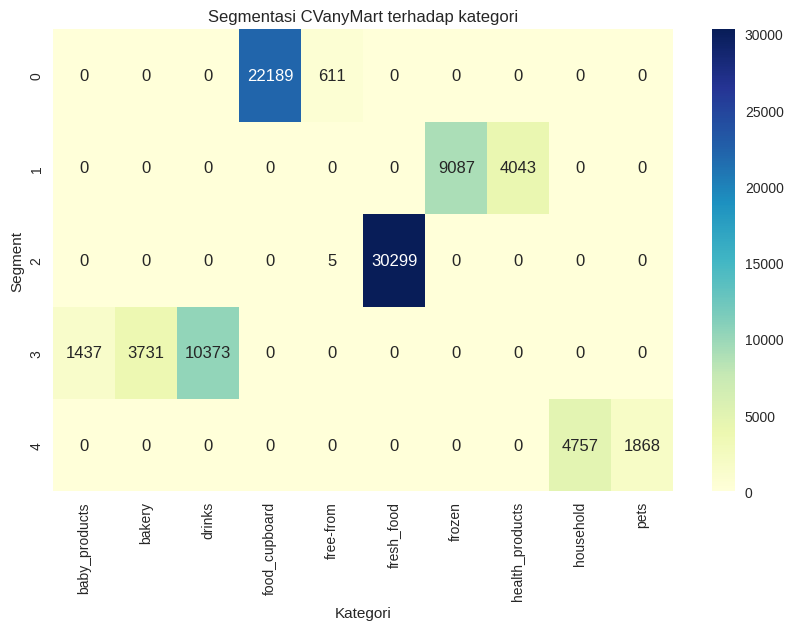

In [ ]:
# contingency table untuk menunjukkan jumlah kategori untuk setiap cluster
contingency_tabledf1 = pd.crosstab(sampled_df1['kmeans_cluster'], sampled_df1['kategori'])

contingency_tabledf1.columns = [str(col) for col in contingency_tabledf1.columns]

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_tabledf1, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Segmentasi CVanyMart terhadap kategori')
plt.xlabel('Kategori')
plt.ylabel('Segment')
plt.show()

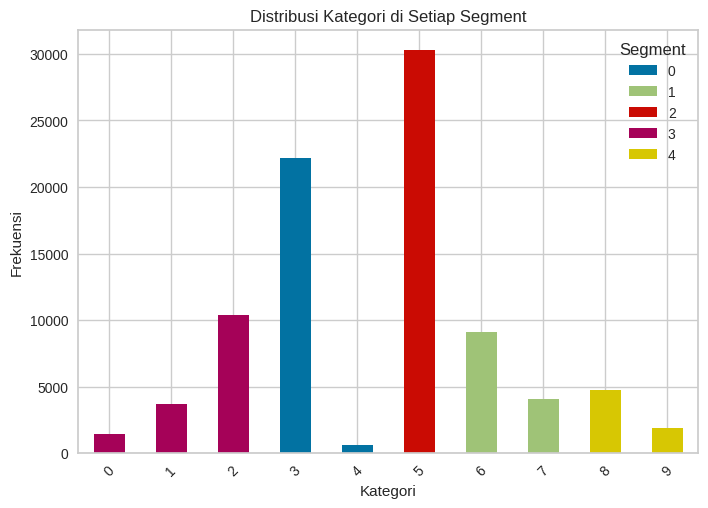

In [ ]:
# Diagram batang untuk 'kategori_encoded' di setiap klaster
cross_tab = pd.crosstab(sampled_df1['kategori_encoded'], sampled_df1['kmeans_cluster'])
cross_tab.plot(kind='bar', stacked=True)
plt.title('Distribusi Kategori di Setiap Segment')
plt.xlabel('Kategori')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.show()

####**CVFamz**

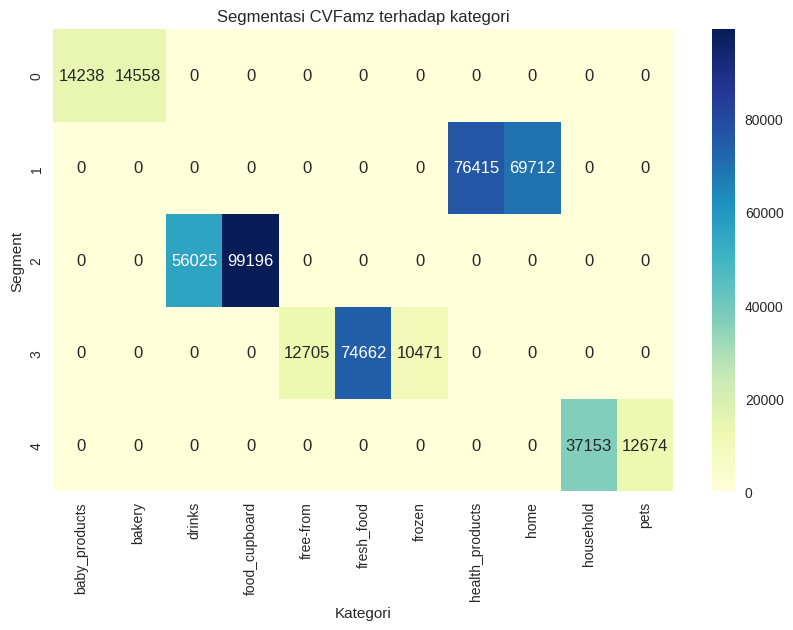

In [ ]:
# contingency table untuk menunjukkan jumlah kategori untuk setiap cluster
contingency_tabledf2 = pd.crosstab(sampled_df2['kmeans_cluster'], sampled_df2['kategori'])

contingency_tabledf2.columns = [str(col) for col in contingency_tabledf2.columns]

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_tabledf2, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Segmentasi CVFamz terhadap kategori')
plt.xlabel('Kategori')
plt.ylabel('Segment')
plt.show()

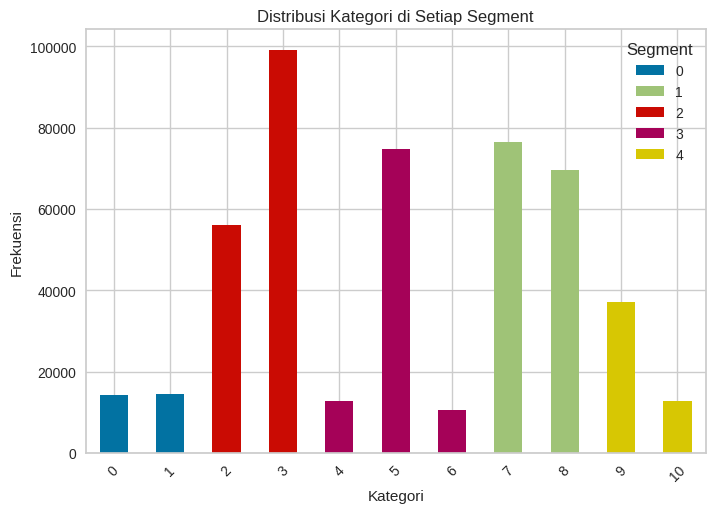

In [ ]:
#Diagram batang untuk 'kategori_encoded' di setiap klaster
cross_tab = pd.crosstab(sampled_df2['kategori_encoded'], sampled_df2['kmeans_cluster'])
cross_tab.plot(kind='bar', stacked=True)
plt.title('Distribusi Kategori di Setiap Segment')
plt.xlabel('Kategori')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.show()

####**BritishMart**

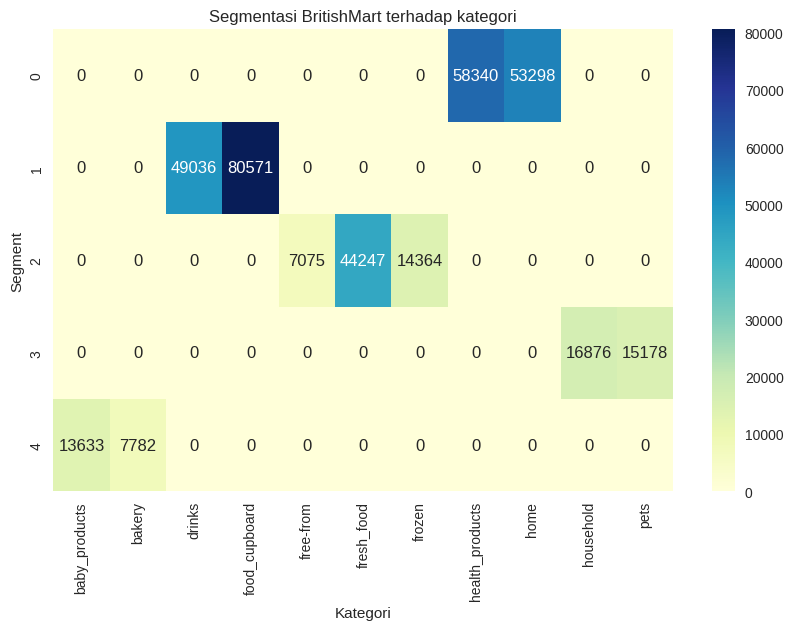

In [ ]:
# contingency table untuk menunjukkan jumlah kategori untuk setiap cluster
contingency_table_df3 = pd.crosstab(sampled_df3['kmeans_cluster'], sampled_df3['kategori'])

contingency_table_df3.columns = [str(col) for col in contingency_table_df3.columns]

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table_df3, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Segmentasi BritishMart terhadap kategori')
plt.xlabel('Kategori')
plt.ylabel('Segment')
plt.show()


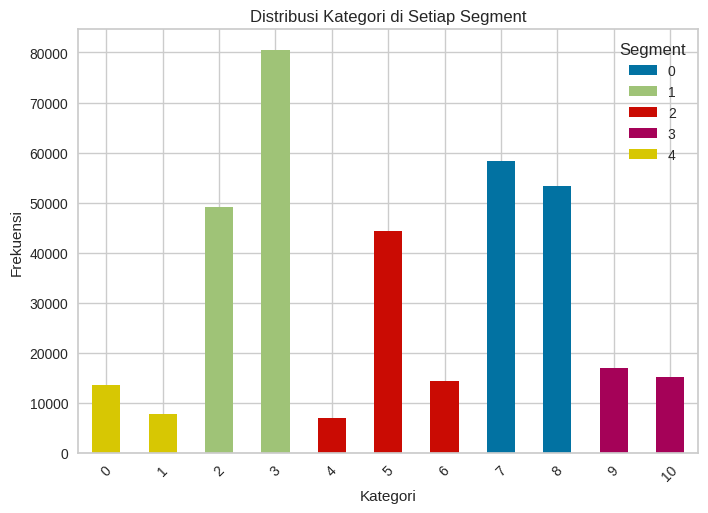

In [ ]:
# Diagram batang untuk 'kategori_encoded' di setiap klaster
cross_tab = pd.crosstab(sampled_df3['kategori_encoded'], sampled_df3['kmeans_cluster'])
cross_tab.plot(kind='bar', stacked=True)
plt.title('Distribusi Kategori di Setiap Segment')
plt.xlabel('Kategori')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.show()

####**UKMart**

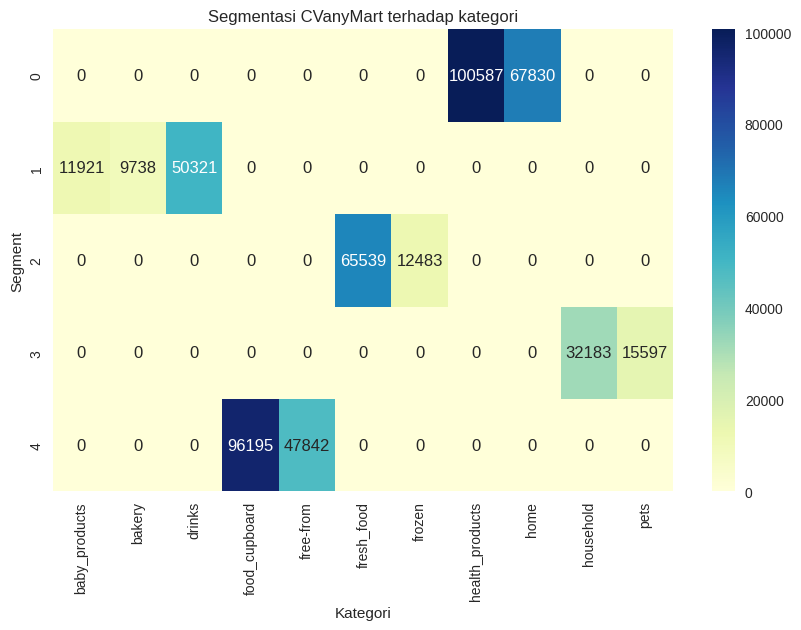

In [ ]:
# contingency table untuk menunjukkan jumlah kategori untuk setiap cluster
contingency_table_df4 = pd.crosstab(sampled_df4['kmeans_cluster'], sampled_df4['kategori'])

contingency_table_df4.columns = [str(col) for col in contingency_table_df4.columns]

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table_df4, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Segmentasi CVanyMart terhadap kategori')
plt.xlabel('Kategori')
plt.ylabel('Segment')
plt.show()

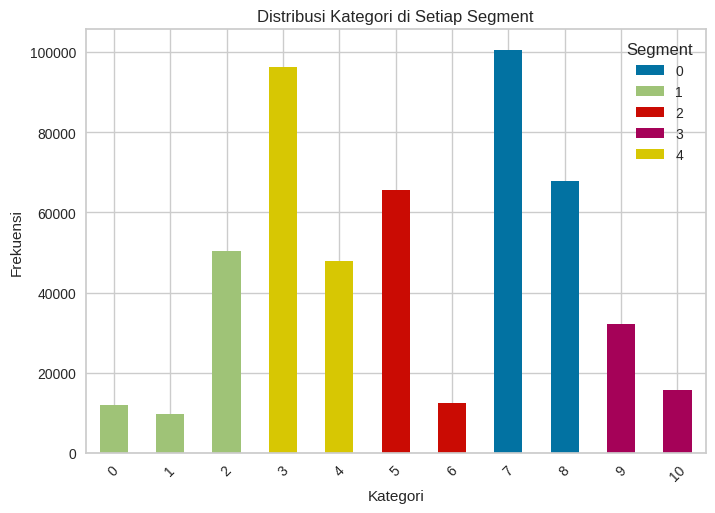

In [ ]:
# Diagram batang untuk 'kategori_encoded' di setiap klaster
cross_tab = pd.crosstab(sampled_df4['kategori_encoded'], sampled_df4['kmeans_cluster'])
cross_tab.plot(kind='bar', stacked=True)
plt.title('Distribusi Kategori di Setiap Segment')
plt.xlabel('Kategori')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.show()

####**ScottishMart**

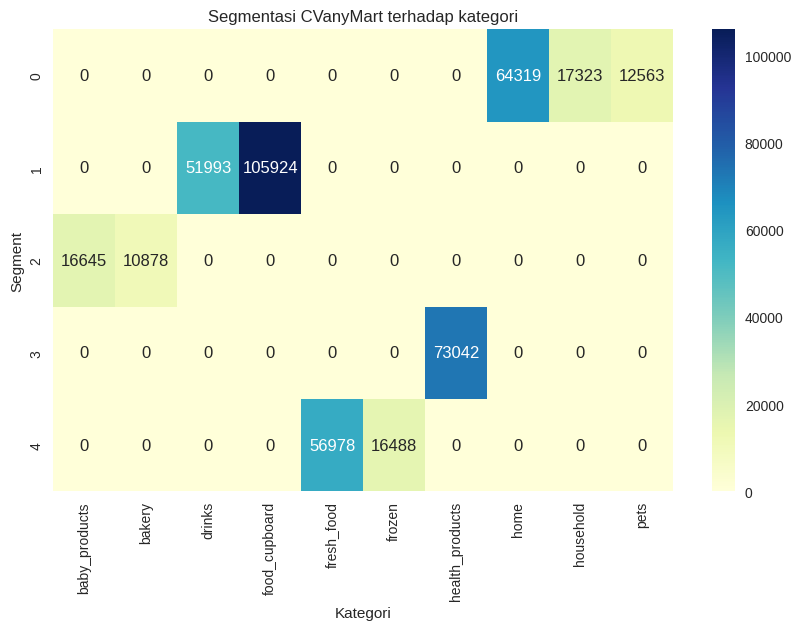

In [ ]:
# contingency table untuk menunjukkan jumlah kategori untuk setiap cluster
contingency_table_df5 = pd.crosstab(sampled_df5['kmeans_cluster'], sampled_df5['kategori'])

contingency_table_df5.columns = [str(col) for col in contingency_table_df5.columns]

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table_df5, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Segmentasi CVanyMart terhadap kategori')
plt.xlabel('Kategori')
plt.ylabel('Segment')
plt.show()

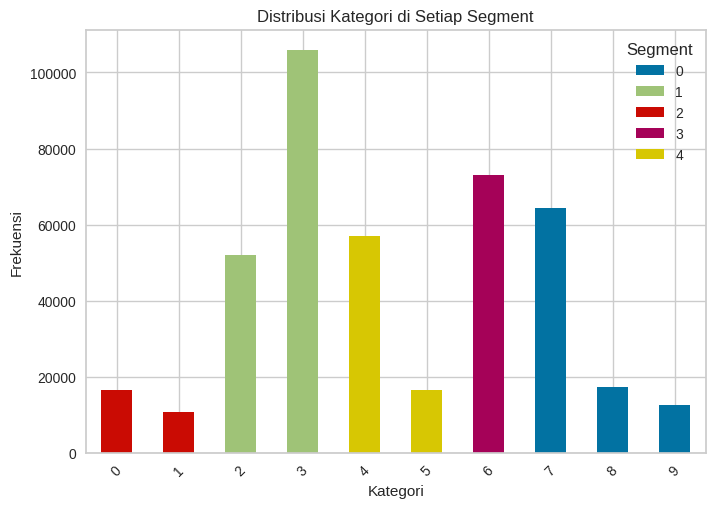

In [ ]:
# Diagram batang untuk 'kategori_encoded' di setiap klaster
cross_tab = pd.crosstab(sampled_df5['kategori_encoded'], sampled_df5['kmeans_cluster'])
cross_tab.plot(kind='bar', stacked=True)
plt.title('Distribusi Kategori di Setiap Segment')
plt.xlabel('Kategori')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.show()

###**RFM Product**

####**CVanyMart**

In [ ]:
sampled_rfm1=CVanyMart[(CVanyMart['tahun'] >= 2023)]

# Pastikan kolom 'tanggal_transaksi' bertipe datetime
sampled_rfm1['tanggal_transaksi'] = pd.to_datetime(sampled_rfm1['tanggal'])

# Mengatur tanggal referensi (misalnya, tanggal paling akhir di dataset)
reference_date = sampled_rfm1['tanggal'].max()

# Hitung Recency: jumlah hari sejak transaksi terakhir hingga tanggal referensi
recency_data = sampled_rfm1.groupby('nama').agg({'tanggal': lambda x: (reference_date - x.max()).days}).reset_index()
recency_data.columns = ['nama', 'Recency']

# Hitung Monetary: total pemasukan (Total_Pemasukan)
monetary_data = sampled_rfm1.groupby('nama')['harga_pound'].sum().reset_index()
monetary_data.columns = ['nama', 'Monetary']

# Gabungkan data Monetary dan Recency
rfm6= monetary_data.merge(recency_data[['nama', 'Recency']], on='nama')

# Hitung Frequency: jumlah transaksi (Frequency)
rfm6['Frequency'] = sampled_rfm1.groupby('nama').size().reset_index(name='Frequency')['Frequency']

# Tambahkan kolom cluster ke dalam RFM data
rfm6 = rfm6.merge(sampled_df1[['nama', 'kmeans_cluster','kategori']], on='nama', how='left')

# Hapus duplikat kategori, jika ada, dan pertahankan baris pertama yang ditemukan
rfm6 = rfm6.drop_duplicates(subset=['nama'])

# Menampilkan DataFrame RFM dengan clustering
print("\nDataFrame RFM dengan clustering:")
rfm6[['nama','kategori', 'Recency', 'Frequency', 'Monetary', 'kmeans_cluster']]

<ipython-input-223-12033924f338>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_rfm1['tanggal_transaksi'] = pd.to_datetime(sampled_rfm1['tanggal'])



DataFrame RFM dengan clustering:


nama         kategori  \
0                                          176g Milkybar    food_cupboard   
1                                          194g Munchies    food_cupboard   
2      Abidec Multivitamin Drops For Babies And Child...  health_products   
3               Acti Leaf Almond Unsweetened UHT Milk 1l       fresh_food   
21                        Acti Leaf Barista Oat Drink 1l       fresh_food   
...                                                  ...              ...   
88338  Ye Olde Oak 8 Hot Dogs In Brine 400g (184g Dra...    food_cupboard   
88355                     Yorkshire Tea 210 Teabags 375g           drinks   
88367   Älska Nordic Berries Premium Swedish Cider 440ml           drinks   
88368  Älska Strawberry & Lime Premium Swedish Cider ...           drinks   
88373    Älska The Swedish Cider Strawberry & Lime 500ml           drinks   

       Recency  Frequency  Monetary  kmeans_cluster  
0          278          1    1.6940               0  
1          420          1    1.3020               0  
2           16          1    2.0480               1  
3           50         18   36.0700               2  
21          33         17   33.9780               2  
...        ...        ...       ...             ...  
88338        8         17   32.2640               0  
88355        3         12   38.2940               3  
88367      234          1    4.8100               3  
88368       84          5   19.3300               3  
88373        3         27  104.5368               3  

[5945 rows x 6 columns]

In [ ]:
# Membagi nilai RFM menjadi kuartil
rfm6['R'] = pd.qcut(x = rfm6['Recency'], q=4, labels=range(4,0,-1))
rfm6['F'] = pd.qcut(x = rfm6['Frequency'], q=4, labels=range(1,5,1))
rfm6['M'] = pd.qcut(x = rfm6['Monetary'], q=4, labels=range(1,5,1))
rfm6.head()

nama  Monetary  Recency  \
0                                       176g Milkybar     1.694      278   
1                                       194g Munchies     1.302      420   
2   Abidec Multivitamin Drops For Babies And Child...     2.048       16   
3            Acti Leaf Almond Unsweetened UHT Milk 1l    36.070       50   
21                     Acti Leaf Barista Oat Drink 1l    33.978       33   

    Frequency  kmeans_cluster         kategori  R  F  M  
0           1               0    food_cupboard  1  1  1  
1           1               0    food_cupboard  1  1  1  
2           1               1  health_products  3  1  1  
3          18               2       fresh_food  1  3  3  
21         17               2       fresh_food  2  3  3

In [ ]:
# Convert 'F' and 'M' columns to numeric
rfm6['R'] = pd.to_numeric(rfm6['R'])
rfm6['F'] = pd.to_numeric(rfm6['F'])
rfm6['M'] = pd.to_numeric(rfm6['M'])

# Calculate RFM score
rfm6['RFM'] = rfm6[['R','F', 'M']].sum(axis=1)

# Create RFM Function to Score
def rfm_segment(rfm6):
    if rfm6['RFM'] >= 12:
        return 'Best Product'
    elif (rfm6['RFM'] >= 9) and (rfm6['RFM'] < 12):
        return "Good Product"
    elif (rfm6['RFM'] >= 6) and (rfm6['RFM'] < 9):
        return "High Potential Product"
    else:
        return "Decent Product"

In [ ]:
rfm6["Segment Product"] = rfm6.apply(rfm_segment, axis=1)
rfm6.head()

nama  Monetary  Recency  \
0                                       176g Milkybar     1.694      278   
1                                       194g Munchies     1.302      420   
2   Abidec Multivitamin Drops For Babies And Child...     2.048       16   
3            Acti Leaf Almond Unsweetened UHT Milk 1l    36.070       50   
21                     Acti Leaf Barista Oat Drink 1l    33.978       33   

    Frequency  kmeans_cluster         kategori  R  F  M  RFM  \
0           1               0    food_cupboard  1  1  1    3   
1           1               0    food_cupboard  1  1  1    3   
2           1               1  health_products  3  1  1    5   
3          18               2       fresh_food  1  3  3    7   
21         17               2       fresh_food  2  3  3    8   

           Segment Product  
0           Decent Product  
1           Decent Product  
2           Decent Product  
3   High Potential Product  
21  High Potential Product

In [ ]:
# Menghitung skor RFM dengan memberi peringkat pada setiap metrik
rfm6['R_rank'] = rfm6['Recency'].rank(ascending=False)
rfm6['F_rank'] = rfm6['Frequency'].rank(ascending=True)
rfm6['M_rank'] = rfm6['Monetary'].rank(ascending=True)

# Menghitung skor total RFM
rfm6['RFM_Score'] = rfm6['R_rank'] + rfm6['F_rank'] + rfm6['M_rank']

print(rfm6)

                                                    nama  Monetary  Recency  \
0                                          176g Milkybar    1.6940      278   
1                                          194g Munchies    1.3020      420   
2      Abidec Multivitamin Drops For Babies And Child...    2.0480       16   
3               Acti Leaf Almond Unsweetened UHT Milk 1l   36.0700       50   
21                        Acti Leaf Barista Oat Drink 1l   33.9780       33   
...                                                  ...       ...      ...   
88338  Ye Olde Oak 8 Hot Dogs In Brine 400g (184g Dra...   32.2640        8   
88355                     Yorkshire Tea 210 Teabags 375g   38.2940        3   
88367   Älska Nordic Berries Premium Swedish Cider 440ml    4.8100      234   
88368  Älska Strawberry & Lime Premium Swedish Cider ...   19.3300       84   
88373    Älska The Swedish Cider Strawberry & Lime 500ml  104.5368        3   

       Frequency  kmeans_cluster         kategori  

In [ ]:
# Menentukan produk dengan skor RFM terbesar
top_rfm = rfm6.sort_values('RFM_Score', ascending=False).head(1)

print("\nProduk dengan nilai RFM terbesar:")
top_rfm.head()


Produk dengan nilai RFM terbesar:


nama  Monetary  Recency  \
82485  The Infusionist Chilli & Makrut Lime Margarita...   171.394        2   

       Frequency  kmeans_cluster kategori  R  F  M  RFM Segment Product  \
82485         27               3   drinks  4  4  4   12    Best Product   

       R_rank  F_rank  M_rank  RFM_Score  
82485  5449.0  5939.5  5944.0    17332.5

In [ ]:
# Menentukan Kategori dengan skor RFM terkecil
lowest_rfm = rfm6.sort_values('RFM_Score').head(1)

print("\nProduk dengan nilai RFM terkecil:")
lowest_rfm.head()


Produk dengan nilai RFM terkecil:


nama  Monetary  Recency  Frequency  \
26546  Elkes Sports Shortcake Biscuits 200g     0.842      423          1   

       kmeans_cluster       kategori  R  F  M  RFM Segment Product  R_rank  \
26546               0  food_cupboard  1  1  1    3  Decent Product     1.0   

       F_rank  M_rank  RFM_Score  
26546   128.0     7.0      136.0

In [ ]:
rfm6.groupby('Segment Product').agg({
    'Recency':'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
})

Recency  Frequency   Monetary
Segment Product                                        
Best Product             3.895000  21.955000  58.682491
Decent Product          94.748313   7.430499  13.138478
Good Product            13.605200  19.038036  44.980956
High Potential Product  27.626258  15.304209  31.085449

kmeans_cluster
2    1900
0    1637
3    1145
1     833
4     430
Name: count, dtype: int64


<Figure size 1200x1000 with 0 Axes>

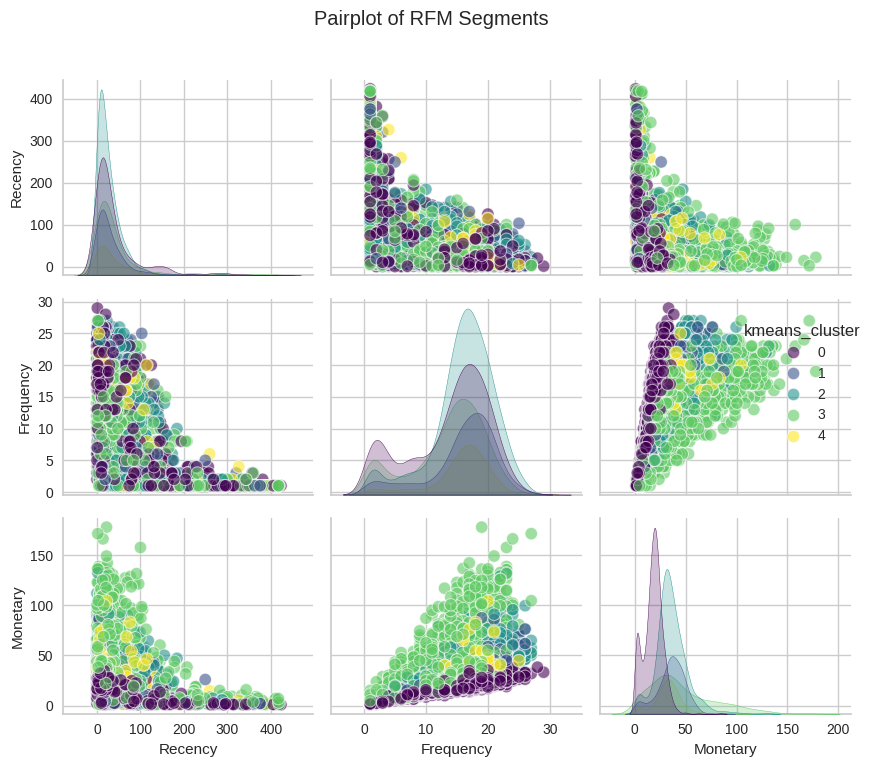

In [ ]:
# Periksa distribusi cluster
print(rfm6['kmeans_cluster'].value_counts())

# Plot pairplot
plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(rfm6,
                        vars=['Recency', 'Frequency', 'Monetary'],
                        hue='kmeans_cluster',
                        palette='viridis',
                        markers='o',
                        plot_kws={'alpha':0.6, 's':80})
pairplot.fig.suptitle('Pairplot of RFM Segments', y=1.02)
plt.tight_layout()
plt.show()

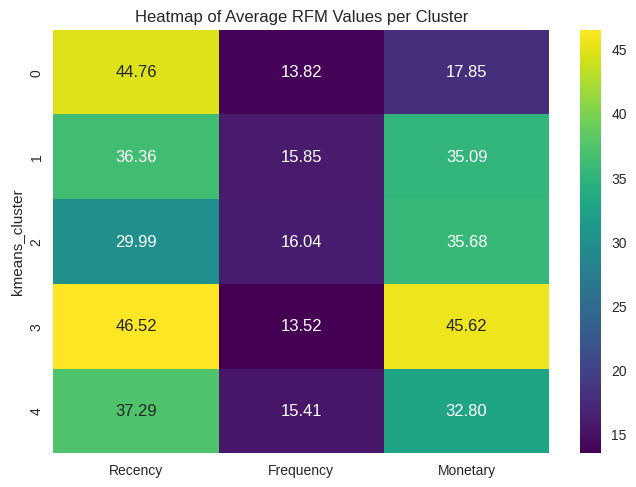

In [ ]:
# Membuat pivot table untuk rata-rata nilai RFM per cluster
rfm_cluster_means = rfm6.groupby('kmeans_cluster')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()
# Membuat heatmap dari rata-rata nilai RFM per cluster
heatmap = sns.heatmap(rfm_cluster_means.set_index('kmeans_cluster'), annot=True, cmap='viridis', fmt='.2f')
heatmap.set_title('Heatmap of Average RFM Values per Cluster')

# Menampilkan heatmap
plt.show()

####**CVFamz**

In [ ]:
sampled_rfm2=CVFamz[(CVFamz['tahun'] >= 2023)]

# Pastikan kolom 'tanggal_transaksi' bertipe datetime
sampled_rfm2['tanggal_transaksi'] = pd.to_datetime(sampled_rfm2['tanggal'])

# Mengatur tanggal referensi (misalnya, tanggal paling akhir di dataset)
reference_date = sampled_rfm2['tanggal_transaksi'].max()

# Hitung Recency: jumlah hari sejak transaksi terakhir hingga tanggal referensi
recency_data = sampled_rfm2.groupby('nama').agg({'tanggal_transaksi': lambda x: (reference_date - x.max()).days}).reset_index()
recency_data.columns = ['nama', 'Recency']

# Hitung Monetary: total pemasukan (Total_Pemasukan)
monetary_data = sampled_rfm2.groupby('nama')['harga_pound'].sum().reset_index()
monetary_data.columns = ['nama', 'Monetary']

# Gabungkan data Monetary dan Recency
rfm7 = monetary_data.merge(recency_data, on='nama')

# Hitung Frequency: jumlah transaksi (Frequency)
frequency_data = sampled_rfm2.groupby('nama').size().reset_index(name='Frequency')
rfm7 = rfm7.merge(frequency_data, on='nama')

# Tambahkan kolom cluster ke dalam RFM data
rfm7 = rfm7.merge(sampled_df2[['nama', 'kmeans_cluster','kategori']].drop_duplicates(), on='nama', how='left')

# Menampilkan DataFrame RFM dengan clustering
print("\nDataFrame RFM dengan clustering:")
print(rfm7[['nama','kategori', 'Recency', 'Frequency', 'Monetary', 'kmeans_cluster']])

<ipython-input-233-a07d4f9ca0d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_rfm2['tanggal_transaksi'] = pd.to_datetime(sampled_rfm2['tanggal'])



DataFrame RFM dengan clustering:
                                                    nama         kategori  \
0      &Sisters Plastic Free Bleach Free Breathable V...  health_products   
1      &Sisters Plastic Free Bleach Free Heavy Non-Ap...  health_products   
2      &Sisters by Mooncup Everyday Very Light Panty ...  health_products   
3                            1000 Stories Zinfandel 75cl           drinks   
4                                    151 2X3G Super Glue             home   
...                                                  ...              ...   
34379                             Ísey Skyr Baked Apples       fresh_food   
34380                                Ísey Skyr Blueberry       fresh_food   
34381                               Ísey Skyr Strawberry       fresh_food   
34382                                  Ísey Skyr Vanilla       fresh_food   
34383                     Łowicz Cherry Sour Syrup 400ml    food_cupboard   

       Recency  Frequency  Monetary  kmea

In [ ]:
# Membagi nilai RFM menjadi kuartil
rfm7['R'] = pd.qcut(rfm7['Recency'], q=4, labels=False, duplicates='drop') + 1
rfm7['F'] = pd.qcut(rfm7['Frequency'], q=4, labels=False, duplicates='drop') + 1
rfm7['M'] = pd.qcut(rfm7['Monetary'], q=4, labels=False, duplicates='drop') + 1

rfm7['R'] = rfm7['R'].replace({4: 1, 3: 2, 2: 3, 1: 4})

rfm7.head()

nama  Monetary  Recency  \
0  &Sisters Plastic Free Bleach Free Breathable V...     31.95       12   
1  &Sisters Plastic Free Bleach Free Heavy Non-Ap...     47.60       17   
2  &Sisters by Mooncup Everyday Very Light Panty ...     35.50      211   
3                        1000 Stories Zinfandel 75cl    250.00       18   
4                                151 2X3G Super Glue     31.50        5   

   Frequency  kmeans_cluster         kategori  R  F  M  
0          9               1  health_products  3  1  2  
1         17               1  health_products  2  2  2  
2         10               1  health_products  1  1  2  
3         17               2           drinks  2  2  4  
4         18               1             home  4  2  2

In [ ]:
# Convert 'F' and 'M' columns to numeric
rfm7['R'] = pd.to_numeric(rfm7['R'])
rfm7['F'] = pd.to_numeric(rfm7['F'])
rfm7['M'] = pd.to_numeric(rfm7['M'])

# Calculate RFM score
rfm7['RFM'] = rfm7[['R','F', 'M']].sum(axis=1)

In [ ]:
# Create RFM Function to Score
def rfm_segment(rfm7):
    if rfm7['RFM'] >= 12:
        return 'Best Product'
    elif (rfm7['RFM'] >= 9) and (rfm7['RFM'] < 12):
        return "Good Product"
    elif (rfm7['RFM'] >= 6) and (rfm7['RFM'] < 9):
        return "High Potential Product"
    else:
        return "Decent Product"

rfm7["Segment Product"] = rfm7.apply(rfm_segment, axis=1)
rfm7.head()

nama  Monetary  Recency  \
0  &Sisters Plastic Free Bleach Free Breathable V...     31.95       12   
1  &Sisters Plastic Free Bleach Free Heavy Non-Ap...     47.60       17   
2  &Sisters by Mooncup Everyday Very Light Panty ...     35.50      211   
3                        1000 Stories Zinfandel 75cl    250.00       18   
4                                151 2X3G Super Glue     31.50        5   

   Frequency  kmeans_cluster         kategori  R  F  M  RFM  \
0          9               1  health_products  3  1  2    6   
1         17               1  health_products  2  2  2    6   
2         10               1  health_products  1  1  2    4   
3         17               2           drinks  2  2  4    8   
4         18               1             home  4  2  2    8   

          Segment Product  
0  High Potential Product  
1  High Potential Product  
2          Decent Product  
3  High Potential Product  
4  High Potential Product

In [ ]:
# Menghitung skor RFM dengan memberi peringkat pada setiap metrik
rfm7['R_rank'] = rfm7['Recency'].rank(ascending=False)
rfm7['F_rank'] = rfm7['Frequency'].rank(ascending=True)
rfm7['M_rank'] = rfm7['Monetary'].rank(ascending=True)

# Menghitung skor total RFM
rfm7['RFM_Score'] = rfm7['R_rank'] + rfm7['F_rank'] + rfm7['M_rank']

print(rfm7)

                                                    nama  Monetary  Recency  \
0      &Sisters Plastic Free Bleach Free Breathable V...     31.95       12   
1      &Sisters Plastic Free Bleach Free Heavy Non-Ap...     47.60       17   
2      &Sisters by Mooncup Everyday Very Light Panty ...     35.50      211   
3                            1000 Stories Zinfandel 75cl    250.00       18   
4                                    151 2X3G Super Glue     31.50        5   
...                                                  ...       ...      ...   
34379                             Ísey Skyr Baked Apples     38.00        7   
34380                                Ísey Skyr Blueberry     25.65       11   
34381                               Ísey Skyr Strawberry     25.65       11   
34382                                  Ísey Skyr Vanilla     25.65       12   
34383                     Łowicz Cherry Sour Syrup 400ml     31.35        6   

       Frequency  kmeans_cluster         kategori  

In [ ]:
# Menentukan produk dengan skor RFM terbesar
top_rfm = rfm7.sort_values('RFM_Score', ascending=False).head(1)

print("\nProduk dengan nilai RFM terbesar:")
top_rfm.head()


Produk dengan nilai RFM terbesar:


nama  Monetary  Recency  Frequency  \
24068  Mont Blanc Legend Eau De Toilette 100ml    854.05        0         19   

       kmeans_cluster         kategori  R  F  M  RFM Segment Product   R_rank  \
24068               1  health_products  4  3  4   11    Good Product  33776.0   

        F_rank   M_rank  RFM_Score  
24068  29607.0  34121.0    97504.0

In [ ]:
# Menentukan produk dengan skor RFM terkecil
lowest_rfm = rfm7.sort_values('RFM_Score').head(1)

print("\nProduk dengan nilai RFM terkecil:")
lowest_rfm.head()


Produk dengan nilai RFM terkecil:


nama  Monetary  Recency  \
17829  Gourmet Gold Succulent Delights with Chicken      0.64      408   

       Frequency  kmeans_cluster kategori  R  F  M  RFM Segment Product  \
17829          1               4     pets  1  1  1    3  Decent Product   

       R_rank  F_rank  M_rank  RFM_Score  
17829     8.0   118.0     1.0      127.0

In [ ]:
rfm7.groupby('Segment Product').agg({
    'Recency':'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
})

Recency  Frequency    Monetary
Segment Product                                         
Decent Product          67.941988  13.851632   30.791573
Good Product             6.563612  18.222128  181.619943
High Potential Product  13.724088  17.246350   86.468653

kmeans_cluster
2    10574
1    10209
3     7642
4     3935
0     2024
Name: count, dtype: int64


<Figure size 1200x1000 with 0 Axes>

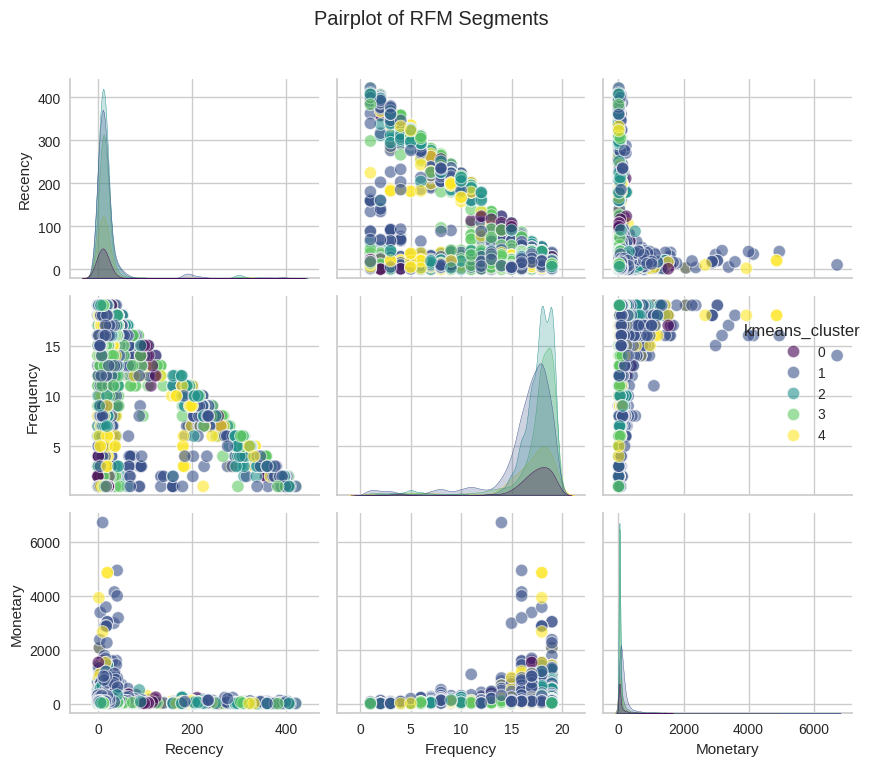

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Periksa distribusi cluster
print(rfm7['kmeans_cluster'].value_counts())

# Plot pairplot
plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(rfm7,
                        vars=['Recency', 'Frequency', 'Monetary'],
                        hue='kmeans_cluster',
                        palette='viridis',
                        markers='o',
                        plot_kws={'alpha':0.6, 's':80})
pairplot.fig.suptitle('Pairplot of RFM Segments', y=1.02)
plt.tight_layout()
plt.show()

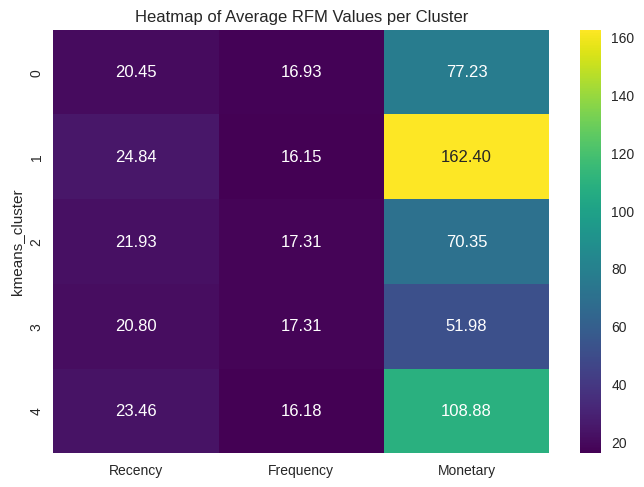

In [ ]:
# Membuat pivot table untuk rata-rata nilai RFM per cluster
rfm_cluster_means2 = rfm7.groupby('kmeans_cluster')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()
# Membuat heatmap dari rata-rata nilai RFM per cluster
heatmap = sns.heatmap(rfm_cluster_means2.set_index('kmeans_cluster'), annot=True, cmap='viridis', fmt='.2f')
heatmap.set_title('Heatmap of Average RFM Values per Cluster')

# Menampilkan heatmap
plt.show()

####**BritishMart**

In [ ]:
sampled_rfm3=BritishMart[(BritishMart['tahun'] >= 2023)]

# Pastikan kolom 'tanggal_transaksi' bertipe datetime
sampled_rfm3['tanggal_transaksi'] = pd.to_datetime(sampled_rfm3['tanggal'])

# Mengatur tanggal referensi (misalnya, tanggal paling akhir di dataset)
reference_date = sampled_rfm3['tanggal'].max()

# Hitung Recency: jumlah hari sejak transaksi terakhir hingga tanggal referensi
recency_data = sampled_rfm3.groupby('nama').agg({'tanggal': lambda x: (reference_date - x.max()).days}).reset_index()
recency_data.columns = ['nama', 'Recency']

# Hitung Monetary: total pemasukan (Total_Pemasukan)
monetary_data = sampled_rfm3.groupby('nama')['harga_pound'].sum().reset_index()
monetary_data.columns = ['nama', 'Monetary']

# Gabungkan data Monetary dan Recency
rfm8= monetary_data.merge(recency_data[['nama', 'Recency']], on='nama')

# Hitung Frequency: jumlah transaksi (Frequency)
rfm8['Frequency'] = sampled_rfm3.groupby('nama').size().reset_index(name='Frequency')['Frequency']

# Tambahkan kolom cluster ke dalam RFM data
rfm8 = rfm8.merge(sampled_df3[['nama', 'kmeans_cluster','kategori']], on='nama', how='left')

# Hapus duplikat kategori, jika ada, dan pertahankan baris pertama yang ditemukan
rfm8 = rfm8.drop_duplicates(subset=['nama'])

# Menampilkan DataFrame rfm dengan clustering
print("\nDataFrame rfm dengan clustering:")
rfm8[['nama','kategori', 'Recency', 'Frequency', 'Monetary', 'kmeans_cluster']]

<ipython-input-243-8aedb1adc999>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_rfm3['tanggal_transaksi'] = pd.to_datetime(sampled_rfm3['tanggal'])



DataFrame rfm dengan clustering:


nama         kategori  Recency  \
0         (S) Morrisons Scottish Sparkling Water           drinks      305   
6         1001 Carpet Fresh Soft Jasmine & Linen        household       16   
22                    12 Pearl Assorted Balloons             home       18   
42                          1698 Celebration Ale           drinks       39   
60                          19 Crimes Chardonnay           drinks       56   
...                                          ...              ...      ...   
360301    evian Natural Mineral Water Sports Cap           drinks       18   
360320        lights by TENA Incontinence Liners  health_products       20   
360340    lights by TENA Incontinence Liners Duo    baby_products       14   
360360  lights by TENA Light Incontinence Liners  health_products       20   
360380   lights by TENA Long Incontinence Liners  health_products       20   

        Frequency  Monetary  kmeans_cluster  
0               6      4.20               1  
6              16     42.40               3  
22             20     39.80               0  
42             18     45.00               1  
60             18    156.00               1  
...           ...       ...             ...  
360301         19     23.75               1  
360320         20     38.00               0  
360340         20     75.00               4  
360360         20     38.00               0  
360380         20     38.00               0  

[22571 rows x 6 columns]

In [ ]:
# Membagi nilai rfm menjadi kuartil
rfm8['R'] = pd.qcut(x = rfm8['Recency'], q=4, labels=range(4,0,-1))
rfm8['F'] = pd.qcut(x = rfm8['Frequency'], q=4, labels=range(1,5,1))
rfm8['M'] = pd.qcut(x = rfm8['Monetary'], q=4, labels=range(1,5,1))
rfm8.head()

nama  Monetary  Recency  Frequency  \
0   (S) Morrisons Scottish Sparkling Water       4.2      305          6   
6   1001 Carpet Fresh Soft Jasmine & Linen      42.4       16         16   
22              12 Pearl Assorted Balloons      39.8       18         20   
42                    1698 Celebration Ale      45.0       39         18   
60                    19 Crimes Chardonnay     156.0       56         18   

    kmeans_cluster   kategori  R  F  M  
0                1     drinks  1  1  1  
6                3  household  2  2  2  
22               0       home  2  4  2  
42               1     drinks  1  3  3  
60               1     drinks  1  3  4

In [ ]:
# Convert 'F' and 'M' columns to numeric
rfm8['R'] = pd.to_numeric(rfm8['R'])
rfm8['F'] = pd.to_numeric(rfm8['F'])
rfm8['M'] = pd.to_numeric(rfm8['M'])

# Calculate rfm score
rfm8['RFM'] = rfm8[['R','F', 'M']].sum(axis=1)

In [ ]:
# Create rfm Function to Score
def rfm_segment(rfm8):
    if rfm8['RFM'] >= 12:
        return 'Best Product'
    elif (rfm8['RFM'] >= 9) and (rfm8['RFM'] < 12):
        return "Good Product"
    elif (rfm8['RFM'] >= 6) and (rfm8['RFM'] < 9):
        return "High Potential Product"
    else:
        return "Decent Product"

rfm8["Segment Product"] = rfm8.apply(rfm_segment, axis=1)
rfm8.head()

nama  Monetary  Recency  Frequency  \
0   (S) Morrisons Scottish Sparkling Water       4.2      305          6   
6   1001 Carpet Fresh Soft Jasmine & Linen      42.4       16         16   
22              12 Pearl Assorted Balloons      39.8       18         20   
42                    1698 Celebration Ale      45.0       39         18   
60                    19 Crimes Chardonnay     156.0       56         18   

    kmeans_cluster   kategori  R  F  M  RFM         Segment Product  
0                1     drinks  1  1  1    3          Decent Product  
6                3  household  2  2  2    6  High Potential Product  
22               0       home  2  4  2    8  High Potential Product  
42               1     drinks  1  3  3    7  High Potential Product  
60               1     drinks  1  3  4    8  High Potential Product

In [ ]:
# Menghitung skor rfm dengan memberi peringkat pada setiap metrik
rfm8['R_rank'] = rfm8['Recency'].rank(ascending=False)
rfm8['F_rank'] = rfm8['Frequency'].rank(ascending=True)
rfm8['M_rank'] = rfm8['Monetary'].rank(ascending=True)

# Menghitung skor total rfm
rfm8['RFM_Score'] = rfm8['R_rank'] + rfm8['F_rank'] + rfm8['M_rank']

print(rfm8)

                                            nama  Monetary  Recency  \
0         (S) Morrisons Scottish Sparkling Water      4.20      305   
6         1001 Carpet Fresh Soft Jasmine & Linen     42.40       16   
22                    12 Pearl Assorted Balloons     39.80       18   
42                          1698 Celebration Ale     45.00       39   
60                          19 Crimes Chardonnay    156.00       56   
...                                          ...       ...      ...   
360301    evian Natural Mineral Water Sports Cap     23.75       18   
360320        lights by TENA Incontinence Liners     38.00       20   
360340    lights by TENA Incontinence Liners Duo     75.00       14   
360360  lights by TENA Light Incontinence Liners     38.00       20   
360380   lights by TENA Long Incontinence Liners     38.00       20   

        Frequency  kmeans_cluster         kategori  R  F  M  RFM  \
0               6               1           drinks  1  1  1    3   
6          

In [ ]:
# Menentukan produk dengan skor rfm terbesar
top_rfm = rfm8.sort_values('RFM_Score', ascending=False).head(1)

print("\nProduk dengan nilai rfm terbesar:")
top_rfm.head()


Produk dengan nilai rfm terbesar:


nama  Monetary  Recency  Frequency  \
138092  Lego Dollhouse Gabby's Dollhouse 10788    1400.0        0         20   

        kmeans_cluster kategori  R  F  M  RFM Segment Product   R_rank  \
138092               0     home  4  4  4   12    Best Product  22147.5   

         F_rank   M_rank  RFM_Score  
138092  21036.0  22561.0    65744.5

In [ ]:
# Menentukan produk dengan skor rfm terkecil
lowest_rfm = rfm8.sort_values('RFM_Score').head(1)

print("\nProduk dengan nilai rfm terkecil:")
lowest_rfm.head()


Produk dengan nilai rfm terkecil:


nama  Monetary  Recency  \
200701  Morrisons Orange Juice From Concentrate Smooth      1.15      415   

        Frequency  kmeans_cluster kategori  R  F  M  RFM Segment Product  \
200701          1               1   drinks  1  1  1    3  Decent Product   

        R_rank  F_rank  M_rank  RFM_Score  
200701    45.0   188.0    34.0      267.0

In [ ]:
rfm8.groupby('Segment Product').agg({
    'Recency':'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
})

Recency  Frequency    Monetary
Segment Product                                         
Best Product             1.520913  20.022814  289.232053
Decent Product          73.025527  11.321865   24.333294
Good Product             7.740483  18.002681  133.538665
High Potential Product  15.086353  16.294530   70.561115

kmeans_cluster
1    8420
0    6948
2    4045
3    1927
4    1231
Name: count, dtype: int64


<Figure size 1200x1000 with 0 Axes>

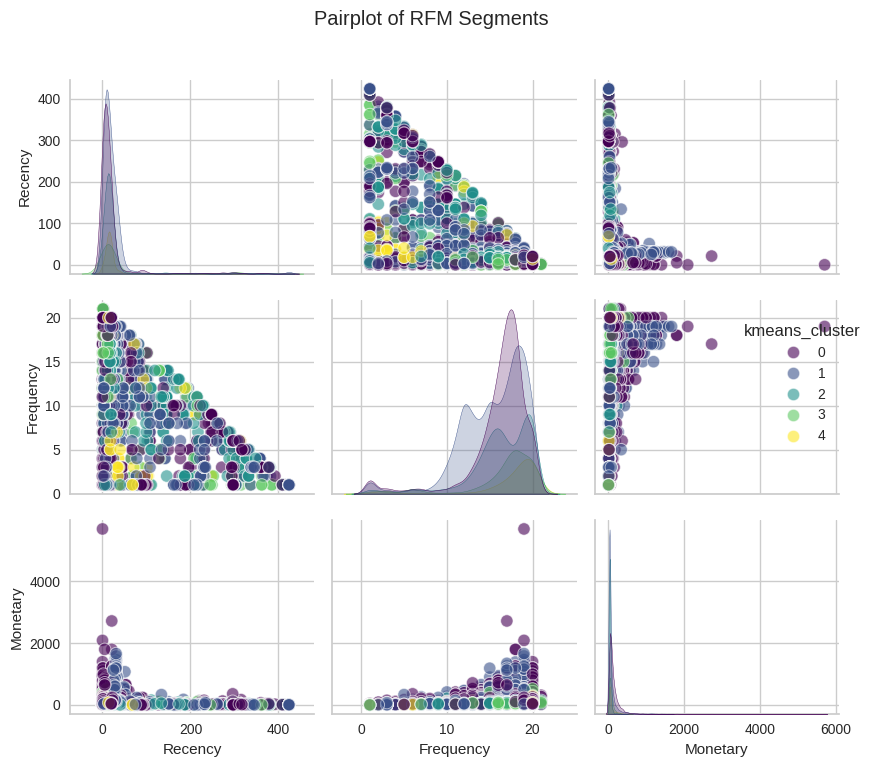

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Periksa distribusi cluster
print(rfm8['kmeans_cluster'].value_counts())

# Plot pairplot
plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(rfm8,
                        vars=['Recency', 'Frequency', 'Monetary'],
                        hue='kmeans_cluster',
                        palette='viridis',
                        markers='o',
                        plot_kws={'alpha':0.6, 's':80})
pairplot.fig.suptitle('Pairplot of RFM Segments', y=1.02)
plt.tight_layout()
plt.show()

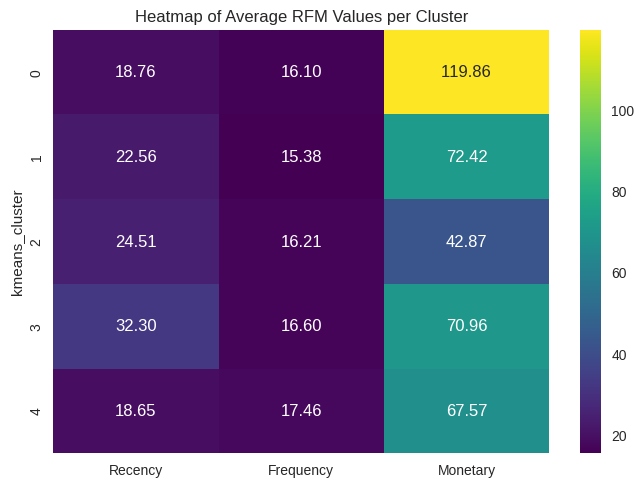

In [ ]:
# Membuat pivot table untuk rata-rata nilai RFM per cluster
rfm_cluster_means3 = rfm8.groupby('kmeans_cluster')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()
# Membuat heatmap dari rata-rata nilai RFM per cluster
heatmap = sns.heatmap(rfm_cluster_means3.set_index('kmeans_cluster'), annot=True, cmap='viridis', fmt='.2f')
heatmap.set_title('Heatmap of Average RFM Values per Cluster')

# Menampilkan heatmap
plt.show()

####**UKMart**

In [ ]:
sampled_rfm4=UKMart[(UKMart['tahun'] >= 2023)]

# Pastikan kolom 'tanggal_transaksi' bertipe datetime
sampled_rfm4['tanggal_transaksi'] = pd.to_datetime(sampled_rfm4['tanggal'])

# Mengatur tanggal referensi (misalnya, tanggal paling akhir di dataset)
reference_date = sampled_rfm4['tanggal'].max()

# Hitung Recency: jumlah hari sejak transaksi terakhir hingga tanggal referensi
recency_data = sampled_rfm4.groupby('nama').agg({'tanggal': lambda x: (reference_date - x.max()).days}).reset_index()
recency_data.columns = ['nama', 'Recency']

# Hitung Monetary: total pemasukan (Total_Pemasukan)
monetary_data = sampled_rfm4.groupby('nama')['harga_pound'].sum().reset_index()
monetary_data.columns = ['nama', 'Monetary']

# Gabungkan data Monetary dan Recency
rfm9 = monetary_data.merge(recency_data[['nama', 'Recency']], on='nama')

# Hitung Frequency: jumlah transaksi (Frequency)
rfm9['Frequency'] = sampled_rfm4.groupby('nama').size().reset_index(name='Frequency')['Frequency']

# Hapus duplikat kategori, jika ada, dan pertahankan baris pertama yang ditemukan
rfm9 = rfm9.drop_duplicates(subset=['nama'])

# Tambahkan kolom cluster ke dalam RFM data
rfm9 = rfm9.merge(sampled_df4[['nama', 'kmeans_cluster','kategori']], on='nama', how='left')

# Hapus duplikat kategori, jika ada, dan pertahankan baris pertama yang ditemukan
rfm9 = rfm9.drop_duplicates(subset=['nama'])

# Menampilkan DataFrame rfm dengan clustering
print("\nDataFrame rfm dengan clustering:")
rfm9[['nama','kategori', 'Recency', 'Frequency', 'Monetary', 'kmeans_cluster']]


<ipython-input-253-b278b82f6af4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_rfm4['tanggal_transaksi'] = pd.to_datetime(sampled_rfm4['tanggal'])



DataFrame rfm dengan clustering:


nama       kategori  \
0                                10 Pack African Marigold     fresh_food   
2                                   10 Pack Lobelia Mixed     fresh_food   
4                                          10 Pack Salvia     fresh_food   
6                         10 in. Round Marbled Cake Board  food_cupboard   
24               1000 Stories Bourbon Aged Zinfandel 75cl         drinks   
...                                                   ...            ...   
510146  tails.com Inner Vitality Cold Pressed Rewards ...           pets   
510164  tails.com Inner Vitality Superfood Bites Lamb ...           pets   
510182  tails.com Inner Vitality Superfood Bites Salmo...           pets   
510200  tails.com Inner Vitality with Freshly Prepared...           pets   
510218                                   zPhone Order Fee           home   

        Recency  Frequency  Monetary  kmeans_cluster  
0           195          2       6.0               2  
2           191          2       6.0               2  
4           195          2       6.0               2  
6            19         18      29.7               4  
24            4         18     288.0               1  
...         ...        ...       ...             ...  
510146       17         18      54.0               3  
510164        0         18      54.0               3  
510182        3         18      54.0               3  
510200       14         18     234.0               3  
510218       19         18      53.1               0  

[29605 rows x 6 columns]

In [ ]:
# Membagi nilai RFM menjadi kuartil
rfm9['R'] = pd.qcut(rfm9['Recency'], q=4, labels=False, duplicates='drop') + 1
rfm9['F'] = pd.qcut(rfm9['Frequency'], q=4, labels=False, duplicates='drop') + 1
rfm9['M'] = pd.qcut(rfm9['Monetary'], q=4, labels=False, duplicates='drop') + 1

rfm9['R'] = rfm9['R'].replace({4: 1, 3: 2, 2: 3, 1: 4})

rfm9.head()

nama  Monetary  Recency  Frequency  \
0                   10 Pack African Marigold       6.0      195          2   
2                      10 Pack Lobelia Mixed       6.0      191          2   
4                             10 Pack Salvia       6.0      195          2   
6            10 in. Round Marbled Cake Board      29.7       19         18   
24  1000 Stories Bourbon Aged Zinfandel 75cl     288.0        4         18   

    kmeans_cluster       kategori  R  F  M  
0                2     fresh_food  1  1  1  
2                2     fresh_food  1  1  1  
4                2     fresh_food  1  1  1  
6                4  food_cupboard  1  1  1  
24               1         drinks  4  1  4

In [ ]:
# Convert 'F' and 'M' columns to numeric
rfm9['R'] = pd.to_numeric(rfm9['R'])
rfm9['F'] = pd.to_numeric(rfm9['F'])
rfm9['M'] = pd.to_numeric(rfm9['M'])

# Calculate RFM score
rfm9['RFM'] = rfm9[['R', 'F', 'M']].sum(axis=1)

In [ ]:
# Create RFM Function to Score
def rfm_segment(rfm9):
    if rfm9['RFM'] >= 12:
        return 'Best Product'
    elif (rfm9['RFM'] >= 9) and (rfm9['RFM'] < 12):
        return "Good Product"
    elif (rfm9['RFM'] >= 6) and (rfm9['RFM'] < 9):
        return "High Potential Product"
    else:
        return "Decent Product"

rfm9["Segment Product"] = rfm9.apply(rfm_segment, axis=1)
rfm9.head()

nama  Monetary  Recency  Frequency  \
0                   10 Pack African Marigold       6.0      195          2   
2                      10 Pack Lobelia Mixed       6.0      191          2   
4                             10 Pack Salvia       6.0      195          2   
6            10 in. Round Marbled Cake Board      29.7       19         18   
24  1000 Stories Bourbon Aged Zinfandel 75cl     288.0        4         18   

    kmeans_cluster       kategori  R  F  M  RFM Segment Product  
0                2     fresh_food  1  1  1    3  Decent Product  
2                2     fresh_food  1  1  1    3  Decent Product  
4                2     fresh_food  1  1  1    3  Decent Product  
6                4  food_cupboard  1  1  1    3  Decent Product  
24               1         drinks  4  1  4    9    Good Product

In [ ]:
# Menghitung skor RFM dengan memberi peringkat pada setiap metrik
rfm9['R_rank'] = rfm9['Recency'].rank(ascending=False)
rfm9['F_rank'] = rfm9['Frequency'].rank(ascending=True)
rfm9['M_rank'] = rfm9['Monetary'].rank(ascending=True)

# Menghitung skor total RFM
rfm9['RFM_Score'] = rfm9['R_rank'] + rfm9['F_rank'] + rfm9['M_rank']

print(rfm9)

                                                     nama  Monetary  Recency  \
0                                10 Pack African Marigold       6.0      195   
2                                   10 Pack Lobelia Mixed       6.0      191   
4                                          10 Pack Salvia       6.0      195   
6                         10 in. Round Marbled Cake Board      29.7       19   
24               1000 Stories Bourbon Aged Zinfandel 75cl     288.0        4   
...                                                   ...       ...      ...   
510146  tails.com Inner Vitality Cold Pressed Rewards ...      54.0       17   
510164  tails.com Inner Vitality Superfood Bites Lamb ...      54.0        0   
510182  tails.com Inner Vitality Superfood Bites Salmo...      54.0        3   
510200  tails.com Inner Vitality with Freshly Prepared...     234.0       14   
510218                                   zPhone Order Fee      53.1       19   

        Frequency  kmeans_cluster      

In [ ]:
# Menentukan produk dengan skor RFM terbesar
top_rfm = rfm9.sort_values('RFM_Score', ascending=False).head(1)

print("\nProduk dengan nilai RFM terbesar:")
top_rfm.head()


Produk dengan nilai RFM terbesar:


nama  Monetary  Recency  \
375824  Sainsbury's Home Stainless Steel Pasta Pot Wit...     722.0        0   

        Frequency  kmeans_cluster kategori  R  F  M  RFM Segment Product  \
375824         19               0     home  4  2  4   10    Good Product   

         R_rank   F_rank   M_rank  RFM_Score  
375824  29005.0  27928.5  29449.5    86383.0

In [ ]:
# Menentukan produk dengan skor RFM terkecil
lowest_rfm = rfm9.sort_values('RFM_Score').head(1)

print("\nProduk dengan nilai RFM terkecil:")
lowest_rfm.head()


Produk dengan nilai RFM terkecil:


nama  Monetary  Recency  \
218010  Maryland Cookies Vegan Chocolate Chip 200g      0.85      416   

        Frequency  kmeans_cluster kategori  R  F  M  RFM Segment Product  \
218010          1               1   bakery  1  1  1    3  Decent Product   

        R_rank  F_rank  M_rank  RFM_Score  
218010    23.5   125.5     7.0      156.0

In [ ]:
rfm9.groupby('Segment Product').agg({
    'Recency':'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
})

Recency  Frequency    Monetary
Segment Product                                         
Decent Product          41.571085  16.155331   35.609499
Good Product             3.437657  18.203378  220.025196
High Potential Product  10.672557  17.755240  108.414031

kmeans_cluster
0    9997
4    8325
2    4494
1    3982
3    2807
Name: count, dtype: int64


<Figure size 1200x1000 with 0 Axes>

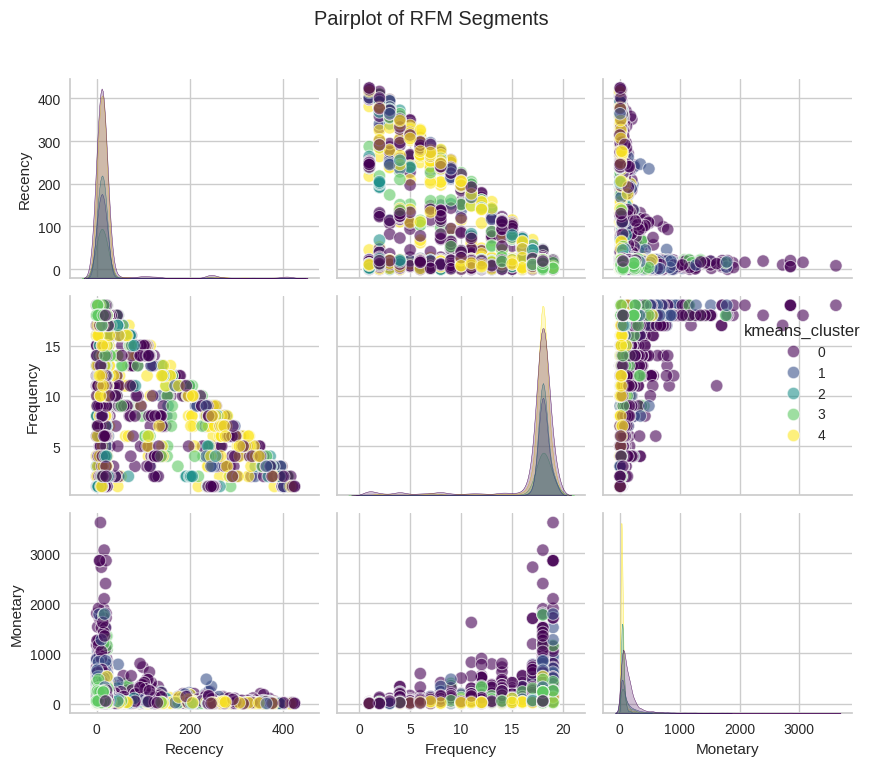

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Periksa distribusi cluster
print(rfm9['kmeans_cluster'].value_counts())

# Plot pairplot
plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(rfm9,
                        vars=['Recency', 'Frequency', 'Monetary'],
                        hue='kmeans_cluster',
                        palette='viridis',
                        markers='o',
                        plot_kws={'alpha':0.6, 's':80})
pairplot.fig.suptitle('Pairplot of RFM Segments', y=1.02)
plt.tight_layout()
plt.show()

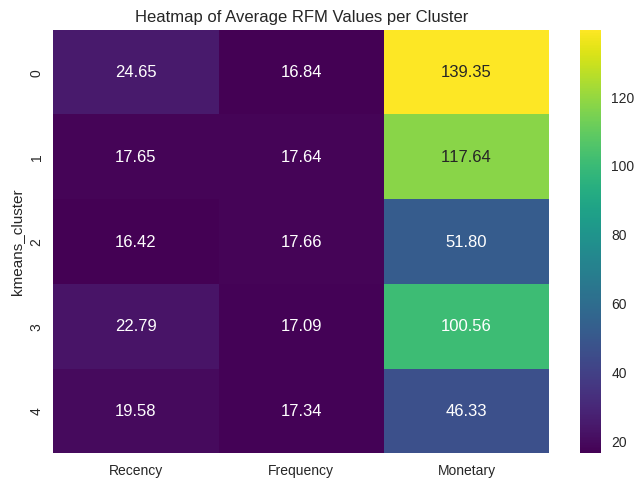

In [ ]:
# Membuat pivot table untuk rata-rata nilai RFM per cluster
rfm_cluster_means4 = rfm9.groupby('kmeans_cluster')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()
# Membuat heatmap dari rata-rata nilai RFM per cluster
heatmap = sns.heatmap(rfm_cluster_means4.set_index('kmeans_cluster'), annot=True, cmap='viridis', fmt='.2f')
heatmap.set_title('Heatmap of Average RFM Values per Cluster')

# Menampilkan heatmap
plt.show()

####**ScottishMart**

In [ ]:
sampled_rfm5=ScottishMart[(ScottishMart['tahun'] >= 2023)]

# Pastikan kolom 'tanggal_transaksi' bertipe datetime
sampled_rfm5['tanggal_transaksi'] = pd.to_datetime(sampled_rfm5['tanggal'])

# Mengatur tanggal referensi (misalnya, tanggal paling akhir di dataset)
reference_date = sampled_rfm5['tanggal'].max()

# Hitung Recency: jumlah hari sejak transaksi terakhir hingga tanggal referensi
recency_data = sampled_rfm5.groupby('nama').agg({'tanggal': lambda x: (reference_date - x.max()).days}).reset_index()
recency_data.columns = ['nama', 'Recency']

# Hitung Monetary: total pemasukan (Total_Pemasukan)
monetary_data = sampled_rfm5.groupby('nama')['harga_pound'].sum().reset_index()
monetary_data.columns = ['nama', 'Monetary']

# Gabungkan data Monetary dan Recency
rfm0 = monetary_data.merge(recency_data[['nama', 'Recency']], on='nama')

# Hitung Frequency: jumlah transaksi (Frequency)
rfm0['Frequency'] = sampled_rfm5.groupby('nama').size().reset_index(name='Frequency')['Frequency']

# Tambahkan kolom cluster ke dalam RFM data
rfm0 = rfm0.merge(sampled_df5[['nama', 'kmeans_cluster','kategori']], on='nama', how='left')

# Hapus duplikat kategori, jika ada, dan pertahankan baris pertama yang ditemukan
rfm0 = rfm0.drop_duplicates(subset=['nama'])

# Menampilkan DataFrame RFM dengan clustering
print("\nDataFrame RFM dengan clustering:")
rfm0[['nama','kategori', 'Recency', 'Frequency', 'Monetary', 'kmeans_cluster']]

<ipython-input-263-da2f9e92a8da>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_rfm5['tanggal_transaksi'] = pd.to_datetime(sampled_rfm5['tanggal'])



DataFrame RFM dengan clustering:


nama   kategori  Recency  \
0        1 Marigold Extra Life Gloves Kitchen Large  household        3   
17      1 Marigold Extra Life Gloves Kitchen Medium  household        2   
35                  10 Motives Refills Menthol 16Mg       home       71   
48                  10 Motives Refills Regular 16Mg       home       33   
63                 10 Motives V2 Chargeable Regular       home        1   
...                                             ...        ...      ...   
426072                      £100 LOADED Scratchcard       home        4   
426090                    £100,000 Red Scratchcards       home        5   
426102                 £2 MILLION BLACK Scratchcard       home        9   
426119                    £250,000 GOLD Scratchcard       home        3   
426136        £50 MILLION CASH SHOWDOWN Scratchcard       home       10   

        Frequency  Monetary  kmeans_cluster  
0              17     34.00               0  
17             18     36.00               0  
35             13    116.87               0  
48             15    134.85               0  
63             16    159.84               0  
...           ...       ...             ...  
426072         18     36.00               0  
426090         12     12.00               0  
426102         17     85.00               0  
426119         17     34.00               0  
426136         17     85.00               0  

[26379 rows x 6 columns]

In [ ]:
# Membagi nilai RFM menjadi kuartil
rfm0['R'] = pd.qcut(x = rfm0['Recency'], q=4, labels=range(4,0,-1))
rfm0['F'] = pd.qcut(x = rfm0['Frequency'], q=4, labels=range(1,5,1))
rfm0['M'] = pd.qcut(x = rfm0['Monetary'], q=4, labels=range(1,5,1))
rfm0.head()

nama  Monetary  Recency  Frequency  \
0    1 Marigold Extra Life Gloves Kitchen Large     34.00        3         17   
17  1 Marigold Extra Life Gloves Kitchen Medium     36.00        2         18   
35              10 Motives Refills Menthol 16Mg    116.87       71         13   
48              10 Motives Refills Regular 16Mg    134.85       33         15   
63             10 Motives V2 Chargeable Regular    159.84        1         16   

    kmeans_cluster   kategori  R  F  M  
0                0  household  4  2  2  
17               0  household  4  3  2  
35               0       home  1  1  4  
48               0       home  1  1  4  
63               0       home  4  1  4

In [ ]:
# Convert 'F' and 'M' columns to numeric
rfm0['R'] = pd.to_numeric(rfm0['R'])
rfm0['F'] = pd.to_numeric(rfm0['F'])
rfm0['M'] = pd.to_numeric(rfm0['M'])

# Calculate RFM score
rfm0['RFM'] = rfm0[['R','F', 'M']].sum(axis=1)

In [ ]:
# Create RFM Function to Score
def rfm_segment(rfm0):
    if rfm0['RFM'] >= 12:
        return 'Best Product'
    elif (rfm0['RFM'] >= 9) and (rfm0['RFM'] < 12):
        return "Good Product"
    elif (rfm0['RFM'] >= 6) and (rfm0['RFM'] < 9):
        return "High Potential Product"
    else:
        return "Decent Product"

rfm0["Segment Product"] = rfm0.apply(rfm_segment, axis=1)
rfm0.head()

nama  Monetary  Recency  Frequency  \
0    1 Marigold Extra Life Gloves Kitchen Large     34.00        3         17   
17  1 Marigold Extra Life Gloves Kitchen Medium     36.00        2         18   
35              10 Motives Refills Menthol 16Mg    116.87       71         13   
48              10 Motives Refills Regular 16Mg    134.85       33         15   
63             10 Motives V2 Chargeable Regular    159.84        1         16   

    kmeans_cluster   kategori  R  F  M  RFM         Segment Product  
0                0  household  4  2  2    8  High Potential Product  
17               0  household  4  3  2    9            Good Product  
35               0       home  1  1  4    6  High Potential Product  
48               0       home  1  1  4    6  High Potential Product  
63               0       home  4  1  4    9            Good Product

In [ ]:
# Menghitung skor RFM dengan memberi peringkat pada setiap metrik
rfm0['R_rank'] = rfm0['Recency'].rank(ascending=False)
rfm0['F_rank'] = rfm0['Frequency'].rank(ascending=True)
rfm0['M_rank'] = rfm0['Monetary'].rank(ascending=True)

# Menghitung skor total RFM
rfm0['RFM_Score'] = rfm0['R_rank'] + rfm0['F_rank'] + rfm0['M_rank']

print(rfm0)

                                               nama  Monetary  Recency  \
0        1 Marigold Extra Life Gloves Kitchen Large     34.00        3   
17      1 Marigold Extra Life Gloves Kitchen Medium     36.00        2   
35                  10 Motives Refills Menthol 16Mg    116.87       71   
48                  10 Motives Refills Regular 16Mg    134.85       33   
63                 10 Motives V2 Chargeable Regular    159.84        1   
...                                             ...       ...      ...   
426072                      £100 LOADED Scratchcard     36.00        4   
426090                    £100,000 Red Scratchcards     12.00        5   
426102                 £2 MILLION BLACK Scratchcard     85.00        9   
426119                    £250,000 GOLD Scratchcard     34.00        3   
426136        £50 MILLION CASH SHOWDOWN Scratchcard     85.00       10   

        Frequency  kmeans_cluster   kategori  R  F  M  RFM  \
0              17               0  household  4  

In [ ]:
# Menentukan produk dengan skor RFM terbesar
top_rfm = rfm0.sort_values('RFM_Score', ascending=False).head(1)

print("\nProduk dengan nilai RFM terbesar:")
top_rfm.head()


Produk dengan nilai RFM terbesar:


nama  Monetary  Recency  \
140248  Jameson Triple Distilled Irish Whiskey 1 Litre     617.5        0   

        Frequency  kmeans_cluster kategori  R  F  M  RFM Segment Product  \
140248         19               1   drinks  4  4  4   12    Best Product   

         R_rank   F_rank   M_rank  RFM_Score  
140248  25878.0  25115.5  26192.0    77185.5

In [ ]:
# Menentukan produk dengan skor RFM terkecil
lowest_rfm = rfm0.sort_values('RFM_Score').head(1)

print("\nProduk dengan nilai RFM terkecil:")
lowest_rfm.head()



Produk dengan nilai RFM terkecil:


nama  Monetary  Recency  \
411046  Walkers Max Strong Fiery Prawn Cocktail Grab B...       1.0      418   

        Frequency  kmeans_cluster       kategori  R  F  M  RFM  \
411046          1               1  food_cupboard  1  1  1    3   

       Segment Product  R_rank  F_rank  M_rank  RFM_Score  
411046  Decent Product     3.0    81.5     6.0       90.5

In [ ]:
rfm0.groupby('Segment Product').agg({
    'Recency':'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
})

Recency  Frequency    Monetary
Segment Product                                         
Best Product             3.032895  19.000000  229.718947
Decent Product          76.480307  12.349222   29.710287
Good Product             6.450967  17.747018  133.813921
High Potential Product  15.603787  16.620903   74.598597

kmeans_cluster
1    9255
0    6403
4    4569
3    4527
2    1625
Name: count, dtype: int64


<Figure size 1200x1000 with 0 Axes>

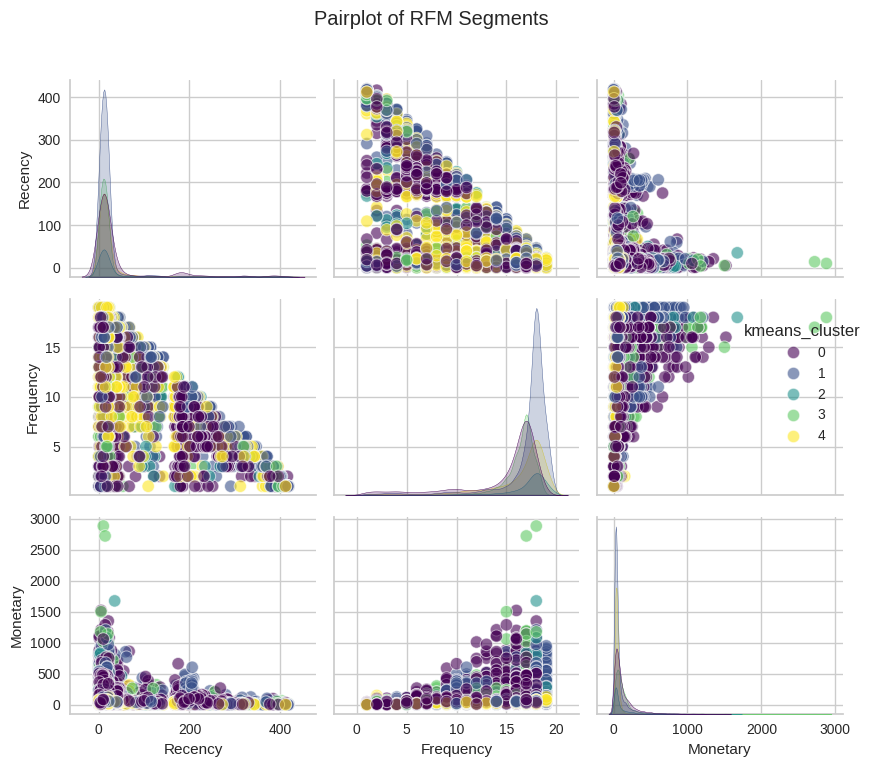

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Periksa distribusi cluster
print(rfm0['kmeans_cluster'].value_counts())

# Plot pairplot
plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(rfm0,
                        vars=['Recency', 'Frequency', 'Monetary'],
                        hue='kmeans_cluster',
                        palette='viridis',
                        markers='o',
                        plot_kws={'alpha':0.6, 's':80})
pairplot.fig.suptitle('Pairplot of RFM Segments', y=1.02)
plt.tight_layout()
plt.show()

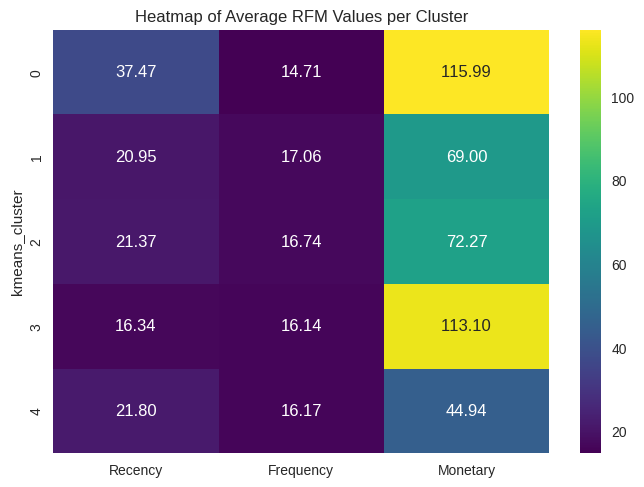

In [ ]:
# Membuat pivot table untuk rata-rata nilai RFM per cluster
rfm_cluster_means5 = rfm0.groupby('kmeans_cluster')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()
# Membuat heatmap dari rata-rata nilai RFM per cluster
heatmap = sns.heatmap(rfm_cluster_means5.set_index('kmeans_cluster'), annot=True, cmap='viridis', fmt='.2f')
heatmap.set_title('Heatmap of Average RFM Values per Cluster')

# Menampilkan heatmap
plt.show()

####**Best Product**

In [ ]:
import pandas as pd

# Define the RFM segment function for products
def rfm_segment(rfm):
    if rfm['RFM'] >= 12:
        return 'Best Product'
    elif (rfm['RFM'] >= 9) and (rfm['RFM'] < 12):
        return "Good Product"
    elif (rfm['RFM'] >= 6) and (rfm['RFM'] < 9):
        return "High Potential Product"
    else:
        return "Decent Product"

# Function to get the best product segment, add store name, and select product with highest Monetary value
def get_best_product_with_store(df, store_name):
    df['Segment Product'] = df.apply(rfm_segment, axis=1)
    best_product_df = df[df['Segment Product'] == 'Best Product']
    best_product_df['Store Name'] = store_name
    best_product_df = best_product_df.sort_values(by='Monetary', ascending=False).head(1)
    return best_product_df

# Assuming rfm6, rfm7, rfm8, rfm9, and rfm0 are already defined

best_product_rfm6 = get_best_product_with_store(rfm6, 'CVanyMart')
best_product_rfm7 = get_best_product_with_store(rfm7, 'CVFamz')
best_product_rfm8 = get_best_product_with_store(rfm8, 'BritishMart')
best_product_rfm9 = get_best_product_with_store(rfm9, 'UKMart')
best_product_rfm0 = get_best_product_with_store(rfm0, 'ScottishMart')

# Combine the best product segments into a single DataFrame
combined_best_product = pd.concat([best_product_rfm6, best_product_rfm7, best_product_rfm8, best_product_rfm9, best_product_rfm0], ignore_index=True)

# Display the combined DataFrame
print("\nCombined Best Product DataFrame:")
combined_best_product


<ipython-input-273-83d7785d7866>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_product_df['Store Name'] = store_name
<ipython-input-273-83d7785d7866>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_product_df['Store Name'] = store_name



Combined Best Product DataFrame:


<ipython-input-273-83d7785d7866>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_product_df['Store Name'] = store_name


nama  Monetary  Recency  \
0  The Infusionist Chilli & Makrut Lime Margarita...   171.394        2   
1             Lego Dollhouse Gabby's Dollhouse 10788  1400.000        0   
2  The Glenlivet French Oak Reserve 15 Year Old S...   950.000        6   

   Frequency  kmeans_cluster kategori  R  F  M  RFM Segment Product   R_rank  \
0         27               3   drinks  4  4  4   12    Best Product   5449.0   
1         20               0     home  4  4  4   12    Best Product  22147.5   
2         19               1   drinks  4  4  4   12    Best Product  19860.0   

    F_rank   M_rank  RFM_Score    Store Name  
0   5939.5   5944.0    17332.5     CVanyMart  
1  21036.0  22561.0    65744.5   BritishMart  
2  25115.5  26345.0    71320.5  ScottishMart

####**Decent Product**

In [ ]:
import pandas as pd

# Define the RFM segment function for products
def rfm_segment(rfm):
    if rfm['RFM'] >= 12:
        return 'Best Product'
    elif (rfm['RFM'] >= 9) and (rfm['RFM'] < 12):
        return "Good Product"
    elif (rfm['RFM'] >= 6) and (rfm['RFM'] < 9):
        return "High Potential Product"
    else:
        return "Decent Product"

# Function to get the best product segment, add store name, and select product with highest Monetary value
def get_best_product_with_store(df, store_name):
    df['Segment Product'] = df.apply(rfm_segment, axis=1)
    best_product_df = df[df['Segment Product'] == 'Decent Product']
    best_product_df['Store Name'] = store_name
    best_product_df = best_product_df.sort_values(by='Monetary', ascending=False).head(1)
    return best_product_df

# Assuming rfm6, rfm7, rfm8, rfm9, and rfm0 are already defined

best_product_rfm6 = get_best_product_with_store(rfm6, 'CVanyMart')
best_product_rfm7 = get_best_product_with_store(rfm7, 'CVFamz')
best_product_rfm8 = get_best_product_with_store(rfm8, 'BritishMart')
best_product_rfm9 = get_best_product_with_store(rfm9, 'UKMart')
best_product_rfm0 = get_best_product_with_store(rfm0, 'ScottishMart')

# Combine the best product segments into a single DataFrame
combined_best_product = pd.concat([best_product_rfm6, best_product_rfm7, best_product_rfm8, best_product_rfm9, best_product_rfm0], ignore_index=True)

# Display the combined DataFrame
print("\nCombined Best Product DataFrame:")
combined_best_product

<ipython-input-274-0f65ce1929be>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_product_df['Store Name'] = store_name
<ipython-input-274-0f65ce1929be>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_product_df['Store Name'] = store_name
<ipython-input-274-0f65ce1929be>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc


Combined Best Product DataFrame:


<ipython-input-274-0f65ce1929be>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_product_df['Store Name'] = store_name


nama  Monetary  Recency  \
0   Ashfields 30 Day Matured Welsh Rump Steak 1 Pack    40.732       50   
1     ASDA Tropical Triple Action Capsules 36 Washes   104.500       21   
2                                          Coke Zero    88.900      140   
3  Garnier Pure Active Anti Blackhead Charcoal Ma...   108.000       19   
4  Royal Dutch Mini Double Filter Cigarillos 10 Pack    93.000       45   

   Frequency  kmeans_cluster         kategori  R  F  M  RFM Segment Product  \
0         12               2       fresh_food  1  1  3    5  Decent Product   
1         14               4        household  1  1  3    5  Decent Product   
2         14               1           drinks  1  1  3    5  Decent Product   
3         18               0  health_products  1  1  3    5  Decent Product   
4         15               0             home  1  1  3    5  Decent Product   

   R_rank   F_rank   M_rank  RFM_Score    Store Name  
0  1243.5   1368.5   4441.0     7053.0     CVanyMart  
1  5348.5   3089.5  25772.5    34210.5        CVFamz  
2   648.0   4867.0  16881.5    22396.5   BritishMart  
3  6189.0  15076.5  22212.5    43478.0        UKMart  
4  1895.0   4806.5  19756.0    26457.5  ScottishMart

#**Pengambilan Data**

##**CVanyMart**

In [ ]:
# Filter data CVanyMart untuk tahun >= 2023
jumlah_df1 = len(sampled_df1)
print(f"Jumlah data dari tahun 2023 hingga 2024: {jumlah_df1}")

# Pilih kolom yang diperlukan dari dataframe CVanyMart
selected_columns = ['nama_toko','nama', 'brand_sendiri', 'kategori', 'tanggal','kmeans_cluster']
data_CVanyMart = sampled_df1[selected_columns]

CVanyMart_unique = CVanyMart.drop_duplicates(subset=['nama'])  # Menghilangkan duplikasi jika ada
data_CVanyMart = data_CVanyMart.merge(CVanyMart_unique[['nama','harga_pound','harga_per_unit']], on='nama', how='left')

# Menampilkan data_CVanyMart untuk memeriksa hasilnya)
data_CVanyMart

Jumlah data dari tahun 2023 hingga 2024: 88400


nama_toko                                               nama  \
0      CVanyMart      The Deli Smoked Reduced Fat Pork Sausage 160g   
1      CVanyMart      Specially Selected Chicken Liver Parfait 170g   
2      CVanyMart  Specially Selected Gruyère & Emmental Cheese F...   
3      CVanyMart  Specially Selected Parmigiano Reggiano & Roast...   
4      CVanyMart         Everyday Essentials Grated Mozzarella 500g   
...          ...                                                ...   
88395  CVanyMart  Harvest Morn Salted Caramel Flavour High Prote...   
88396  CVanyMart  Specially Selected Hickory Smoked Mixed Nuts 150g   
88397  CVanyMart                Heinz Cream Of Tomato Soup 4 X 400g   
88398  CVanyMart    Heinz 50% Less Sugar & Salt Tomato Ketchup 625g   
88399  CVanyMart     Dairyfine Giant Chocolate Buttons Blended 120g   

       brand_sendiri       kategori    tanggal  kmeans_cluster  harga_pound  \
0              False     fresh_food 2023-01-01               2        1.690   
1               True     fresh_food 2023-01-02               2        1.610   
2               True     fresh_food 2023-01-03               2        1.830   
3               True     fresh_food 2023-01-04               2        1.770   
4              False     fresh_food 2023-01-05               2        2.070   
...              ...            ...        ...             ...          ...   
88395          False  food_cupboard 2024-02-25               0        1.198   
88396           True  food_cupboard 2024-02-26               0        1.388   
88397          False  food_cupboard 2024-02-27               0        1.642   
88398          False  food_cupboard 2024-02-28               0        1.890   
88399          False  food_cupboard 2024-02-29               0        0.982   

       harga_per_unit  
0                9.30  
1                9.40  
2               18.60  
3                6.80  
4                5.98  
...               ...  
88395           24.80  
88396           12.60  
88397         2343.80  
88398            5.20  
88399            9.10  

[88400 rows x 8 columns]

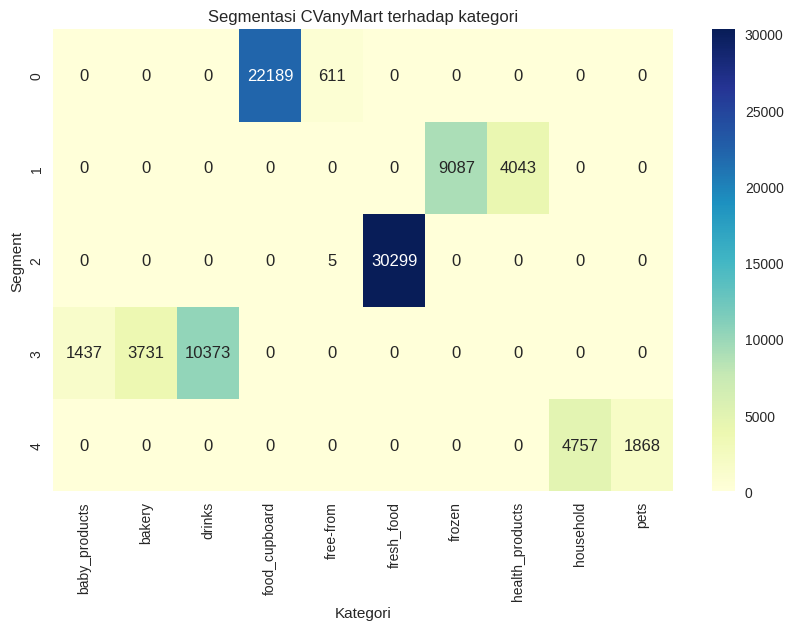

In [ ]:
contingency_tabledf1 = pd.crosstab(data_CVanyMart['kmeans_cluster'], data_CVanyMart['kategori'])

contingency_tabledf1.columns = [str(col) for col in contingency_tabledf1.columns]

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_tabledf1, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Segmentasi CVanyMart terhadap kategori')
plt.xlabel('Kategori')
plt.ylabel('Segment')
plt.show()

In [ ]:
# Gabungkan data_CVanyMart dengan rfm6_unique berdasarkan kolom 'nama' untuk menambahkan kolom 'Monetary', 'Frequency', dan 'Segment Product'
rfm_CVanyMart = data_CVanyMart.merge(rfm6[['nama', 'Monetary', 'Frequency','R_rank','F_rank','M_rank','RFM_Score', 'Segment Product']], on='nama', how='left')

# Opsional: Menampilkan beberapa baris pertama untuk memeriksa hasilnya
rfm_CVanyMart

nama_toko                                               nama  \
0      CVanyMart      The Deli Smoked Reduced Fat Pork Sausage 160g   
1      CVanyMart      Specially Selected Chicken Liver Parfait 170g   
2      CVanyMart  Specially Selected Gruyère & Emmental Cheese F...   
3      CVanyMart  Specially Selected Parmigiano Reggiano & Roast...   
4      CVanyMart         Everyday Essentials Grated Mozzarella 500g   
...          ...                                                ...   
88395  CVanyMart  Harvest Morn Salted Caramel Flavour High Prote...   
88396  CVanyMart  Specially Selected Hickory Smoked Mixed Nuts 150g   
88397  CVanyMart                Heinz Cream Of Tomato Soup 4 X 400g   
88398  CVanyMart    Heinz 50% Less Sugar & Salt Tomato Ketchup 625g   
88399  CVanyMart     Dairyfine Giant Chocolate Buttons Blended 120g   

       brand_sendiri       kategori    tanggal  kmeans_cluster  harga_pound  \
0              False     fresh_food 2023-01-01               2        1.690   
1               True     fresh_food 2023-01-02               2        1.610   
2               True     fresh_food 2023-01-03               2        1.830   
3               True     fresh_food 2023-01-04               2        1.770   
4              False     fresh_food 2023-01-05               2        2.070   
...              ...            ...        ...             ...          ...   
88395          False  food_cupboard 2024-02-25               0        1.198   
88396           True  food_cupboard 2024-02-26               0        1.388   
88397          False  food_cupboard 2024-02-27               0        1.642   
88398          False  food_cupboard 2024-02-28               0        1.890   
88399          False  food_cupboard 2024-02-29               0        0.982   

       harga_per_unit  Monetary  Frequency  R_rank  F_rank  M_rank  RFM_Score  \
0                9.30    29.766         16  2355.0  2907.5  2954.0     8216.5   
1                9.40    30.642         19  5449.0  4528.5  3098.0    13075.5   
2               18.60    29.700         15  2860.0  2376.5  2946.0     8182.5   
3                6.80    37.892         23   747.0  5737.5  4136.0    10620.5   
4                5.98    46.768         25  4914.0  5894.5  4959.0    15767.5   
...               ...       ...        ...     ...     ...     ...        ...   
88395           24.80    19.200         15  5091.0  2376.5  1435.0     8902.5   
88396           12.60    19.344         15  5269.5  2376.5  1455.0     9101.0   
88397         2343.80    35.916         21  5449.0  5332.5  3902.0    14683.5   
88398            5.20    33.404         18  5640.5  4016.5  3545.0    13202.0   
88399            9.10    23.800         18  5842.0  4016.5  2094.0    11952.5   

              Segment Product  
0      High Potential Product  
1                Good Product  
2      High Potential Product  
3      High Potential Product  
4                Best Product  
...                       ...  
88395  High Potential Product  
88396  High Potential Product  
88397            Good Product  
88398            Good Product  
88399            Good Product  

[88400 rows x 15 columns]

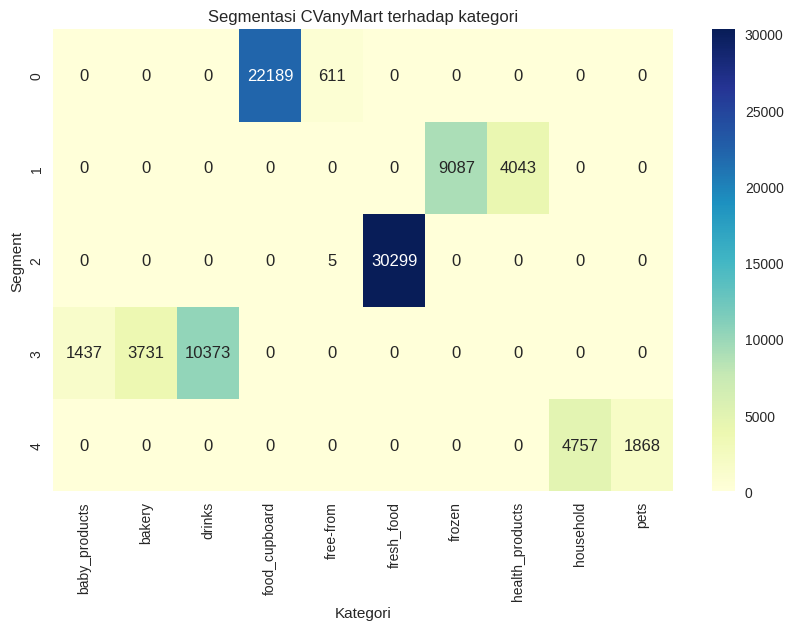

In [ ]:
contingency_tabledf1 = pd.crosstab(rfm_CVanyMart['kmeans_cluster'], rfm_CVanyMart['kategori'])

contingency_tabledf1.columns = [str(col) for col in contingency_tabledf1.columns]

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_tabledf1, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Segmentasi CVanyMart terhadap kategori')
plt.xlabel('Kategori')
plt.ylabel('Segment')
plt.show()

In [ ]:
category_cvanymart = ['fresh_food']

    # 'baby_products',
    # 'bakery',
    # 'drinks',
    # 'food_cupboard',
    # 'free-from',
    # 'frozen',
    # 'health_products',
    # 'household',
    # 'pets'

# Memproses setiap kategori dan menyimpannya ke file CSV terpisah
for category in category_cvanymart:
    # Memfilter dataset berdasarkan kategori
    detail = sampled_df1[sampled_df1['kategori'] == category][['nama', 'tanggal', 'harga_pound', 'kategori']]

    # Menyimpan dataset baru untuk kategori tersebut ke file CSV
    detail.to_csv(f'{category}_cvanymart.csv', index=False)

print("Semua dataset kategori telah dipisahkan dan disimpan sebagai file CSV terpisah.")

Semua dataset kategori telah dipisahkan dan disimpan sebagai file CSV terpisah.


##**CVFamz**

In [ ]:
# Filter data CVFamzMart untuk tahun >= 2023
jumlah_df2 = len(sampled_df2)
print(f"Jumlah data dari tahun 2023 hingga 2024: {jumlah_df2}")

# Pilih kolom yang diperlukan dari dataframe CVFamzMart
selected_columns = ['nama_toko','nama', 'brand_sendiri', 'kategori', 'tanggal','kmeans_cluster']
data_CVFamz = sampled_df2[selected_columns]

CVFamz_unique = CVFamz.drop_duplicates(subset=['nama'])  # Menghilangkan duplikasi jika ada
data_CVFamz = data_CVFamz.merge(CVFamz_unique[['nama','harga_pound','harga_per_unit']], on='nama', how='left')

# Menampilkan data_CVFamzMart untuk memeriksa hasilnya)
data_CVFamz

Jumlah data dari tahun 2023 hingga 2024: 477809


nama_toko                                               nama  \
0         CVFamz                     Lee Kum Kee Panda Oyster Sauce   
1         CVFamz                         Hellmann's Real Mayonnaise   
2         CVFamz  Blue Dragon Reduced Sugar Thai Sweet Chilli Sauce   
3         CVFamz         Las Chicas Original Mexican Hot Sauce 105g   
4         CVFamz                          Knorr Rich Beef Stock Pot   
...          ...                                                ...   
477804    CVFamz  Decathlon White Essential Cycling Water Bottle...   
477805    CVFamz                Polar Gear Silver Star Combo Cooler   
477806    CVFamz                            SodaStream CO2 Cylinder   
477807    CVFamz     Eco Wix Ombre Grey Spa Waters Large Jar Candle   
477808    CVFamz  L'Oreal Elvive Colour Protect 8 Second Wonder ...   

       brand_sendiri       kategori    tanggal  kmeans_cluster  harga_pound  \
0              False  food_cupboard 2023-01-01               2         2.40   
1              False  food_cupboard 2023-01-01               2         2.65   
2              False  food_cupboard 2023-01-01               2         2.00   
3              False  food_cupboard 2023-01-01               2         1.10   
4              False  food_cupboard 2023-01-01               2         1.90   
...              ...            ...        ...             ...          ...   
477804         False         drinks 2023-08-19               2         2.99   
477805         False         drinks 2023-08-20               2         8.00   
477806         False         drinks 2023-08-21               2        23.00   
477807         False         drinks 2023-08-23               2         8.00   
477808          True         drinks 2023-08-26               2         7.50   

        harga_per_unit  
0                 4.70  
1                 6.60  
2                 5.70  
3                10.50  
4                17.00  
...                ...  
477804            2.99  
477805            8.00  
477806           23.00  
477807            8.00  
477808           37.50  

[477809 rows x 8 columns]

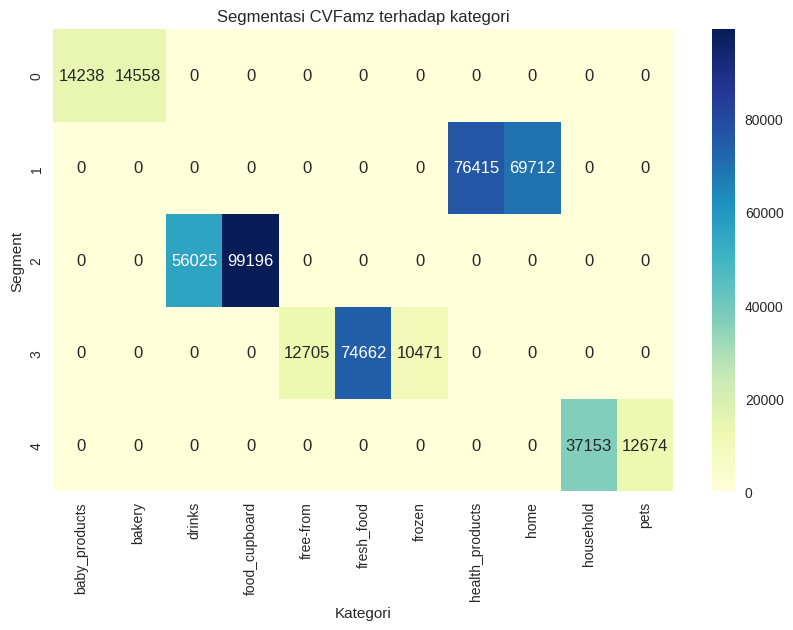

In [ ]:
contingency_tabledf2 = pd.crosstab(data_CVFamz['kmeans_cluster'], data_CVFamz['kategori'])

contingency_tabledf2.columns = [str(col) for col in contingency_tabledf2.columns]

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_tabledf2, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Segmentasi CVFamz terhadap kategori')
plt.xlabel('Kategori')
plt.ylabel('Segment')
plt.show()

In [ ]:
rfm_CVFamz = data_CVFamz.merge(rfm7[['nama', 'Monetary', 'Frequency','R_rank','F_rank','M_rank','RFM_Score', 'Segment Product']], on='nama', how='left')

# Menampilkan data_ScottishMart untuk memeriksa hasilnya
rfm_CVFamz

nama_toko                                               nama  \
0         CVFamz                     Lee Kum Kee Panda Oyster Sauce   
1         CVFamz                         Hellmann's Real Mayonnaise   
2         CVFamz  Blue Dragon Reduced Sugar Thai Sweet Chilli Sauce   
3         CVFamz  Blue Dragon Reduced Sugar Thai Sweet Chilli Sauce   
4         CVFamz         Las Chicas Original Mexican Hot Sauce 105g   
...          ...                                                ...   
578174    CVFamz                Polar Gear Silver Star Combo Cooler   
578175    CVFamz                            SodaStream CO2 Cylinder   
578176    CVFamz     Eco Wix Ombre Grey Spa Waters Large Jar Candle   
578177    CVFamz  L'Oreal Elvive Colour Protect 8 Second Wonder ...   
578178    CVFamz  L'Oreal Elvive Colour Protect 8 Second Wonder ...   

       brand_sendiri       kategori    tanggal  kmeans_cluster  harga_pound  \
0              False  food_cupboard 2023-01-01               2         2.40   
1              False  food_cupboard 2023-01-01               2         2.65   
2              False  food_cupboard 2023-01-01               2         2.00   
3              False  food_cupboard 2023-01-01               2         2.00   
4              False  food_cupboard 2023-01-01               2         1.10   
...              ...            ...        ...             ...          ...   
578174         False         drinks 2023-08-20               2         8.00   
578175         False         drinks 2023-08-21               2        23.00   
578176         False         drinks 2023-08-23               2         8.00   
578177          True         drinks 2023-08-26               2         7.50   
578178          True         drinks 2023-08-26               2         7.50   

        harga_per_unit  Monetary  Frequency   R_rank   F_rank   M_rank  \
0                  4.7     45.60         19  15146.0  29607.0  16117.0   
1                  6.6     45.30         16  16557.0   6858.0  16070.0   
2                  5.7     51.30         19  22077.5  29607.0  17717.5   
3                  5.7     51.30         19  22077.5  29607.0  17717.5   
4                 10.5     28.80         18  13718.5  19762.0   9151.0   
...                ...       ...        ...      ...      ...      ...   
578174             8.0    152.00         19   5348.5  29607.0  28721.5   
578175            23.0    437.00         19   5348.5  29607.0  33310.5   
578176             8.0    106.00         16   2048.0   6858.0  25866.5   
578177            37.5    164.97         18   1681.5  19762.0  29383.5   
578178            37.5    164.97         18   1681.5  19762.0  29383.5   

        RFM_Score         Segment Product  
0         60870.0  High Potential Product  
1         39485.0  High Potential Product  
2         69402.0            Good Product  
3         69402.0            Good Product  
4         42631.5  High Potential Product  
...           ...                     ...  
578174    63677.0  High Potential Product  
578175    68266.0  High Potential Product  
578176    34772.5  High Potential Product  
578177    50827.0  High Potential Product  
578178    50827.0  High Potential Product  

[578179 rows x 15 columns]

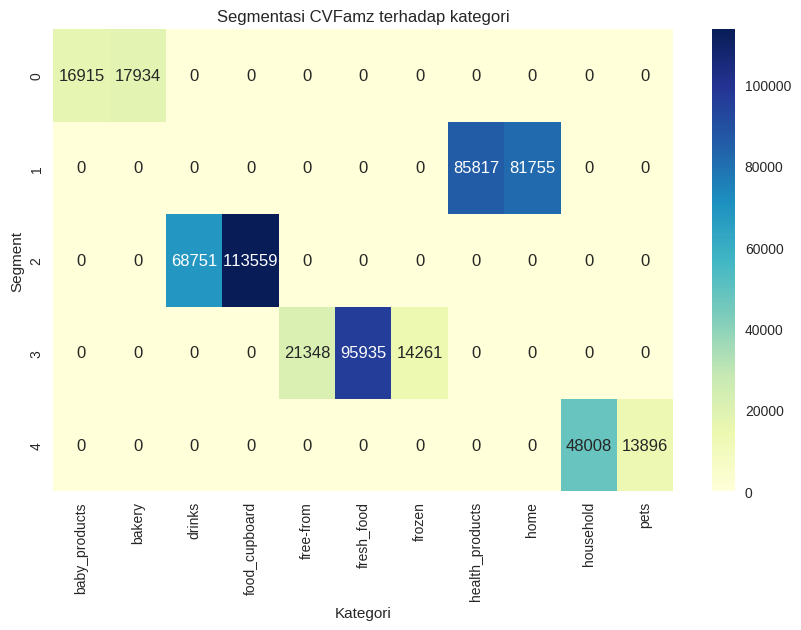

In [ ]:
contingency_tabledf2 = pd.crosstab(rfm_CVFamz['kmeans_cluster'], rfm_CVFamz['kategori'])

contingency_tabledf2.columns = [str(col) for col in contingency_tabledf2.columns]

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_tabledf2, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Segmentasi CVFamz terhadap kategori')
plt.xlabel('Kategori')
plt.ylabel('Segment')
plt.show()

In [ ]:
category_cvfamz= ['health_products']

    # 'baby_products',
    # 'bakery',
    # 'drinks',
    # 'food_cupboard',
    # 'free-from',
    # 'frozen',
    # 'health_products',
    # 'household',
    # 'pets'

# Memproses setiap kategori dan menyimpannya ke file CSV terpisah
for category in category_cvfamz:
    # Memfilter dataset berdasarkan kategori
    detail = sampled_df2[sampled_df2['kategori'] == category][['nama', 'tanggal', 'harga_pound', 'kategori']]

    # Menyimpan dataset baru untuk kategori tersebut ke file CSV
    detail.to_csv(f'{category}_cvfamz.csv', index=False)

print("Semua dataset kategori telah dipisahkan dan disimpan sebagai file CSV terpisah.")

Semua dataset kategori telah dipisahkan dan disimpan sebagai file CSV terpisah.


##**BritishMart**

In [ ]:
# Filter data BritishMart untuk tahun >= 2023
jumlah_df3 = len(sampled_df3)
print(f"Jumlah data dari tahun 2023 hingga 2024: {jumlah_df3}")

# Pilih kolom yang diperlukan dari dataframe BritishMart
selected_columns = ['nama_toko','nama', 'brand_sendiri', 'kategori', 'tanggal','kmeans_cluster']
data_BritishMart = sampled_df3[selected_columns]

BritishMart_unique = BritishMart.drop_duplicates(subset=['nama'])  # Menghilangkan duplikasi jika ada
data_BritishMart = data_BritishMart.merge(BritishMart_unique[['nama','harga_pound','harga_per_unit']], on='nama', how='left')

# Menampilkan data_BritishMart untuk memeriksa hasilnya)
data_BritishMart

Jumlah data dari tahun 2023 hingga 2024: 360400


nama_toko                                         nama  \
0       BritishMart                          Nzo Novo Grape 20mg   
1       BritishMart                          Nzo Novo Mango 20mg   
2       BritishMart                      Nzo Novo Peach Ice 20mg   
3       BritishMart                  Nzo Novo Pink Lemonade 20mg   
4       BritishMart                 Nzo Novo Strawberry Ice 20mg   
...             ...                                          ...   
360395  BritishMart  7th Heaven Charcoal + Black Clay Peel - Off   
360396  BritishMart     Nutmeg Home Bee Double Toothbrush Holder   
360397  BritishMart              Nutmeg Home Bee Hanging Planter   
360398  BritishMart                Bare In Mind Bamboo Facecloth   
360399  BritishMart        Nutmeg Home Bee Happy Seagrass Basket   

        brand_sendiri         kategori    tanggal  kmeans_cluster  \
0               False           drinks 2023-01-01               1   
1               False           drinks 2023-01-01               1   
2               False           drinks 2023-01-01               1   
3               False           drinks 2023-01-01               1   
4               False           drinks 2023-01-01               1   
...               ...              ...        ...             ...   
360395          False  health_products 2024-02-29               0   
360396           True             home 2024-02-29               0   
360397           True             home 2024-02-29               0   
360398          False  health_products 2024-02-29               0   
360399           True             home 2024-02-29               0   

        harga_pound  harga_per_unit  
0              5.49            5.49  
1              5.49            5.49  
2              5.49            5.49  
3              5.49            5.49  
4              5.49            5.49  
...             ...             ...  
360395         2.00            2.00  
360396         8.00            8.00  
360397         6.00            6.00  
360398         3.00            3.00  
360399        18.00           18.00  

[360400 rows x 8 columns]

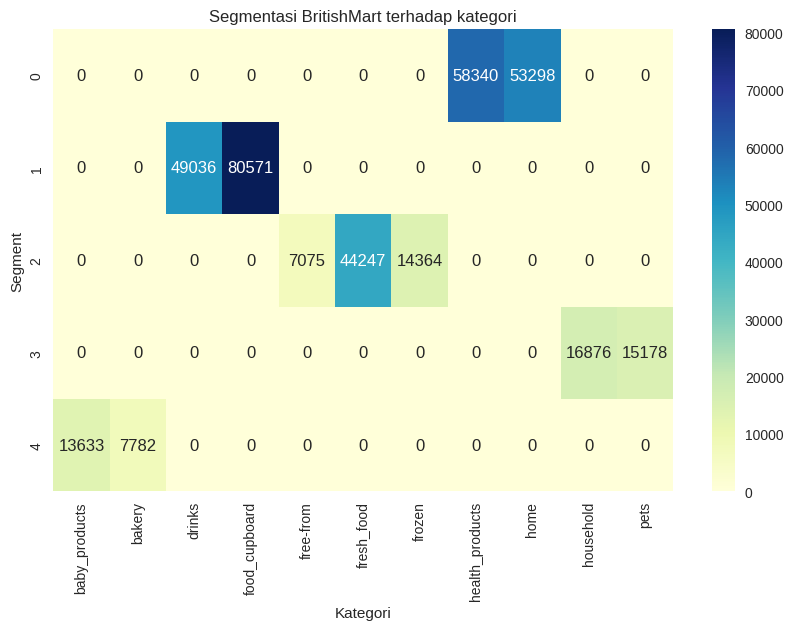

In [ ]:
contingency_tabledf3 = pd.crosstab(data_BritishMart['kmeans_cluster'], data_BritishMart['kategori'])

contingency_tabledf3.columns = [str(col) for col in contingency_tabledf3.columns]

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_tabledf3, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Segmentasi BritishMart terhadap kategori')
plt.xlabel('Kategori')
plt.ylabel('Segment')
plt.show()

In [ ]:
rfm_BritishMart= data_BritishMart.merge(rfm8[['nama', 'Monetary', 'Frequency','R_rank','F_rank','M_rank','RFM_Score', 'Segment Product']], on='nama', how='left')

# Menampilkan data_ScottishMart untuk memeriksa hasilnya
rfm_BritishMart

nama_toko                                         nama  \
0       BritishMart                          Nzo Novo Grape 20mg   
1       BritishMart                          Nzo Novo Mango 20mg   
2       BritishMart                      Nzo Novo Peach Ice 20mg   
3       BritishMart                  Nzo Novo Pink Lemonade 20mg   
4       BritishMart                 Nzo Novo Strawberry Ice 20mg   
...             ...                                          ...   
360395  BritishMart  7th Heaven Charcoal + Black Clay Peel - Off   
360396  BritishMart     Nutmeg Home Bee Double Toothbrush Holder   
360397  BritishMart              Nutmeg Home Bee Hanging Planter   
360398  BritishMart                Bare In Mind Bamboo Facecloth   
360399  BritishMart        Nutmeg Home Bee Happy Seagrass Basket   

        brand_sendiri         kategori    tanggal  kmeans_cluster  \
0               False           drinks 2023-01-01               1   
1               False           drinks 2023-01-01               1   
2               False           drinks 2023-01-01               1   
3               False           drinks 2023-01-01               1   
4               False           drinks 2023-01-01               1   
...               ...              ...        ...             ...   
360395          False  health_products 2024-02-29               0   
360396           True             home 2024-02-29               0   
360397           True             home 2024-02-29               0   
360398          False  health_products 2024-02-29               0   
360399           True             home 2024-02-29               0   

        harga_pound  harga_per_unit  Monetary  Frequency   R_rank   F_rank  \
0              5.49            5.49    104.31         19   4406.0  18142.5   
1              5.49            5.49    104.31         19   4406.0  18142.5   
2              5.49            5.49    104.31         19   4406.0  18142.5   
3              5.49            5.49    104.31         19   4406.0  18142.5   
4              5.49            5.49    104.31         19   4406.0  18142.5   
...             ...             ...       ...        ...      ...      ...   
360395         2.00            2.00     36.00         18  22147.5  14884.5   
360396         8.00            8.00    128.00         16  22147.5   8723.0   
360397         6.00            6.00     90.00         15  22147.5   6507.0   
360398         3.00            3.00     45.00         15  22147.5   6507.0   
360399        18.00           18.00    270.00         15  22147.5   6507.0   

         M_rank  RFM_Score         Segment Product  
0       17866.0    40414.5  High Potential Product  
1       17866.0    40414.5  High Potential Product  
2       17866.0    40414.5  High Potential Product  
3       17866.0    40414.5  High Potential Product  
4       17866.0    40414.5  High Potential Product  
...         ...        ...                     ...  
360395   8956.5    45988.5            Good Product  
360396  18953.5    49824.0            Good Product  
360397  17036.0    45690.5            Good Product  
360398  11445.5    40100.0  High Potential Product  
360399  21407.5    50062.0            Good Product  

[360400 rows x 15 columns]

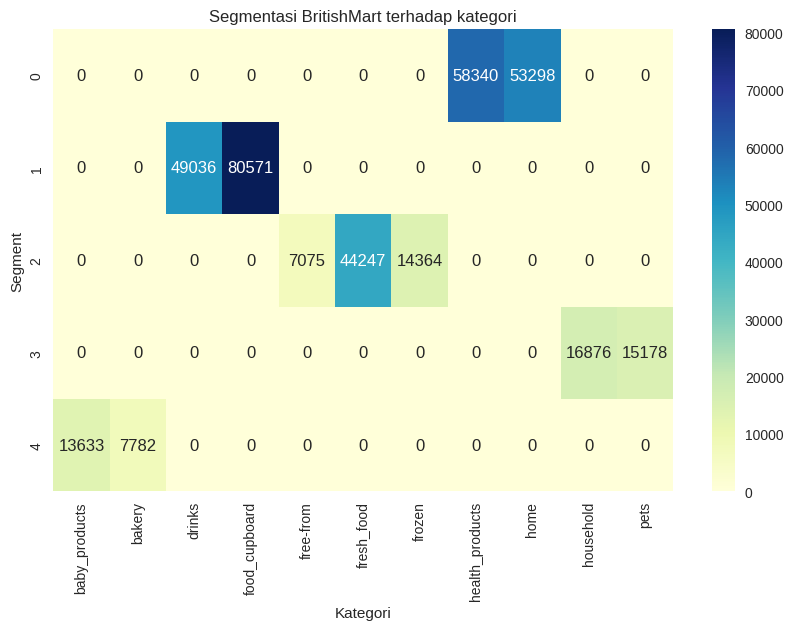

In [ ]:
contingency_tabledf3 = pd.crosstab(data_BritishMart['kmeans_cluster'], data_BritishMart['kategori'])

contingency_tabledf3.columns = [str(col) for col in contingency_tabledf3.columns]

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_tabledf3, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Segmentasi BritishMart terhadap kategori')
plt.xlabel('Kategori')
plt.ylabel('Segment')
plt.show()

In [ ]:
category_britishmart = ['health_products']

    # 'baby_products',
    # 'bakery',
    # 'drinks',
    # 'food_cupboard',
    # 'free-from',
    # 'frozen',
    # 'health_products',
    # 'household',
    # 'pets'

# Memproses setiap kategori dan menyimpannya ke file CSV terpisah
for category in category_britishmart:
    # Memfilter dataset berdasarkan kategori
    detail = sampled_df3[sampled_df3['kategori'] == category][['nama', 'tanggal', 'harga_pound', 'kategori']]

    # Menyimpan dataset baru untuk kategori tersebut ke file CSV
    detail.to_csv(f'{category}_britishmart.csv', index=False)

print("Semua dataset kategori telah dipisahkan dan disimpan sebagai file CSV terpisah.")

Semua dataset kategori telah dipisahkan dan disimpan sebagai file CSV terpisah.


##**UKMart**

In [ ]:
# Filter data UKMart untuk tahun >= 2023
jumlah_df4 = len(sampled_df4)
print(f"Jumlah data dari tahun 2023 hingga 2024: {jumlah_df4}")

# Pilih kolom yang diperlukan dari dataframe UKMart
selected_columns = ['nama_toko','nama', 'brand_sendiri', 'kategori', 'tanggal','kmeans_cluster']
data_UKMart = sampled_df4[selected_columns]

UKMart_unique = UKMart.drop_duplicates(subset=['nama'])  # Menghilangkan duplikasi jika ada
data_UKMart = data_UKMart.merge(UKMart_unique[['nama','harga_pound','harga_per_unit']], on='nama', how='left')

# Menampilkan data_UKMart untuk memeriksa hasilnya)
data_UKMart

Jumlah data dari tahun 2023 hingga 2024: 510236


nama_toko                                               nama  \
0         UKMart           Active Iron Women Capsules & Tablets x60   
1         UKMart             Myprotein Oat Bakes Chocolate Chip 75g   
2         UKMart    Kit Kat Milk Chocolate Easter Egg Hunt Box 120g   
3         UKMart                                Pink Chrysanthemums   
4         UKMart  Sainsbury's Triple Berry Hot Cross Buns Taste ...   
...          ...                                                ...   
510231    UKMart  Sainsbury's Soft Set Scotch Eggs, Taste the Di...   
510232    UKMart                               Whitworths Figs 175g   
510233    UKMart        Dr. Oetker Vege-Gel Gelatine Sachets 3x6.5g   
510234    UKMart  Lindt Choco Wafer Milk Chocolate & Hazelnut Sh...   
510235    UKMart  Dettol Antibacterial Multi Surface Cleaning Sp...   

        brand_sendiri       kategori    tanggal  kmeans_cluster  harga_pound  \
0               False      free-from 2023-01-01               4        20.00   
1               False      free-from 2023-01-01               4         2.00   
2               False      free-from 2023-01-01               4         3.00   
3               False     fresh_food 2023-01-01               2         4.00   
4                True         bakery 2023-01-01               1         1.50   
...               ...            ...        ...             ...          ...   
510231           True     fresh_food 2024-02-29               2         3.50   
510232          False  food_cupboard 2024-02-29               4         2.00   
510233          False  food_cupboard 2024-02-29               4         1.15   
510234          False  food_cupboard 2024-02-29               4         4.00   
510235          False      household 2024-02-29               3         2.00   

        harga_per_unit  
0                 0.33  
1                26.60  
2                25.00  
3                 4.00  
4                 0.38  
...                ...  
510231           13.50  
510232           11.40  
510233           59.00  
510234           29.60  
510235            2.67  

[510236 rows x 8 columns]

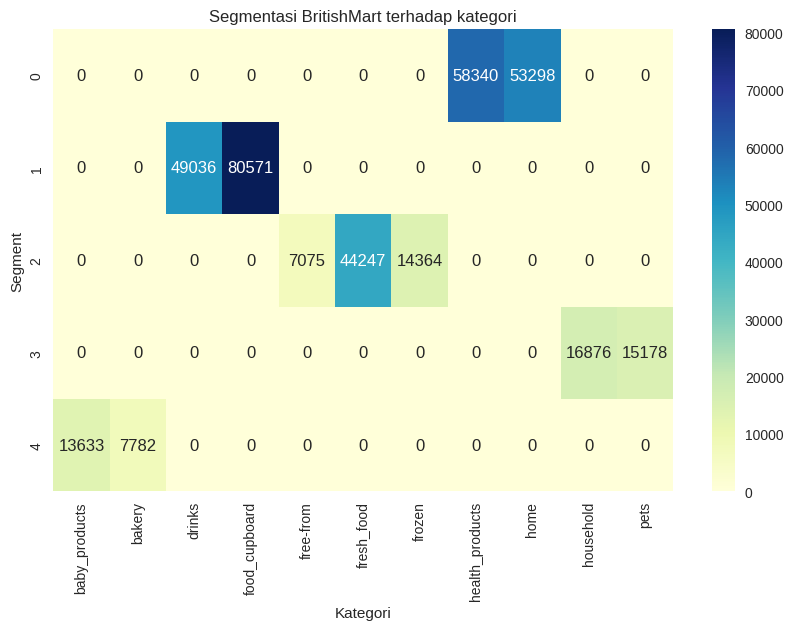

In [ ]:
contingency_tabledf4 = pd.crosstab(data_UKMart['kmeans_cluster'], data_UKMart['kategori'])

contingency_tabledf4.columns = [str(col) for col in contingency_tabledf4.columns]

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_tabledf3, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Segmentasi BritishMart terhadap kategori')
plt.xlabel('Kategori')
plt.ylabel('Segment')
plt.show()

In [ ]:
rfm9_unique=rfm9.drop_duplicates(subset=['nama'])
rfm_UKMart = data_UKMart.merge(rfm9_unique[['nama', 'Monetary', 'Frequency','R_rank','F_rank','M_rank','RFM_Score', 'Segment Product']], on='nama', how='left')

# Menampilkan data_ScottishMart untuk memeriksa hasilnya
rfm_UKMart

nama_toko                                               nama  \
0         UKMart           Active Iron Women Capsules & Tablets x60   
1         UKMart             Myprotein Oat Bakes Chocolate Chip 75g   
2         UKMart    Kit Kat Milk Chocolate Easter Egg Hunt Box 120g   
3         UKMart                                Pink Chrysanthemums   
4         UKMart  Sainsbury's Triple Berry Hot Cross Buns Taste ...   
...          ...                                                ...   
510231    UKMart  Sainsbury's Soft Set Scotch Eggs, Taste the Di...   
510232    UKMart                               Whitworths Figs 175g   
510233    UKMart        Dr. Oetker Vege-Gel Gelatine Sachets 3x6.5g   
510234    UKMart  Lindt Choco Wafer Milk Chocolate & Hazelnut Sh...   
510235    UKMart  Dettol Antibacterial Multi Surface Cleaning Sp...   

        brand_sendiri       kategori    tanggal  kmeans_cluster  harga_pound  \
0               False      free-from 2023-01-01               4        20.00   
1               False      free-from 2023-01-01               4         2.00   
2               False      free-from 2023-01-01               4         3.00   
3               False     fresh_food 2023-01-01               2         4.00   
4                True         bakery 2023-01-01               1         1.50   
...               ...            ...        ...             ...          ...   
510231           True     fresh_food 2024-02-29               2         3.50   
510232          False  food_cupboard 2024-02-29               4         2.00   
510233          False  food_cupboard 2024-02-29               4         1.15   
510234          False  food_cupboard 2024-02-29               4         4.00   
510235          False      household 2024-02-29               3         2.00   

        harga_per_unit  Monetary  Frequency   R_rank   F_rank   M_rank  \
0                 0.33     228.0         19   7390.0  27928.5  27138.5   
1                26.60      41.8         19  27804.0  27928.5  11311.5   
2                25.00      18.0          6    287.5    872.5   2470.5   
3                 4.00      76.0         19  23000.0  27928.5  18982.0   
4                 0.38      28.5         19  26603.0  27928.5   6328.5   
...                ...       ...        ...      ...      ...      ...   
510231           13.50      63.0         18  29005.0  15076.5  16844.0   
510232           11.40      34.8         18  29005.0  15076.5   8697.0   
510233           59.00      20.7         18  29005.0  15076.5   3358.0   
510234           29.60      99.0         18  29005.0  15076.5  21538.0   
510235            2.67      36.0         18  29005.0  15076.5   9298.0   

        RFM_Score         Segment Product  
0         62457.0  High Potential Product  
1         67044.0  High Potential Product  
2          3630.5          Decent Product  
3         69910.5            Good Product  
4         60860.0  High Potential Product  
...           ...                     ...  
510231    60925.5  High Potential Product  
510232    52778.5  High Potential Product  
510233    47439.5  High Potential Product  
510234    65619.5  High Potential Product  
510235    53379.5  High Potential Product  

[510236 rows x 15 columns]

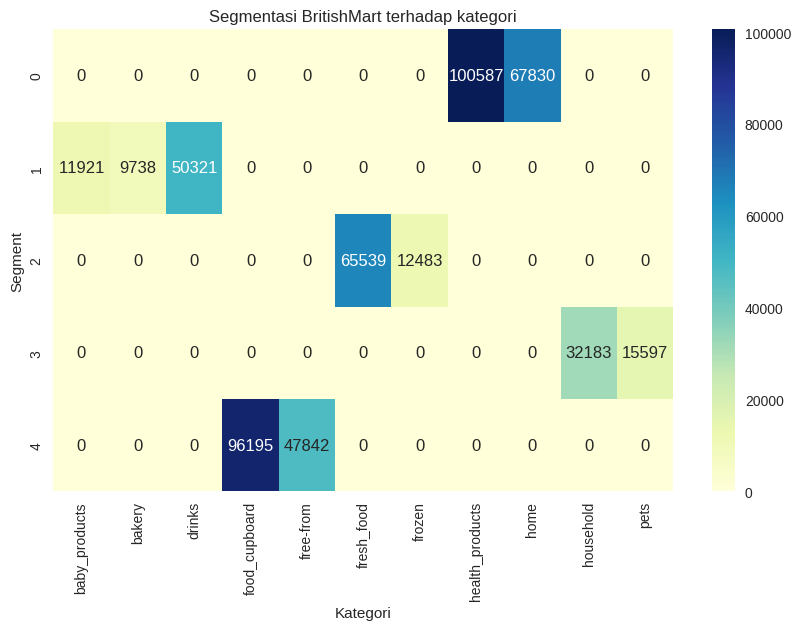

In [ ]:
contingency_tabledf4 = pd.crosstab(data_UKMart['kmeans_cluster'], data_UKMart['kategori'])

contingency_tabledf4.columns = [str(col) for col in contingency_tabledf4.columns]

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_tabledf4, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Segmentasi BritishMart terhadap kategori')
plt.xlabel('Kategori')
plt.ylabel('Segment')
plt.show()

In [ ]:
category_ukmart = ['health_products']

    # 'baby_products',
    # 'bakery',
    # 'drinks',
    # 'food_cupboard',
    # 'free-from',
    # 'frozen',
    # 'health_products',
    # 'household',
    # 'pets'

# Memproses setiap kategori dan menyimpannya ke file CSV terpisah
for category in category_ukmart:
    # Memfilter dataset berdasarkan kategori
    detail = sampled_df4[sampled_df4['kategori'] == category][['nama', 'tanggal', 'harga_pound', 'kategori']]

    # Menyimpan dataset baru untuk kategori tersebut ke file CSV
    detail.to_csv(f'{category}_ukmart.csv', index=False)

print("Semua dataset kategori telah dipisahkan dan disimpan sebagai file CSV terpisah.")

Semua dataset kategori telah dipisahkan dan disimpan sebagai file CSV terpisah.


##**ScottishMart**

In [ ]:
# Filter data ScottishMart untuk tahun >= 2023
jumlah_df5 = len(sampled_df5)
print(f"Jumlah data dari tahun 2023 hingga 2024: {jumlah_df5}")

# Pilih kolom yang diperlukan dari dataframe ScottishMart
selected_columns = ['nama_toko','nama', 'brand_sendiri', 'kategori', 'tanggal','kmeans_cluster']
data_ScottishMart = sampled_df5[selected_columns]

ScottishMart_unique = ScottishMart.drop_duplicates(subset=['nama'])  # Menghilangkan duplikasi jika ada
data_ScottishMart = data_ScottishMart.merge(ScottishMart_unique[['nama','harga_pound','harga_per_unit']], on='nama', how='left')

# Menampilkan data_CVanyMart untuk memeriksa hasilnya)
data_ScottishMart

Jumlah data dari tahun 2023 hingga 2024: 426153


nama_toko                                               nama  \
0       ScottishMart                  Organix Cheese & Herb Puffs 4X15g   
1       ScottishMart  Lil-Lets 10 Extra Long Maternity Maxi Pads Plu...   
2       ScottishMart        Dentinox Cradle Cap Treatment Shampoo 125Ml   
3       ScottishMart              Tesco Essentials Baby Soothers 3 Pack   
4       ScottishMart                           Baby Shark Training Seat   
...              ...                                                ...   
426148  ScottishMart     Better Nature Mediterranean Tempeh Pieces 180g   
426149  ScottishMart               Wairau Cove Gisborne Chardonnay 75Cl   
426150  ScottishMart                        Cofresh Hot Bombay Mix 325G   
426151  ScottishMart              Maison Castel Cotes Du Rhone Red 75Cl   
426152  ScottishMart                        Tesco Black Marl Bath Sheet   

        brand_sendiri       kategori    tanggal  kmeans_cluster  harga_pound  \
0               False  baby_products 2023-01-01               2         2.00   
1               False  baby_products 2023-01-01               2         2.00   
2               False  baby_products 2023-01-01               2         2.35   
3                True  baby_products 2023-01-01               2         1.90   
4               False  baby_products 2023-01-01               2         6.40   
...               ...            ...        ...             ...          ...   
426148          False     fresh_food 2024-02-29               4         2.75   
426149          False         drinks 2024-02-29               1         8.50   
426150          False  food_cupboard 2024-02-29               1         1.10   
426151          False         drinks 2024-02-29               1         8.00   
426152           True           home 2024-02-29               0        12.00   

        harga_per_unit  
0                33.30  
1                 0.20  
2                18.80  
3                 0.63  
4                 6.40  
...                ...  
426148           15.28  
426149           11.30  
426150            3.40  
426151           10.64  
426152           12.00  

[426153 rows x 8 columns]

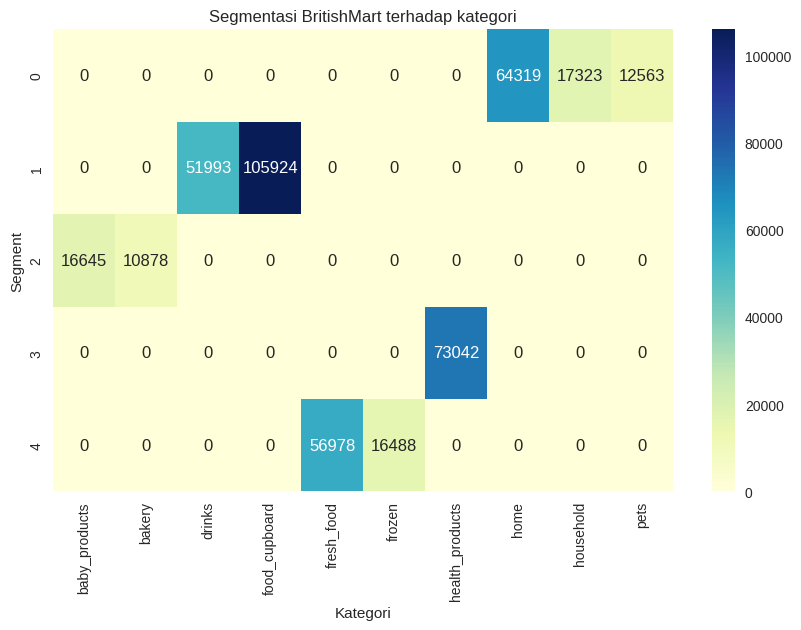

In [ ]:
contingency_tabledf5 = pd.crosstab(data_ScottishMart['kmeans_cluster'], data_ScottishMart['kategori'])

contingency_tabledf5.columns = [str(col) for col in contingency_tabledf5.columns]

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_tabledf5, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Segmentasi BritishMart terhadap kategori')
plt.xlabel('Kategori')
plt.ylabel('Segment')
plt.show()

In [ ]:
rfm0_unique=rfm0.drop_duplicates(subset=['nama'])
rfm_ScottishMart = data_ScottishMart.merge(rfm0_unique[['nama', 'Monetary', 'Frequency','R_rank','F_rank','M_rank','RFM_Score', 'Segment Product']], on='nama', how='left')

# Menampilkan data_ScottishMart untuk memeriksa hasilnya
rfm_ScottishMart

nama_toko                                               nama  \
0       ScottishMart                  Organix Cheese & Herb Puffs 4X15g   
1       ScottishMart  Lil-Lets 10 Extra Long Maternity Maxi Pads Plu...   
2       ScottishMart        Dentinox Cradle Cap Treatment Shampoo 125Ml   
3       ScottishMart              Tesco Essentials Baby Soothers 3 Pack   
4       ScottishMart                           Baby Shark Training Seat   
...              ...                                                ...   
426148  ScottishMart     Better Nature Mediterranean Tempeh Pieces 180g   
426149  ScottishMart               Wairau Cove Gisborne Chardonnay 75Cl   
426150  ScottishMart                        Cofresh Hot Bombay Mix 325G   
426151  ScottishMart              Maison Castel Cotes Du Rhone Red 75Cl   
426152  ScottishMart                        Tesco Black Marl Bath Sheet   

        brand_sendiri       kategori    tanggal  kmeans_cluster  harga_pound  \
0               False  baby_products 2023-01-01               2         2.00   
1               False  baby_products 2023-01-01               2         2.00   
2               False  baby_products 2023-01-01               2         2.35   
3                True  baby_products 2023-01-01               2         1.90   
4               False  baby_products 2023-01-01               2         6.40   
...               ...            ...        ...             ...          ...   
426148          False     fresh_food 2024-02-29               4         2.75   
426149          False         drinks 2024-02-29               1         8.50   
426150          False  food_cupboard 2024-02-29               1         1.10   
426151          False         drinks 2024-02-29               1         8.00   
426152           True           home 2024-02-29               0        12.00   

        harga_per_unit  Monetary  Frequency   R_rank   F_rank   M_rank  \
0                33.30     43.10         19  15848.0  25115.5  11994.0   
1                 0.20     27.00         15  12839.0   4806.5   6310.0   
2                18.80     42.30         18  12839.0  19318.5  11643.0   
3                 0.63     36.10         19  11836.0  25115.5   9910.5   
4                 6.40    152.00         19  10833.0  25115.5  22608.5   
...                ...       ...        ...      ...      ...      ...   
426148           15.28     37.00         17  25878.0  11504.0  10005.5   
426149           11.30    153.00         18  25878.0  19318.5  22696.5   
426150            3.40     17.82         18  25878.0  19318.5   2677.5   
426151           10.64    162.00         18  25878.0  19318.5  23001.0   
426152           12.00    192.00         16  25878.0   6841.5  23835.5   

        RFM_Score         Segment Product  
0         52957.5            Good Product  
1         23955.5          Decent Product  
2         43800.5  High Potential Product  
3         46862.0  High Potential Product  
4         58557.0            Good Product  
...           ...                     ...  
426148    47387.5  High Potential Product  
426149    67893.0            Good Product  
426150    47874.0  High Potential Product  
426151    68197.5            Good Product  
426152    56555.0            Good Product  

[426153 rows x 15 columns]

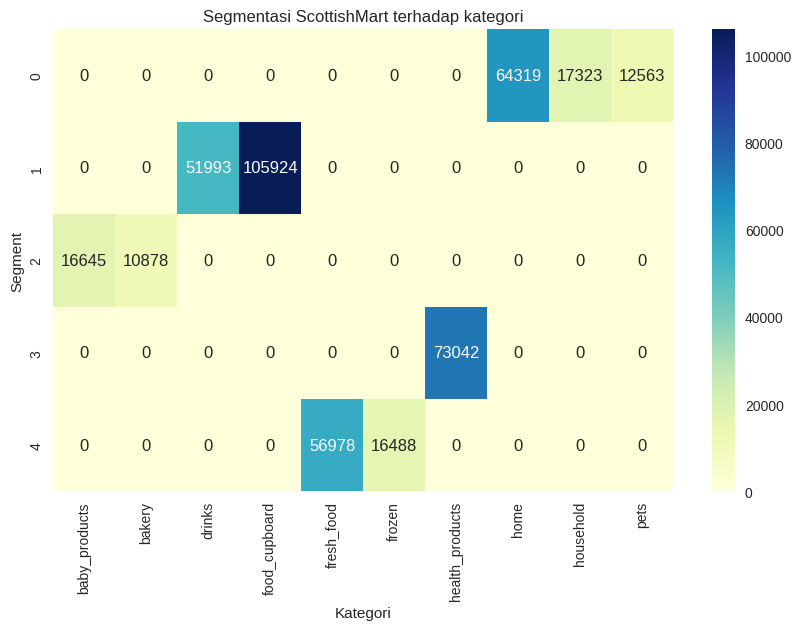

In [ ]:
contingency_tabledf5 = pd.crosstab(data_ScottishMart['kmeans_cluster'], data_ScottishMart['kategori'])

contingency_tabledf5.columns = [str(col) for col in contingency_tabledf5.columns]

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_tabledf5, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Segmentasi ScottishMart terhadap kategori')
plt.xlabel('Kategori')
plt.ylabel('Segment')
plt.show()

In [ ]:
category_scottishmart = ['health_products']

    # 'baby_products',
    # 'bakery',
    # 'drinks',
    # 'food_cupboard',
    # 'free-from',
    # 'frozen',
    # 'health_products',
    # 'household',
    # 'pets'

# Memproses setiap kategori dan menyimpannya ke file CSV terpisah
for category in category_scottishmart:
    # Memfilter dataset berdasarkan kategori
    detail = sampled_df5[sampled_df5['kategori'] == category][['nama', 'tanggal', 'harga_pound', 'kategori']]

    # Menyimpan dataset baru untuk kategori tersebut ke file CSV
    detail.to_csv(f'{category}_scottishmart.csv', index=False)

print("Semua dataset kategori telah dipisahkan dan disimpan sebagai file CSV terpisah.")

Semua dataset kategori telah dipisahkan dan disimpan sebagai file CSV terpisah.


# **Download Data**

In [ ]:
# Menggabungkan dataset
combined_df = pd.concat([rfm_CVanyMart, rfm_CVFamz, rfm_BritishMart, rfm_UKMart, rfm_ScottishMart])

# Menyimpan dataset gabungan ke file CSV
combined_df.to_csv('combined_dataset.csv', index=False)

print("File CSV gabungan berhasil dibuat dan disimpan sebagai 'combined_dataset.csv'")

In [ ]:
from google.colab import files
# Mengunduh file ke perangkat
files.download('combined_dataset.csv')

In [ ]:
feature_engineered_data_sorted.to_csv('feature_engineered_data_sorted.csv', index=False)

# Mengunduh file ke perangkat
files.download('feature_engineered_data_sorted.csv')

print("File CSV berhasil dibuat, disimpan, dan diunduh sebagai 'feature_engineered_data_sorted.csv'")

In [ ]:
#Donwload Data CVanyMart Kategori Terbaik
from google.colab import files
# Mengunduh file ke perangkat
files.download(f'{category}_cvanymart.csv')

In [ ]:
#Donwload Data CVFamz Kategori Terbaik
from google.colab import files
# Mengunduh file ke perangkat
files.download(f'{category}_cvfamz.csv')

In [ ]:
#Donwload Data BritishMart Kategori Terbaik
from google.colab import files
# Mengunduh file ke perangkat
files.download(f'{category}_britishmart.csv')

In [ ]:
#Donwload Data UKMart Kategori Terbaik
from google.colab import files
# Mengunduh file ke perangkat
files.download(f'{category}_ukmart.csv')

In [ ]:
#Donwload Data ScottishMart Kategori Terbaik
from google.colab import files
# Mengunduh file ke perangkat
files.download(f'{category}_scottishmart.csv')